In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import scipy.stats as stat
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Problem Statement:

###   predict the price of Toyota corolla based on the given attributes.
 - Dataset Description:
 - The dataset consists of the following variables:
 - Age: Age in years
 - KM: Accumulated Kilometers on odometer
 - FuelType: Fuel Type (Petrol, Diesel, CNG)
 - HP: Horse Power
 - Automatic: Automatic ( (Yes=1, No=0)
 - CC: Cylinder Volume in cubic centimeters
 - Doors: Number of doors
 - Weight: Weight in Kilograms
 - Quarterly_Tax: 
 - Price: Offer Price in EUROs


In [3]:
raw_data = pd.read_csv("C:/Users/hp/Desktop/assignments/MLR/ToyotaCorolla - MLR.csv")

In [4]:
raw_data

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

In [5]:
print(f"rows {raw_data.shape} columns")

rows (1436, 11) columns


#### Checking data types in each feature

In [6]:
raw_data.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

#### Observation: All The Columns Data Types are Correct but we have one object data type `Fuel_Type` column
 - Note: hence, i have to create categorical data featuer and convert the categorical data into numerical data by using Onehot Encoding


In [7]:
data = raw_data.copy()

In [8]:
data

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

#### as we need change and sort the featuer names

In [9]:
data = data.rename({"Price":"price","Age_08_04":"age","KM":"km","HP":"hp","cc":"cc","Doors":"door","Cylinders":"cylinders","Gears":"gears","Weight":"weight","Fuel_Type":"fuel_type","Automatic":"automatic"},axis=1)
data.columns

Index(['price', 'age', 'km', 'fuel_type', 'hp', 'automatic', 'cc', 'door',
       'cylinders', 'gears', 'weight'],
      dtype='object')

In [10]:
data["automatic"].value_counts(normalize=True)

automatic
0    0.94429
1    0.05571
Name: proportion, dtype: float64

In [11]:
data["fuel_type"].value_counts(normalize=True)

fuel_type
Petrol    0.880223
Diesel    0.107939
CNG       0.011838
Name: proportion, dtype: float64

#### Fuel_Type is a Categorical feature we need to do some encoding or convert it into numerical values by putting dummy values
 - by using `get_dummies()`

In [12]:
data = pd.get_dummies(data,columns =["fuel_type","automatic"]).astype(int)
data

price  age     km   hp    cc  door  cylinders  gears  weight  \
0     13500   23  46986   90  2000     3          4      5    1165   
1     13750   23  72937   90  2000     3          4      5    1165   
2     13950   24  41711   90  2000     3          4      5    1165   
3     14950   26  48000   90  2000     3          4      5    1165   
4     13750   30  38500   90  2000     3          4      5    1170   
...     ...  ...    ...  ...   ...   ...        ...    ...     ...   
1431   7500   69  20544   86  1300     3          4      5    1025   
1432  10845   72  19000   86  1300     3          4      5    1015   
1433   8500   71  17016   86  1300     3          4      5    1015   
1434   7250   70  16916   86  1300     3          4      5    1015   
1435   6950   76      1  110  1600     5          4      5    1114   

      fuel_type_CNG  fuel_type_Diesel  fuel_type_Petrol  automatic_0  \
0                 0                 1                 0            1   
1                 0                 1                 0            1   
2                 0                 1                 0            1   
3                 0                 1                 0            1   
4                 0                 1                 0            1   
...             ...               ...               ...          ...   
1431              0                 0                 1            1   
1432              0                 0                 1            1   
1433              0                 0                 1            1   
1434              0                 0                 1            1   
1435              0                 0                 1            1   

      automatic_1  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
1431            0  
1432            0  
1433            0  
1434            0  
1435            0  

[1436 rows x 14 columns]

In [13]:
data.drop(["automatic_0"], axis=1,inplace=True)

In [14]:
data.drop(["fuel_type_Petrol"],axis=1,inplace=True)

In [15]:
data = data.rename({"automatic_1":"automatic"},axis = 1)
data

price  age     km   hp    cc  door  cylinders  gears  weight  \
0     13500   23  46986   90  2000     3          4      5    1165   
1     13750   23  72937   90  2000     3          4      5    1165   
2     13950   24  41711   90  2000     3          4      5    1165   
3     14950   26  48000   90  2000     3          4      5    1165   
4     13750   30  38500   90  2000     3          4      5    1170   
...     ...  ...    ...  ...   ...   ...        ...    ...     ...   
1431   7500   69  20544   86  1300     3          4      5    1025   
1432  10845   72  19000   86  1300     3          4      5    1015   
1433   8500   71  17016   86  1300     3          4      5    1015   
1434   7250   70  16916   86  1300     3          4      5    1015   
1435   6950   76      1  110  1600     5          4      5    1114   

      fuel_type_CNG  fuel_type_Diesel  automatic  
0                 0                 1          0  
1                 0                 1          0  
2                 0                 1          0  
3                 0                 1          0  
4                 0                 1          0  
...             ...               ...        ...  
1431              0                 0          0  
1432              0                 0          0  
1433              0                 0          0  
1434              0                 0          0  
1435              0                 0          0  

[1436 rows x 12 columns]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             1436 non-null   int32
 1   age               1436 non-null   int32
 2   km                1436 non-null   int32
 3   hp                1436 non-null   int32
 4   cc                1436 non-null   int32
 5   door              1436 non-null   int32
 6   cylinders         1436 non-null   int32
 7   gears             1436 non-null   int32
 8   weight            1436 non-null   int32
 9   fuel_type_CNG     1436 non-null   int32
 10  fuel_type_Diesel  1436 non-null   int32
 11  automatic         1436 non-null   int32
dtypes: int32(12)
memory usage: 67.4 KB


In [17]:
data.describe()

price          age             km           hp           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

              door  cylinders        gears      weight  fuel_type_CNG  \
count  1436.000000     1436.0  1436.000000  1436.00000    1436.000000   
mean      4.033426        4.0     5.026462  1072.45961       0.011838   
std       0.952677        0.0     0.188510    52.64112       0.108196   
min       2.000000        4.0     3.000000  1000.00000       0.000000   
25%       3.000000        4.0     5.000000  1040.00000       0.000000   
50%       4.000000        4.0     5.000000  1070.00000       0.000000   
75%       5.000000        4.0     5.000000  1085.00000       0.000000   
max       5.000000        4.0     6.000000  1615.00000       1.000000   

       fuel_type_Diesel    automatic  
count       1436.000000  1436.000000  
mean           0.107939     0.055710  
std            0.310411     0.229441  
min            0.000000     0.000000  
25%            0.000000     0.000000  
50%            0.000000     0.000000  
75%            0.000000     0.000000  
max            1.000000     1.000000

### Checking for Null Values to use `isnull()` function

In [18]:
data.isnull().sum()

price               0
age                 0
km                  0
hp                  0
cc                  0
door                0
cylinders           0
gears               0
weight              0
fuel_type_CNG       0
fuel_type_Diesel    0
automatic           0
dtype: int64

<Axes: >

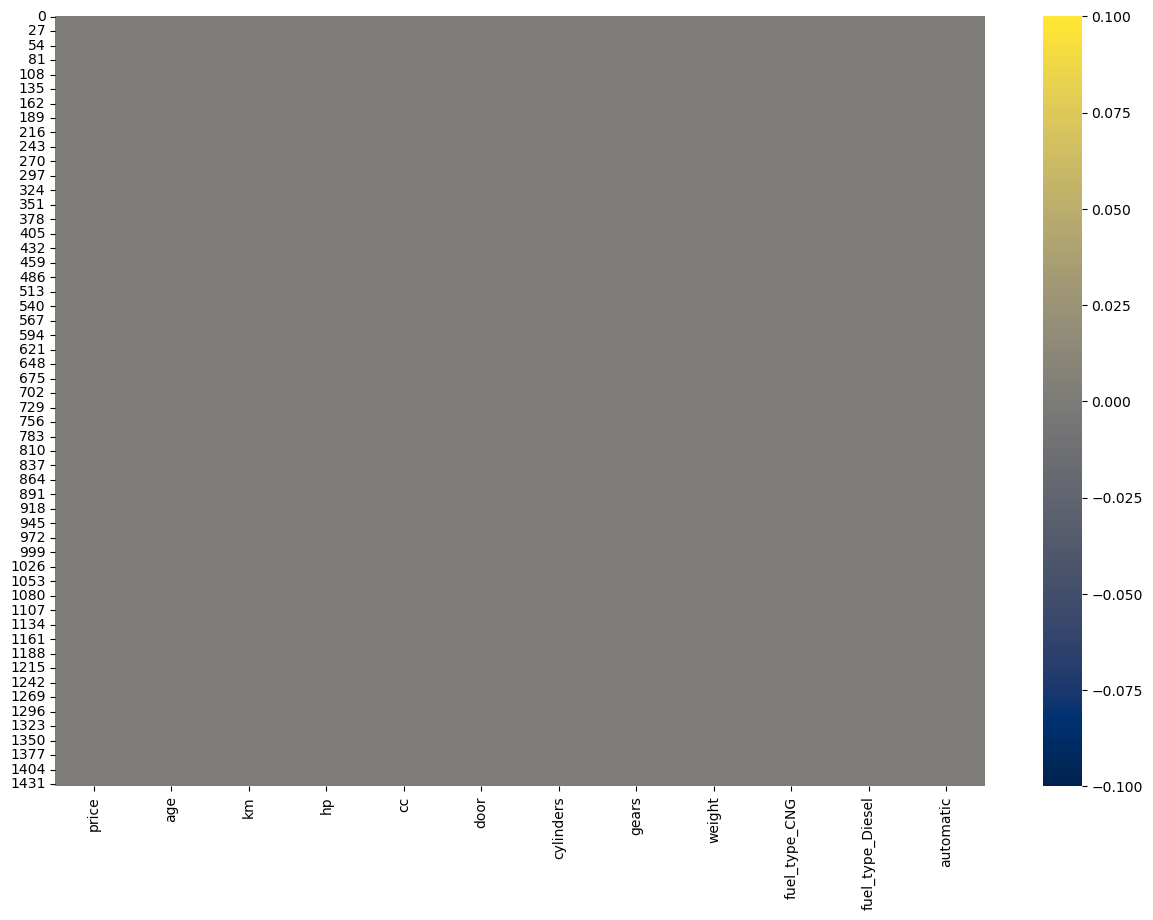

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(), cmap='cividis')# additional checking for null values in visualization

#### Observation: Based on the Visualizing form above there is no Null Values found

#### Checking For Duplicate values in this Data set by using `duplicated()` function

In [20]:
data[data.duplicated(keep=False)]

price  age     km   hp    cc  door  cylinders  gears  weight  \
112  24950    8  13253  116  2000     5          4      5    1320   
113  24950    8  13253  116  2000     5          4      5    1320   

     fuel_type_CNG  fuel_type_Diesel  automatic  
112              0                 1          0  
113              0                 1          0

In [21]:
data[data.duplicated()].shape

(1, 12)

#### Observation : There is a Duplicate value found
   - hence,i have to drop the duplicate value by using `drop_duplicates()`function

In [22]:
data = data.drop_duplicates().reset_index(drop=True)

In [23]:
data[data.duplicated()]

Empty DataFrame
Columns: [price, age, km, hp, cc, door, cylinders, gears, weight, fuel_type_CNG, fuel_type_Diesel, automatic]
Index: []

In [24]:
data

price  age     km   hp    cc  door  cylinders  gears  weight  \
0     13500   23  46986   90  2000     3          4      5    1165   
1     13750   23  72937   90  2000     3          4      5    1165   
2     13950   24  41711   90  2000     3          4      5    1165   
3     14950   26  48000   90  2000     3          4      5    1165   
4     13750   30  38500   90  2000     3          4      5    1170   
...     ...  ...    ...  ...   ...   ...        ...    ...     ...   
1430   7500   69  20544   86  1300     3          4      5    1025   
1431  10845   72  19000   86  1300     3          4      5    1015   
1432   8500   71  17016   86  1300     3          4      5    1015   
1433   7250   70  16916   86  1300     3          4      5    1015   
1434   6950   76      1  110  1600     5          4      5    1114   

      fuel_type_CNG  fuel_type_Diesel  automatic  
0                 0                 1          0  
1                 0                 1          0  
2                 0                 1          0  
3                 0                 1          0  
4                 0                 1          0  
...             ...               ...        ...  
1430              0                 0          0  
1431              0                 0          0  
1432              0                 0          0  
1433              0                 0          0  
1434              0                 0          0  

[1435 rows x 12 columns]

#### Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables


In [25]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 8


In [26]:
discrete_feature

['hp',
 'cc',
 'door',
 'cylinders',
 'gears',
 'fuel_type_CNG',
 'fuel_type_Diesel',
 'automatic']

In [27]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


In [28]:
continuous_feature

['price', 'age', 'km', 'weight']

# Exploratory Data Anlaysis

### Visualize the distribution of each variable

#### Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot

In [29]:
import pylab
def plot_data(data,features):
    for feature in features:
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        data[feature].hist()
        plt.title(feature)
        plt.subplot(1,2,2)
        stat.probplot(data[feature],dist='norm',plot=pylab)

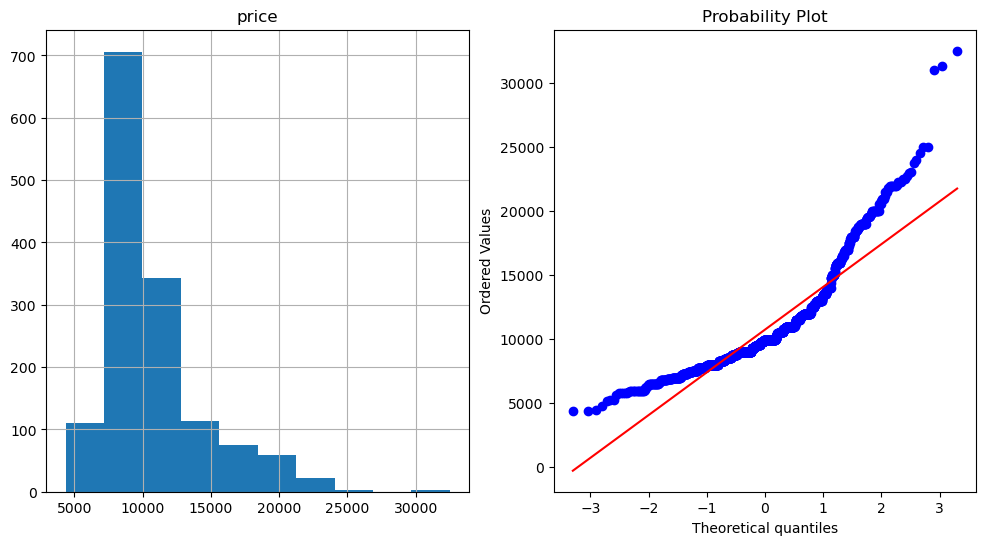

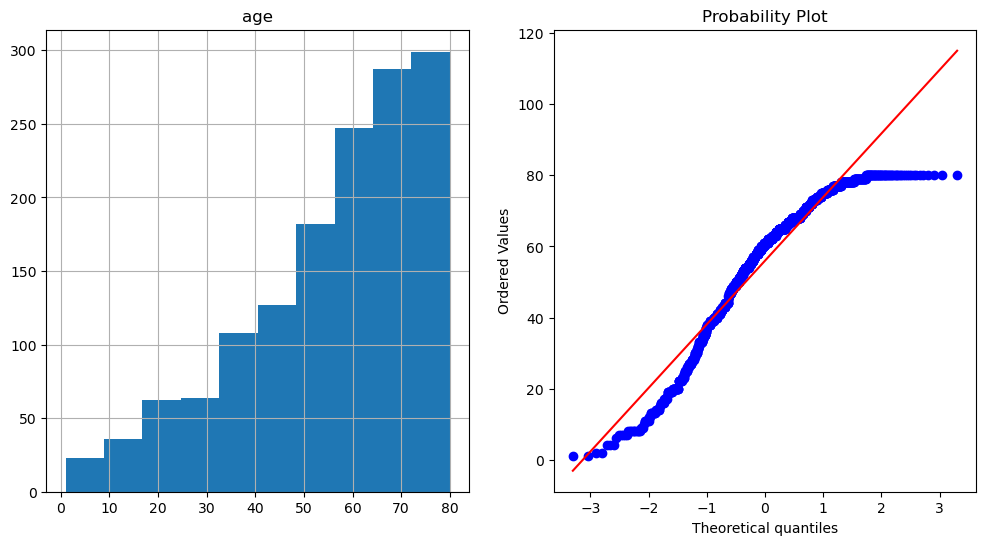

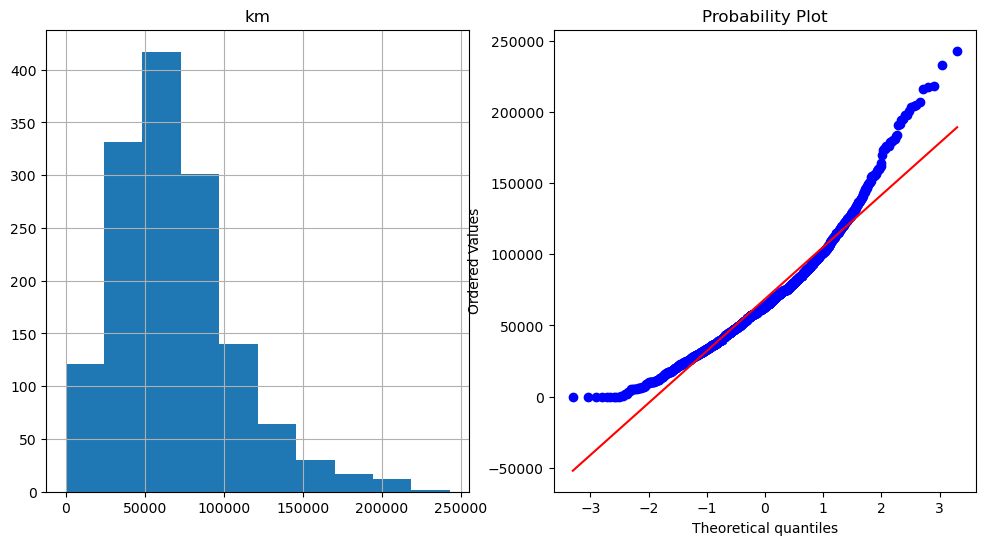

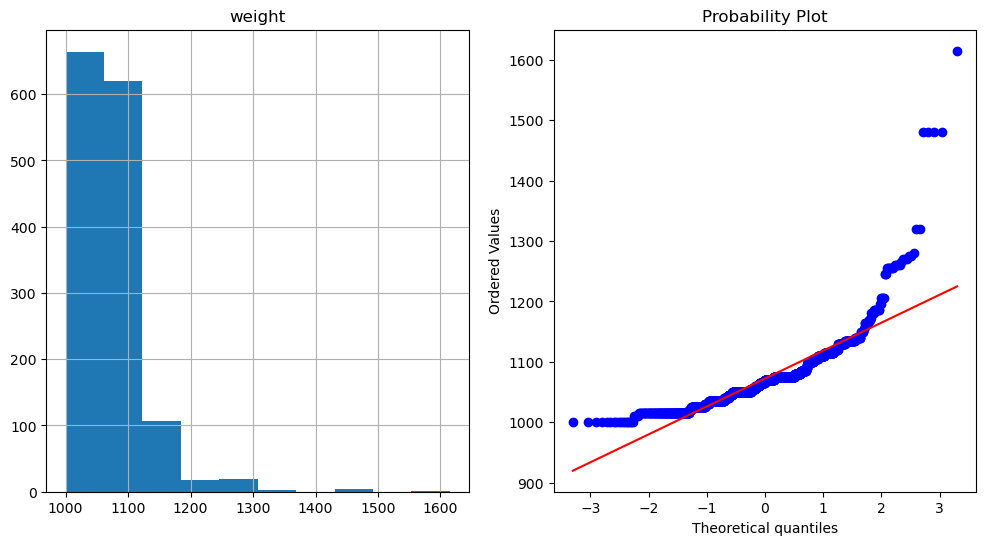

In [30]:
plot_data(data,continuous_feature)

####  Let's Try  With `Log()` Transformation

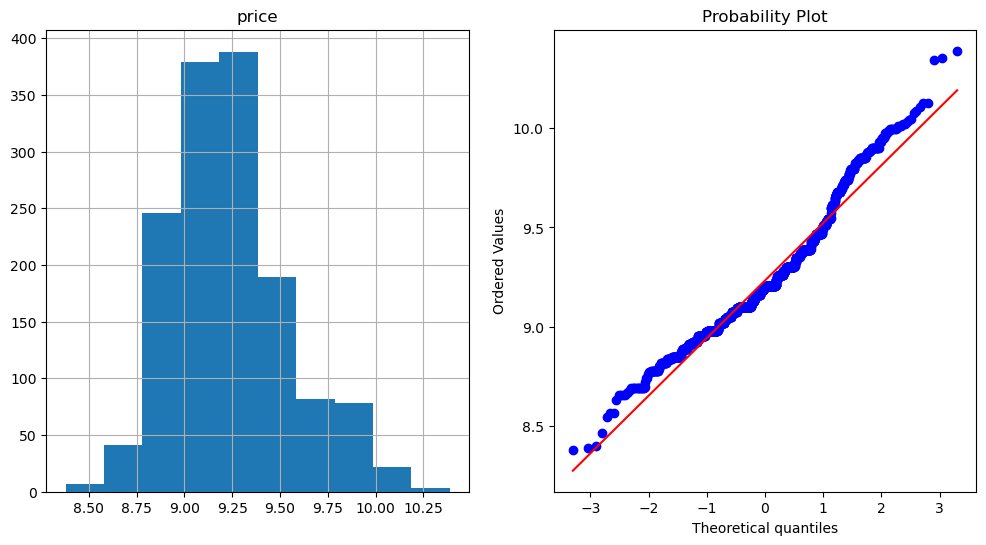

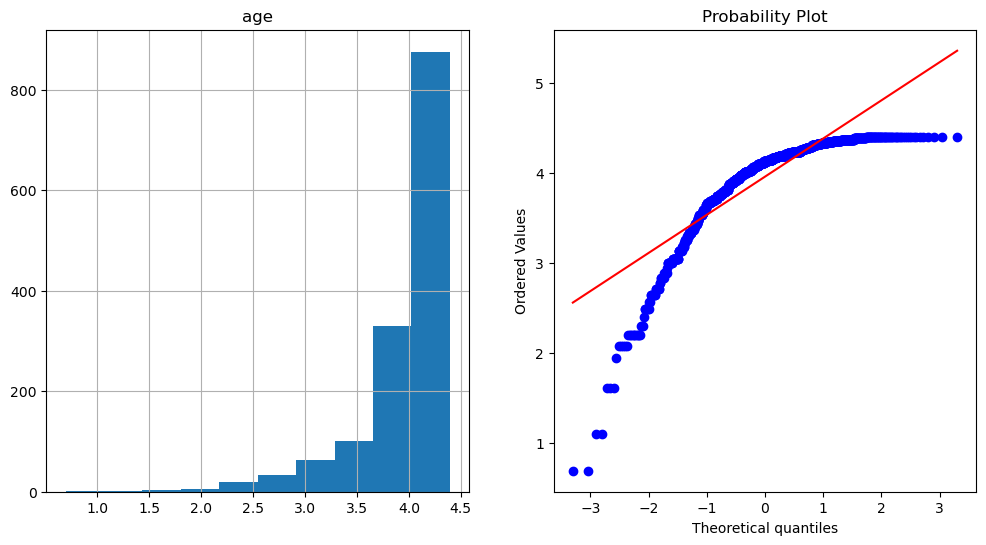

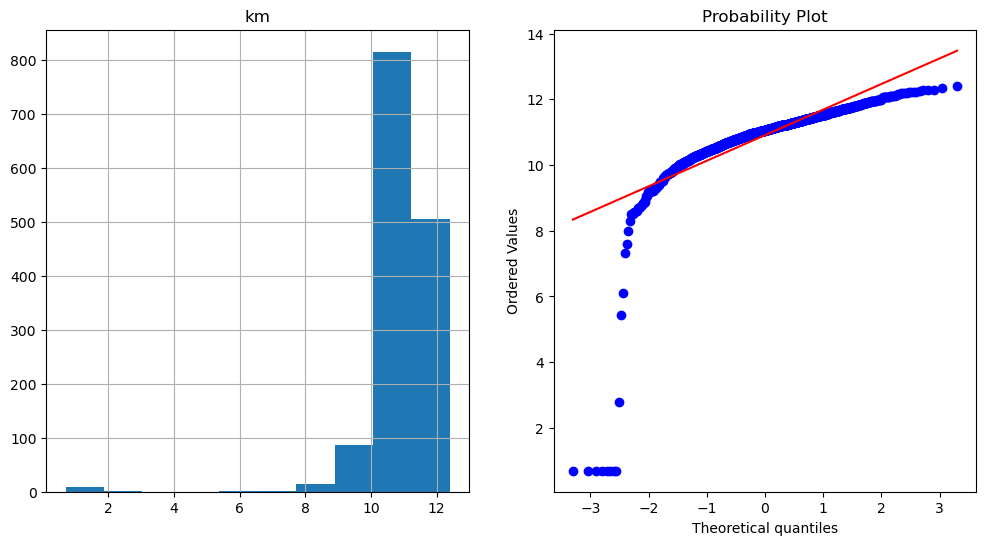

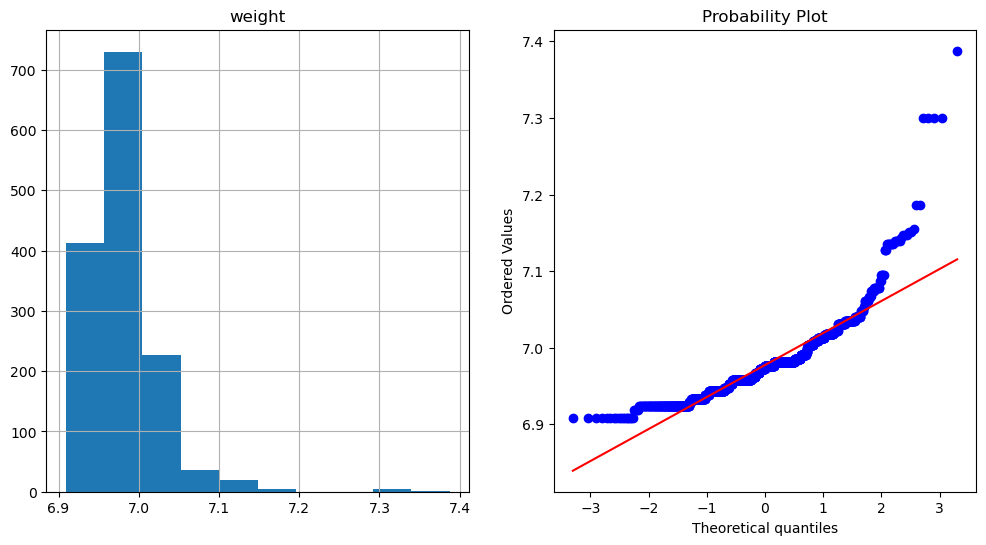

In [31]:
plot_data(np.log1p(data[continuous_feature]),continuous_feature)

#### Let's Try With `Square root`

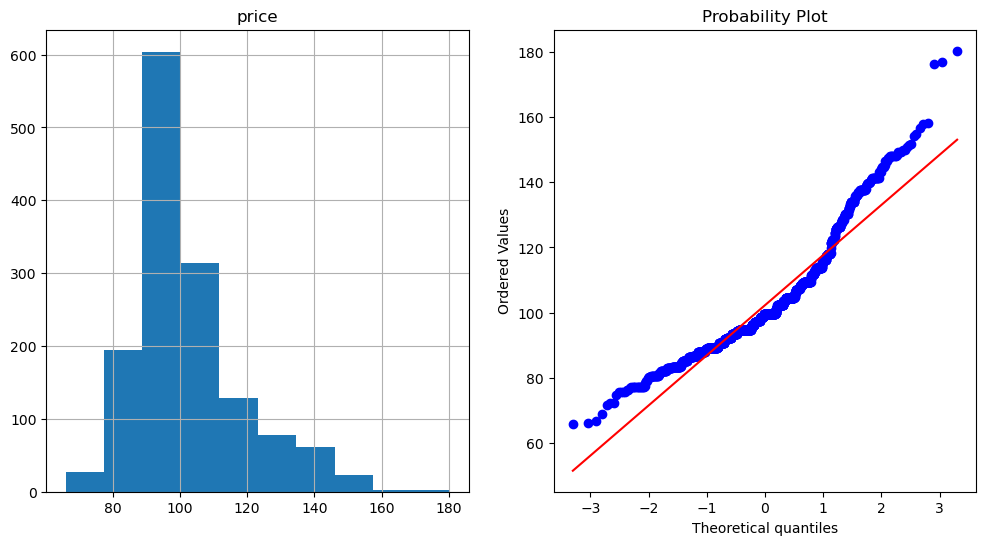

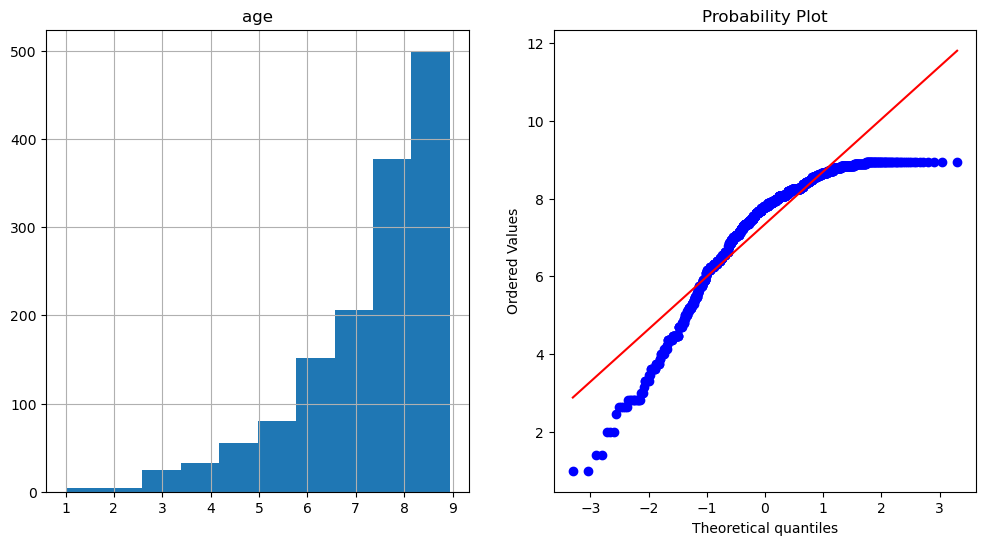

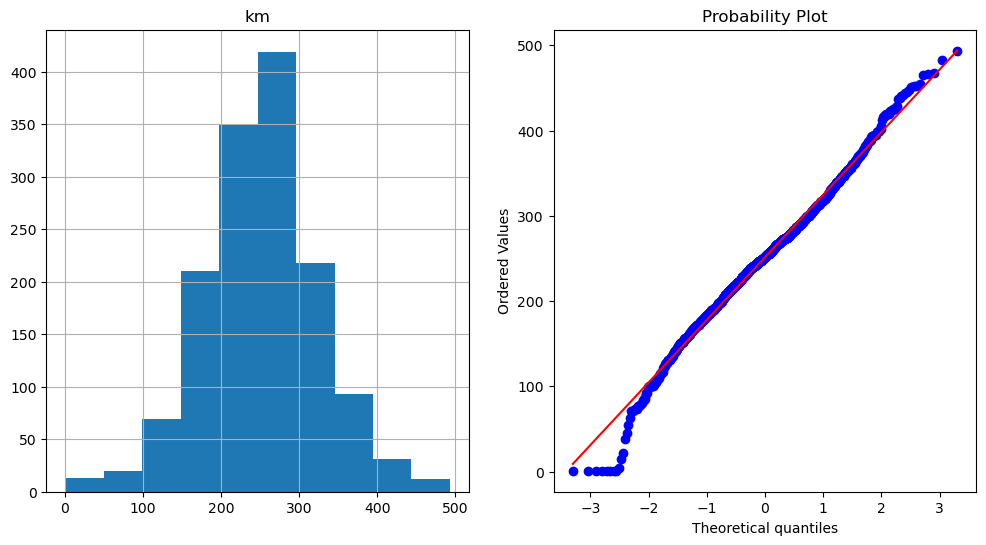

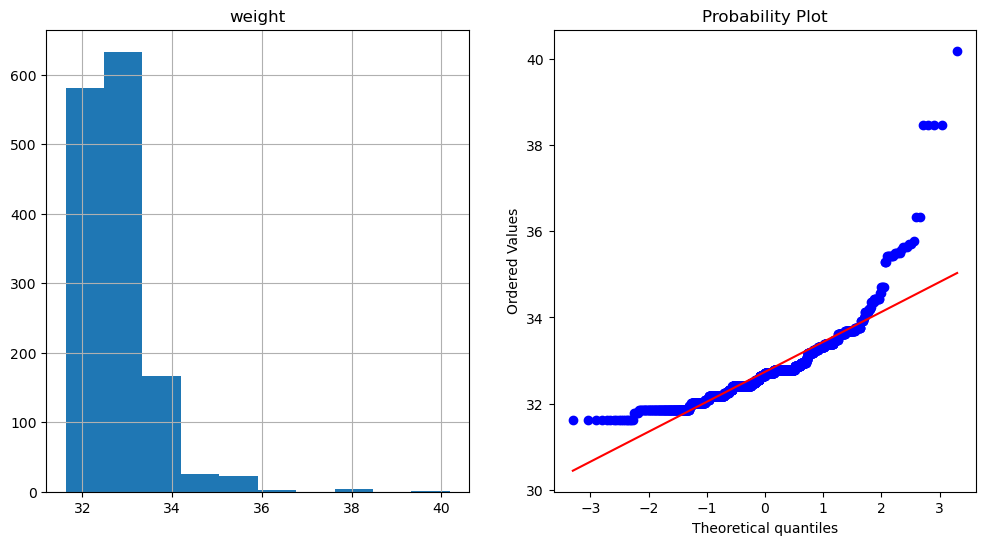

In [32]:
plot_data(np.sqrt(data[continuous_feature]),continuous_feature)

#### Let's Try With `Cube root`

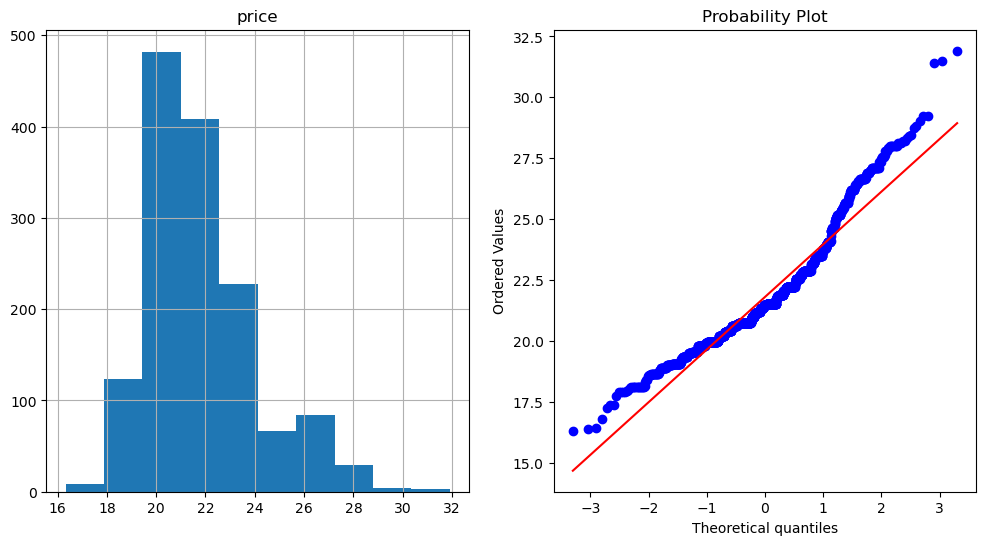

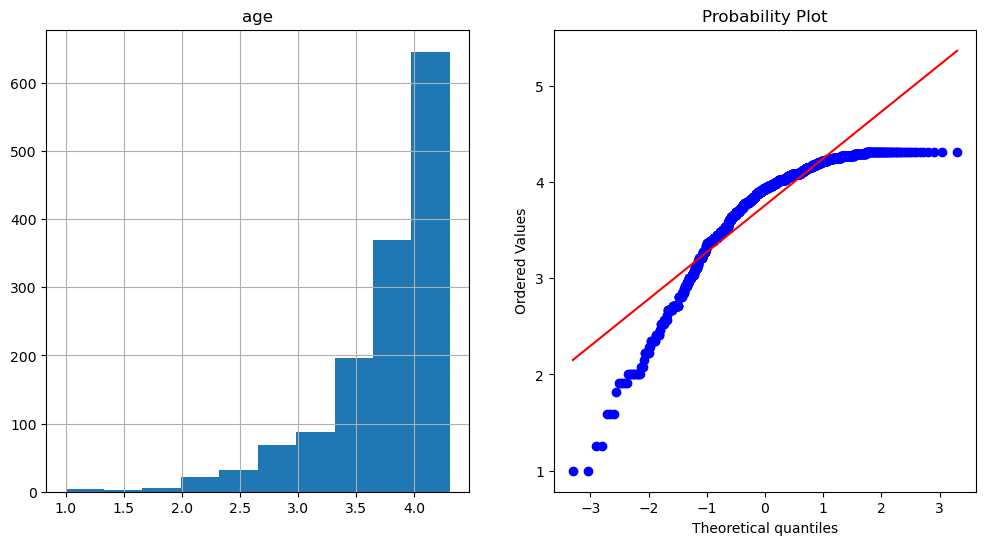

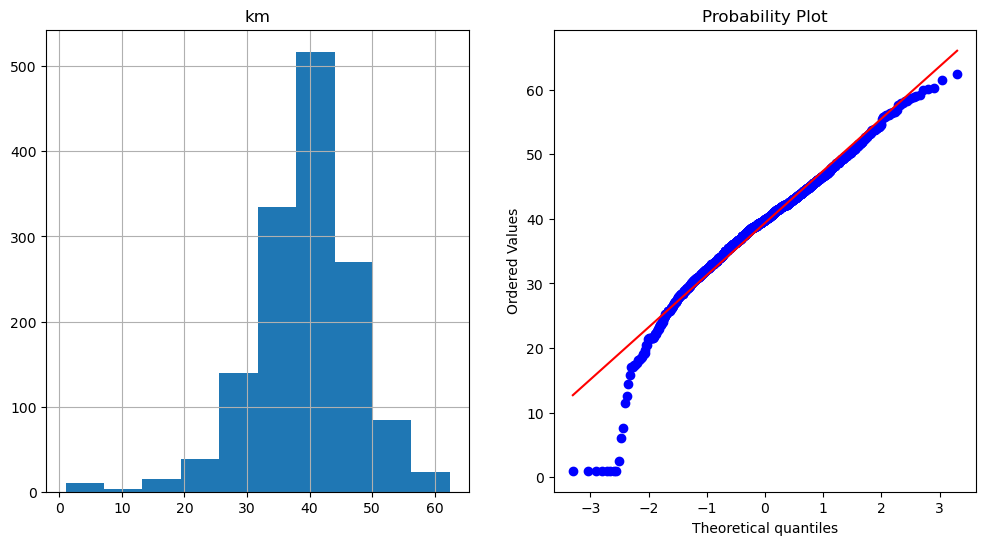

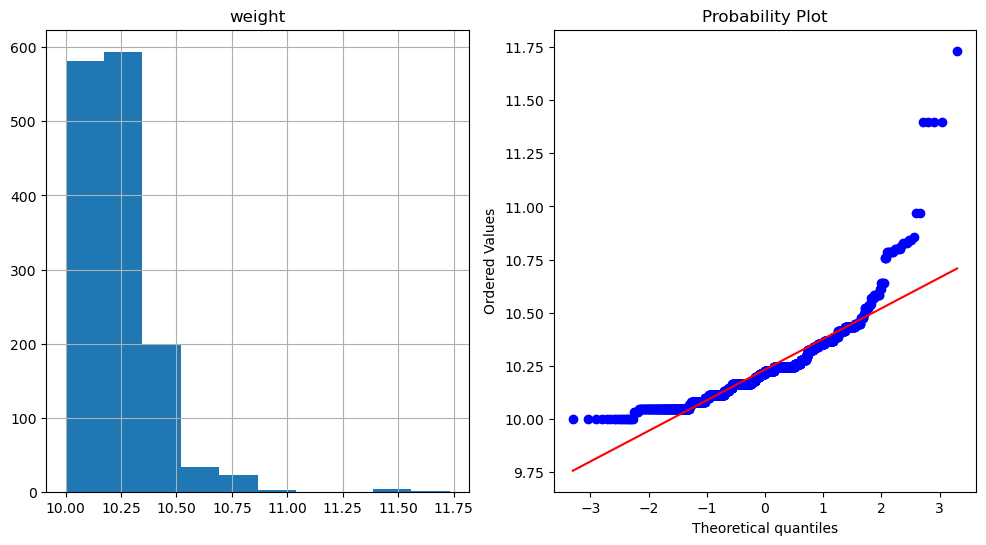

In [33]:
plot_data(np.cbrt(data[continuous_feature]),continuous_feature)

####  <b>Note:</b> Most of the Continuous Features visually do not look normally distributed lets have some Hypothetical test to check the normailty.

#### The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.

+ To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function, which takes on the following syntax:

In [34]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('Price feature',shapiro(data.price),'\n'
     'Age feature',shapiro(data.age),'\n'
     'Weight feature',shapiro(data.weight),'\n'
     'KM feature',shapiro(data.km))

Price feature ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
Age feature ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
Weight feature ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40) 
KM feature ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22)


### ^Observation: Since the p-values are less than .05, we reject the null hypothesis.
+ We have sufficient evidence to say that the sample data does not come from a normal distribution.

#### Visualizing the Relation between each independent Feature with respect to the Dependent Feature

In [35]:
def scatter_plot(df):
    for feature in df.columns:
        if feature != "price":
            plt.scatter(data[feature],data["price"])
            plt.xlabel(feature)
            plt.ylabel("price")
            plt.title(feature)
            plt.show()

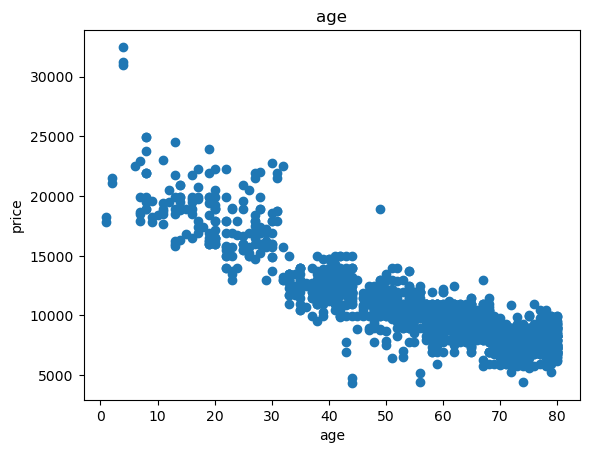

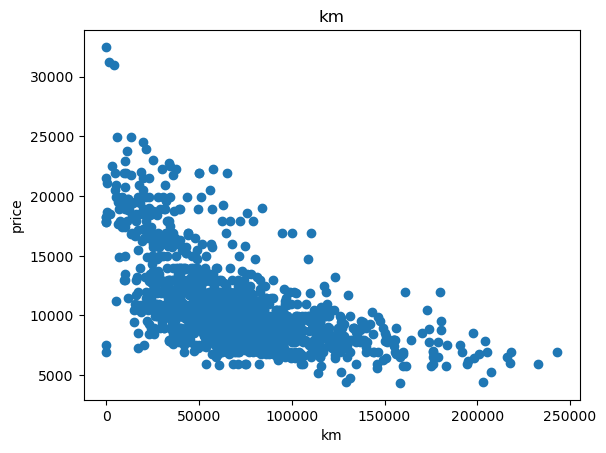

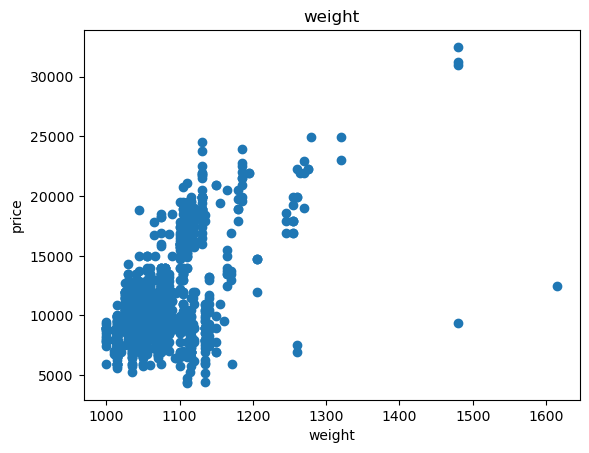

In [36]:
scatter_plot(data[continuous_feature])

#### ^Observation: Age feature has a good linear relation with Price a Negative Correlation as compare to other features

#### Lets analyze the relationship between the discrete variables and Price

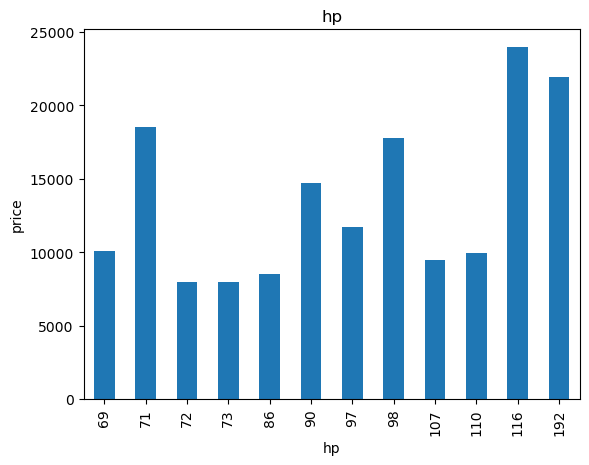

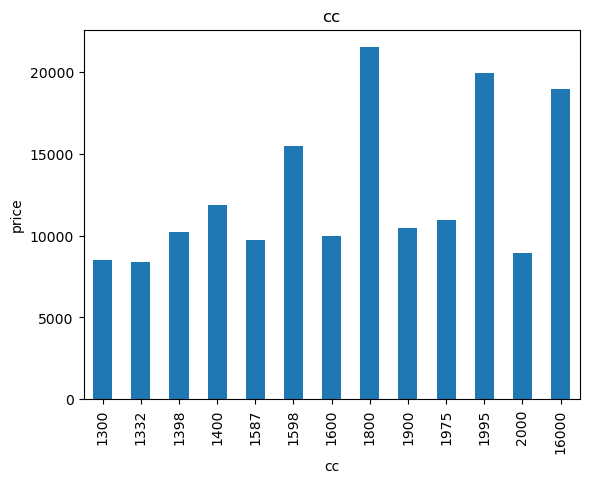

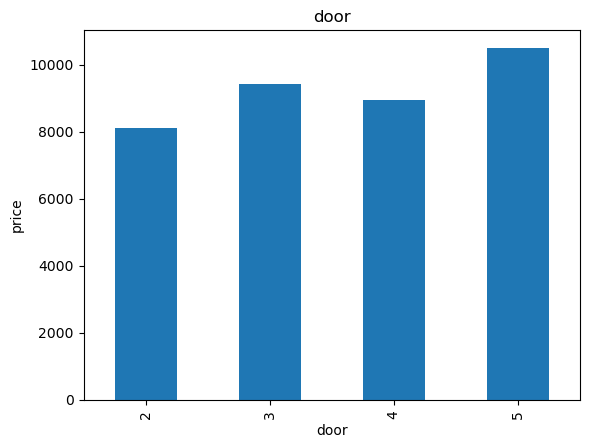

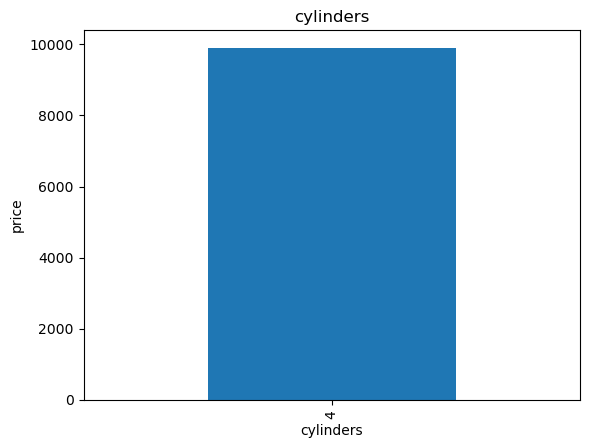

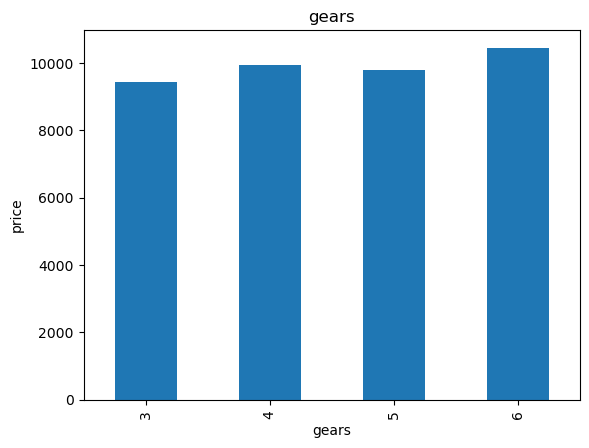

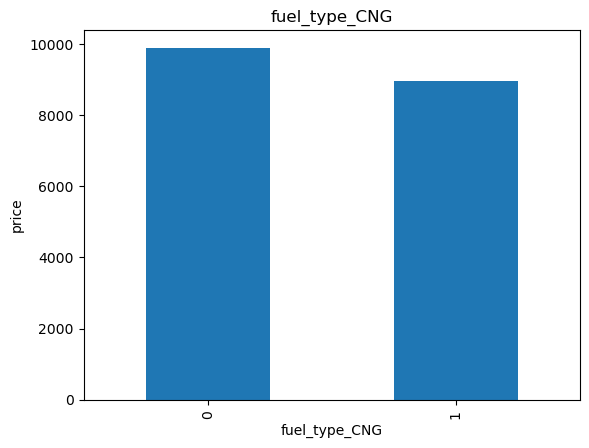

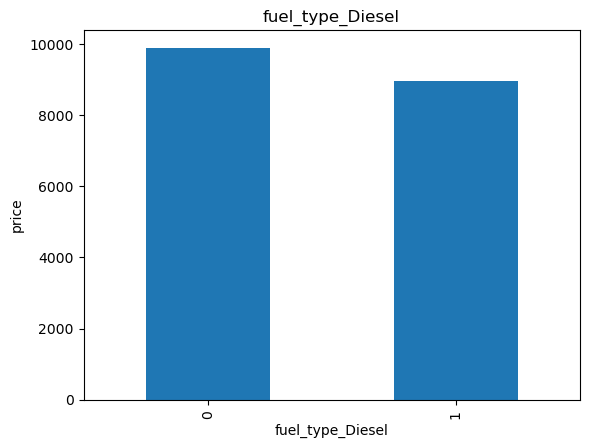

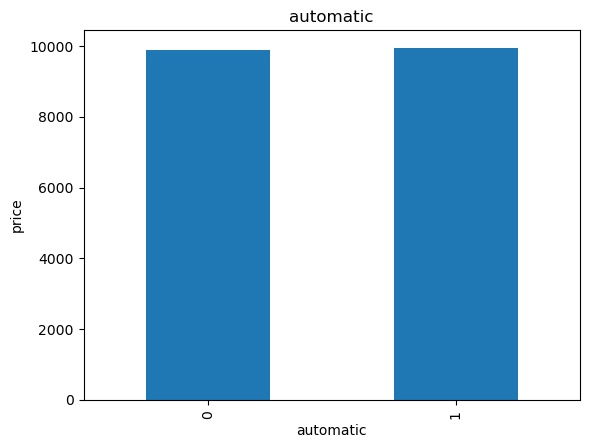

In [37]:
for feature in discrete_feature:
    df= data.copy()
    df.groupby(feature)["price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("price")
    plt.title(feature)
    plt.show()

#### ^Observation:There is'nt much of difference between how much Gears and Doors each Car has to have a sginificant amount of changes in Prices from each other and there is'nt any direct relation

### Visualizing Continuous Datatype for Outlier Detection

In [38]:
def box_plot(df):
    # Create box plots for numerical variables
    fig, axes = plt.subplots(df.shape[1], 1, figsize=(10, df.shape[1] * 2))
    axes = axes.flatten()
    for ax, col in zip(axes, df.columns):
        sns.boxplot(x=df[col], ax=ax, palette="crest")
        ax.set_xlabel(col)
        ax.set_ylabel("Range")

    plt.tight_layout()
    plt.show()

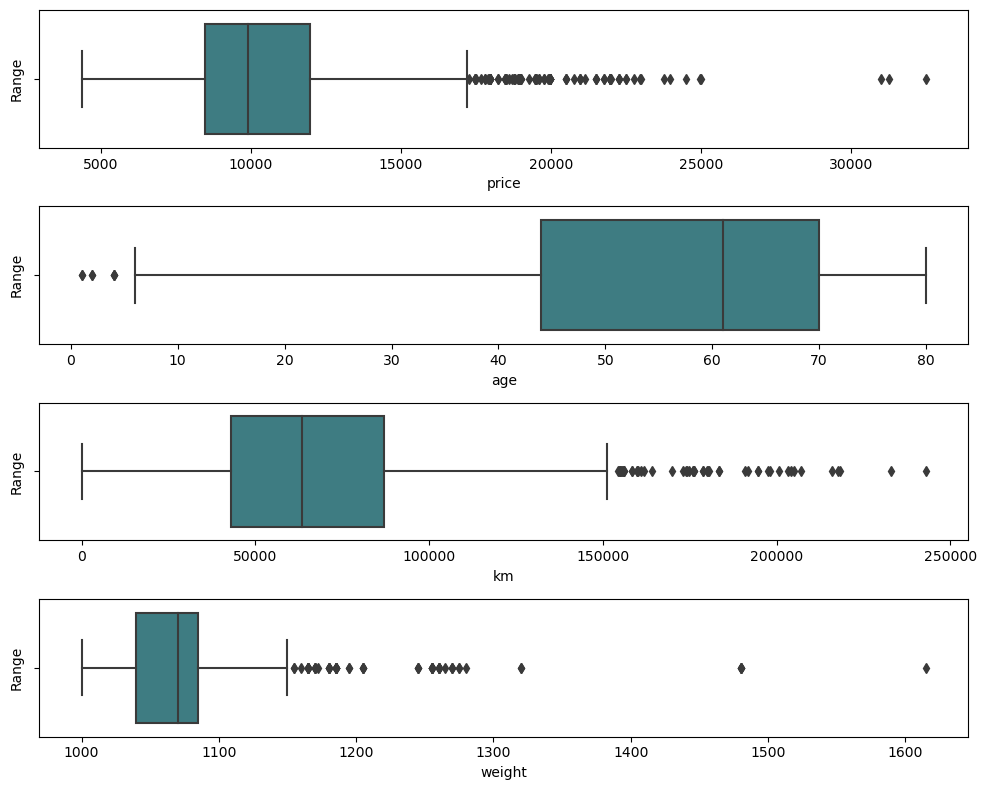

In [39]:
box_plot(data[continuous_feature])

#### ^Observation: A significant amount of outliers are present in each continuous feature
<b>Note:
+ We can't simply remove the outliers that would mean loss of information
+ We need to try different types of transformation or imputation and select the one with the best results
+ <b>Note:</b> Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by thr extreme values

#### Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case

In [40]:
before_imputation_model = smf.ols("price~age+km+weight",data = data).fit()
before_imputation_model.rsquared,before_imputation_model.rsquared_adj

(0.846739973087464, 0.8464186732406872)

### Let's try Median Imputation to handle Outlier in Profit

In [41]:
data_median = data.copy()# Ensure we don't modify the original DataFrame

In [42]:
def impute_outliers_with_median(data1, col):  
    for column in data1[col]:
        Q1 = data1[column].quantile(0.25)
        Q3 = data1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f"{column} lower bound: {lower_bound}\n{column} upper bound: {upper_bound}")
        med = data1[column].median()
        data1[column] = np.where((data1[column] < lower_bound) | (data1[column] > upper_bound), med, data1[column])

        # Plotting boxplot after imputation
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data1[column])
        plt.title(f'{column} after median imputation')
        plt.show()

    return data1

price lower bound: 3200.0
price upper bound: 17200.0


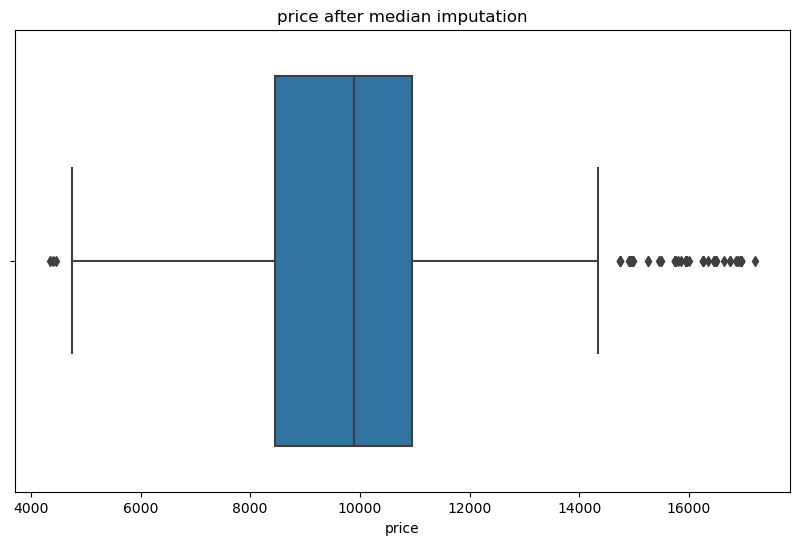

age lower bound: 5.0
age upper bound: 109.0


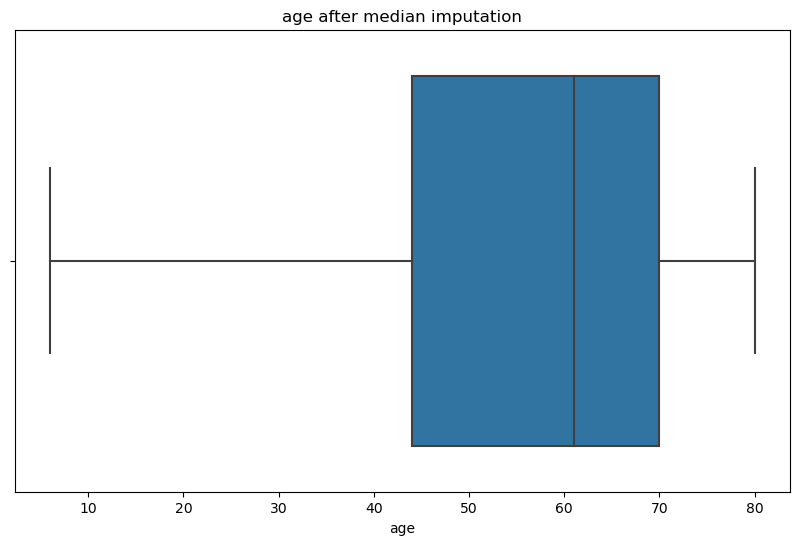

km lower bound: -23062.25
km upper bound: 153103.75


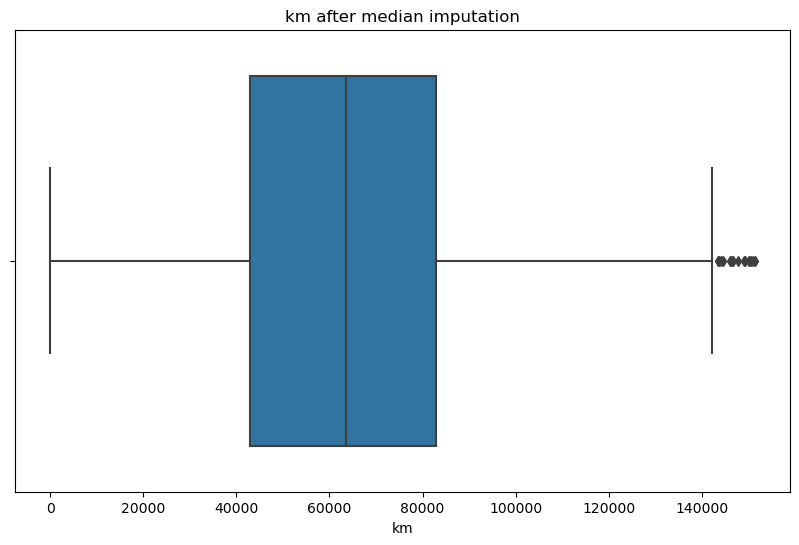

weight lower bound: 972.5
weight upper bound: 1152.5


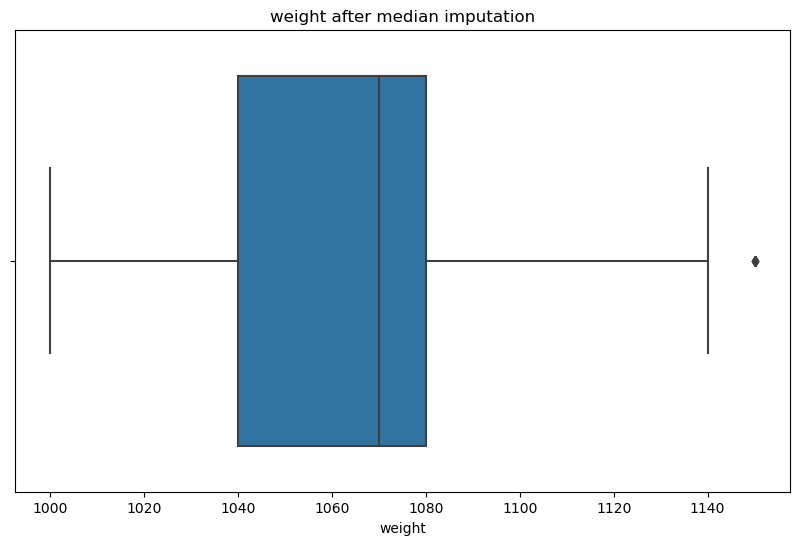

price   age       km   hp    cc  door  cylinders  gears  weight  \
0     13500.0  23.0  46986.0   90  2000     3          4      5  1070.0   
1     13750.0  23.0  72937.0   90  2000     3          4      5  1070.0   
2     13950.0  24.0  41711.0   90  2000     3          4      5  1070.0   
3     14950.0  26.0  48000.0   90  2000     3          4      5  1070.0   
4     13750.0  30.0  38500.0   90  2000     3          4      5  1070.0   
...       ...   ...      ...  ...   ...   ...        ...    ...     ...   
1430   7500.0  69.0  20544.0   86  1300     3          4      5  1025.0   
1431  10845.0  72.0  19000.0   86  1300     3          4      5  1015.0   
1432   8500.0  71.0  17016.0   86  1300     3          4      5  1015.0   
1433   7250.0  70.0  16916.0   86  1300     3          4      5  1015.0   
1434   6950.0  76.0      1.0  110  1600     5          4      5  1114.0   

      fuel_type_CNG  fuel_type_Diesel  automatic  
0                 0                 1          0  
1                 0                 1          0  
2                 0                 1          0  
3                 0                 1          0  
4                 0                 1          0  
...             ...               ...        ...  
1430              0                 0          0  
1431              0                 0          0  
1432              0                 0          0  
1433              0                 0          0  
1434              0                 0          0  

[1435 rows x 12 columns]

In [43]:
data_impute_median = impute_outliers_with_median(data_median,continuous_feature)
data_impute_median

#### Let's test our data in model and find the R-squared with median imputation data model

In [44]:
after_median_imputation_model = smf.ols("price~age+km+weight", data = data_impute_median).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 

(0.4678223027643482, 0.4667066262502274)

In [45]:
data_mean = data.copy()

In [46]:
def impute_outliers_with_mean(data2, column):
    for col in column:
        for i in data2[col]:
            Q1 = data2[col].quantile(0.25)
            Q3 = data2[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            med = data2[col].median()
            data2[col] = np.where((data2[col] < lower_bound) | (data2[col] > upper_bound), med, data2[col])


        # Plotting boxplot after imputation
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data2[col])
        plt.title(f'{col} after mean imputation')
        plt.show()
    return data2

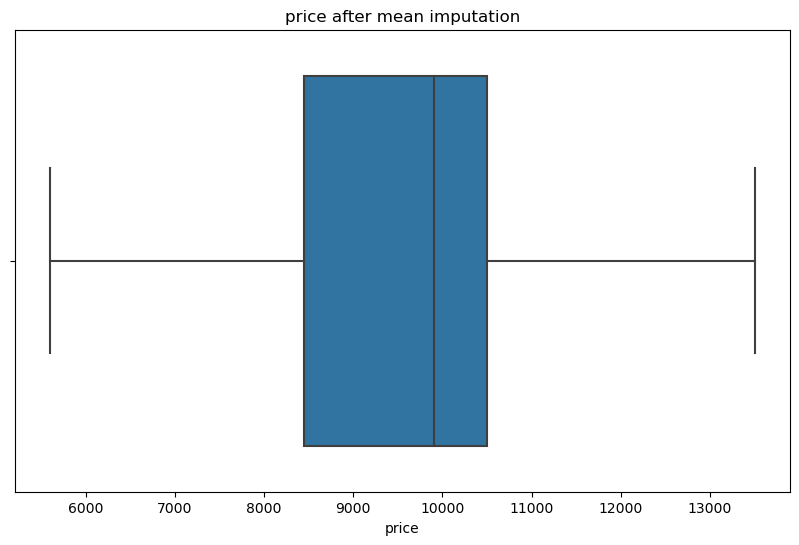

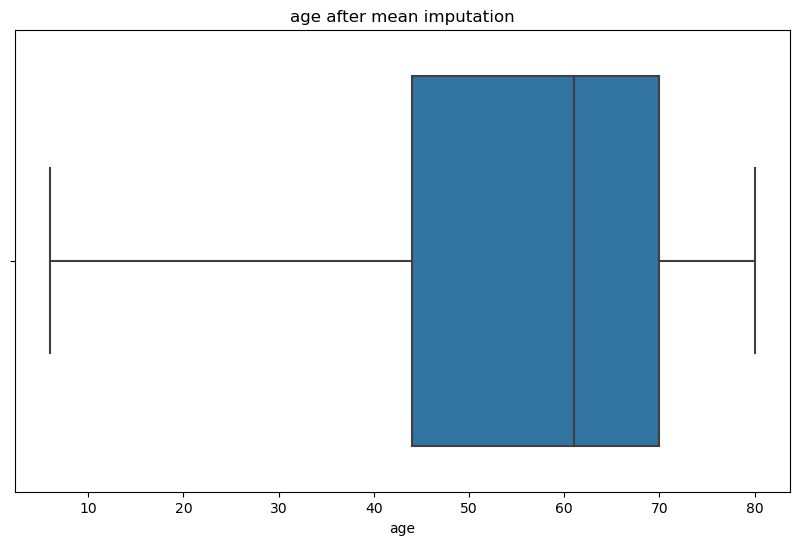

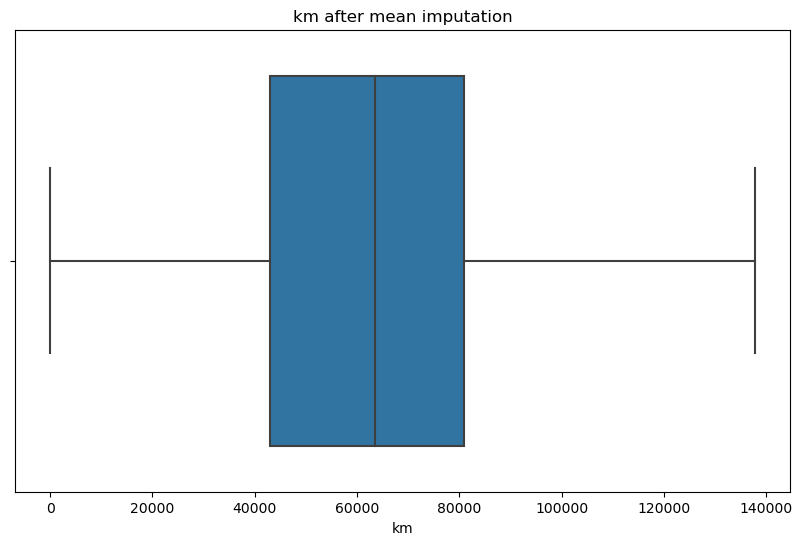

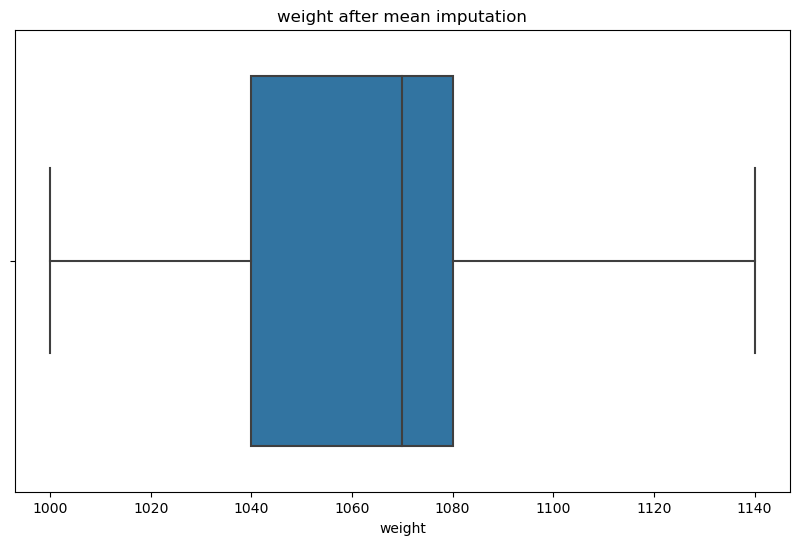

price   age       km   hp    cc  door  cylinders  gears  weight  \
0     13500.0  23.0  46986.0   90  2000     3          4      5  1070.0   
1      9900.0  23.0  72937.0   90  2000     3          4      5  1070.0   
2      9900.0  24.0  41711.0   90  2000     3          4      5  1070.0   
3      9900.0  26.0  48000.0   90  2000     3          4      5  1070.0   
4      9900.0  30.0  38500.0   90  2000     3          4      5  1070.0   
...       ...   ...      ...  ...   ...   ...        ...    ...     ...   
1430   7500.0  69.0  20544.0   86  1300     3          4      5  1025.0   
1431  10845.0  72.0  19000.0   86  1300     3          4      5  1015.0   
1432   8500.0  71.0  17016.0   86  1300     3          4      5  1015.0   
1433   7250.0  70.0  16916.0   86  1300     3          4      5  1015.0   
1434   6950.0  76.0      1.0  110  1600     5          4      5  1114.0   

      fuel_type_CNG  fuel_type_Diesel  automatic  
0                 0                 1          0  
1                 0                 1          0  
2                 0                 1          0  
3                 0                 1          0  
4                 0                 1          0  
...             ...               ...        ...  
1430              0                 0          0  
1431              0                 0          0  
1432              0                 0          0  
1433              0                 0          0  
1434              0                 0          0  

[1435 rows x 12 columns]

In [47]:
data_impute_mean = impute_outliers_with_mean(data_mean, continuous_feature)
data_impute_mean

In [48]:
after_mean_imputation_model = smf.ols("price~age+km+weight", data = data_impute_mean).fit()

In [49]:
after_mean_imputation_model.rsquared,after_mean_imputation_model.rsquared_adj

(0.32084097382867804, 0.3194171603566208)

In [50]:
data3 = data.copy()

In [51]:
def remove_outliers(df3,column):
    for col in column:
        Q1 = df3[col].quantile(0.25)
        Q3 = df3[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f"{col} lower bound: {lower_bound}\n{col} upper bound: {upper_bound}")

        # Filter out outliers
        filtered_data = df3[(df3[col] >= lower_bound) & (df3[col] <= upper_bound)]
        #print(filtered_data)

        #visualize box plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=filtered_data[col])
        plt.title(f'{col} Boxplot - Data Without Outliers')
        plt.show()
    return filtered_data

price lower bound: 3200.0
price upper bound: 17200.0


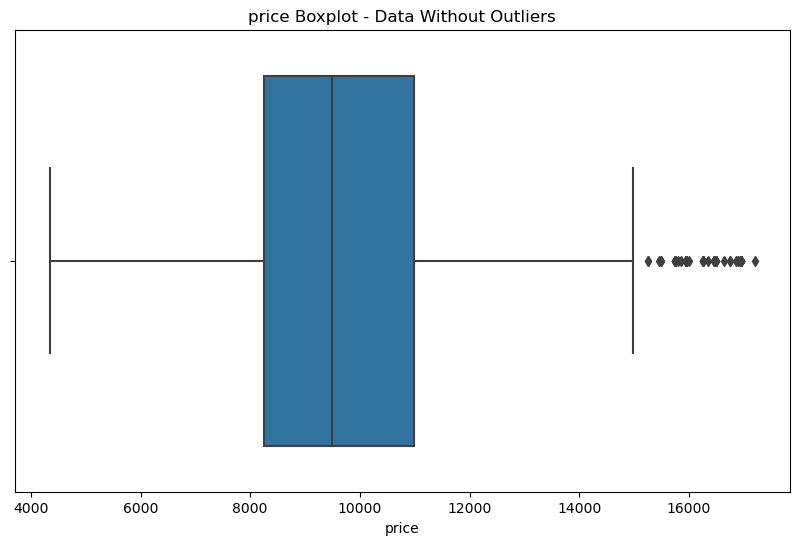

age lower bound: 5.0
age upper bound: 109.0


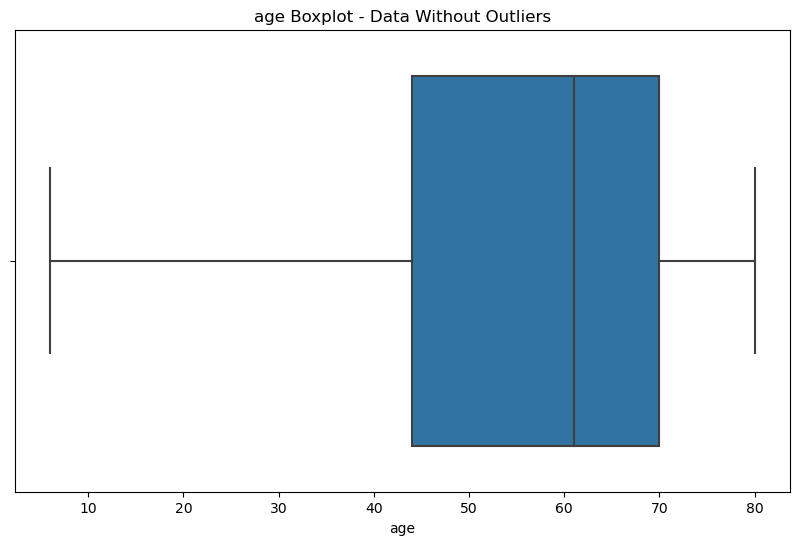

km lower bound: -23062.25
km upper bound: 153103.75


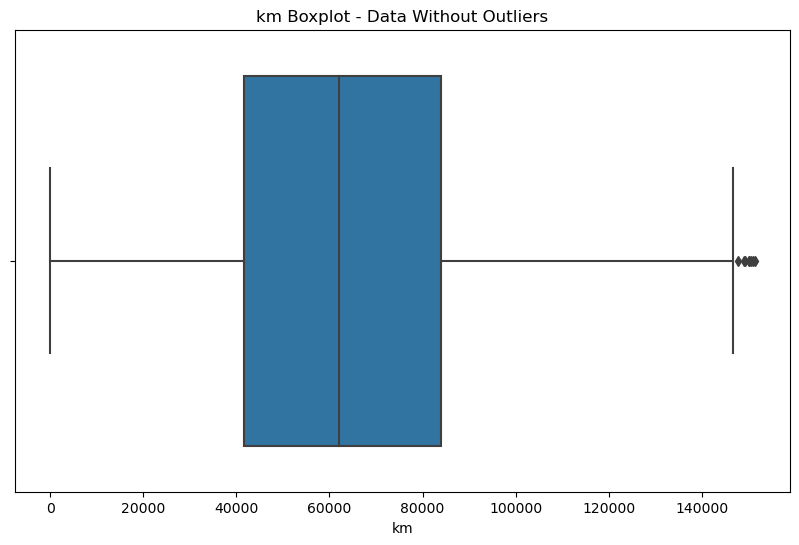

weight lower bound: 972.5
weight upper bound: 1152.5


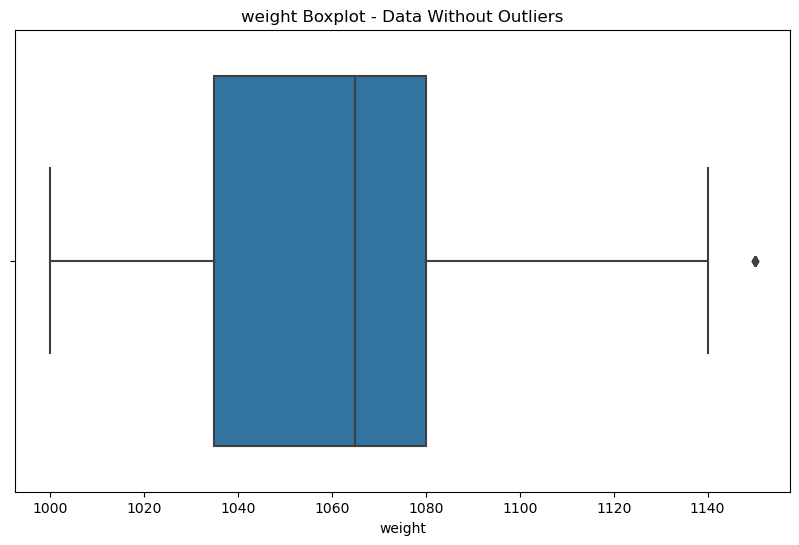

In [52]:
data_no_outliers = remove_outliers(data3,continuous_feature)

In [53]:
after_remove_outliers_model = smf.ols("price~age+km+weight",data = data_no_outliers).fit()
after_remove_outliers_model.rsquared, after_remove_outliers_model.rsquared_adj

(0.8373129232501232, 0.8369556309878614)

In [54]:
np.sqrt(after_remove_outliers_model.mse_resid)

1240.9286189527168

In [55]:
log_transformation_data = data.copy()
log_transformation_data[continuous_feature] = np.log(log_transformation_data[continuous_feature])
log_transformation_model = smf.ols("price~age+km+weight", data = log_transformation_data).fit()
log_transformation_model.rsquared, log_transformation_model.rsquared_adj

(0.7069873404282616, 0.7063730581230798)

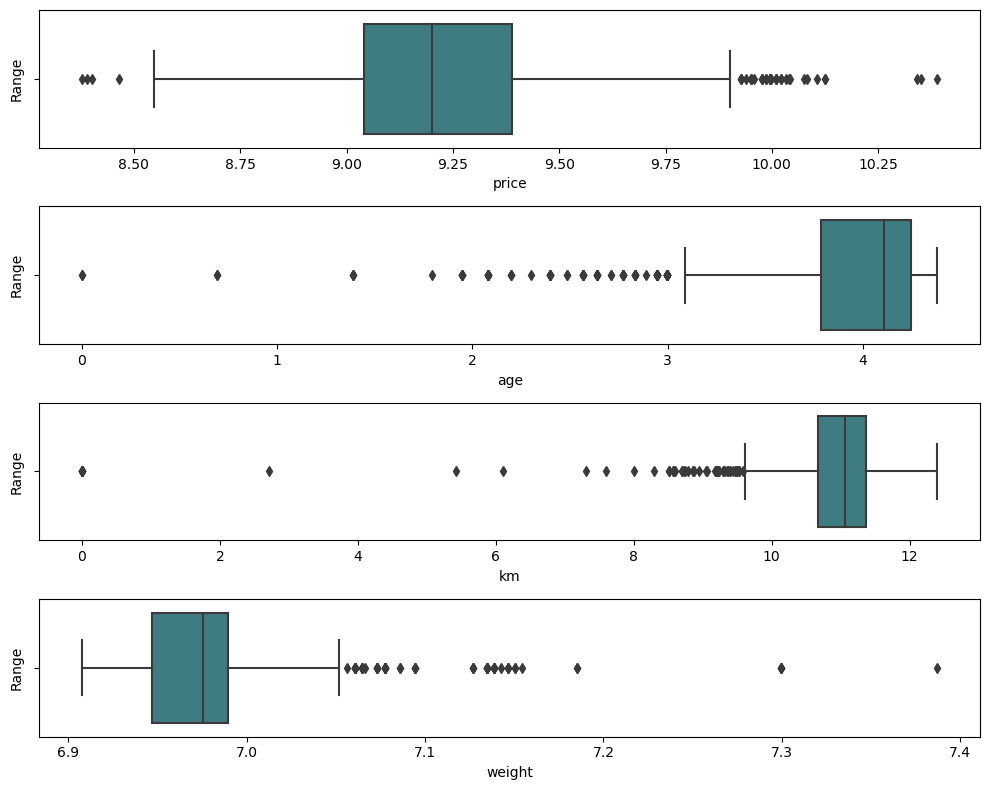

In [56]:
box_plot(log_transformation_data[continuous_feature])

In [57]:
log_transformation_data = data.copy()
log_transformation_data[continuous_feature] = np.log1p(log_transformation_data[continuous_feature])
log_transformation_model = smf.ols("price~age+km+weight", data = log_transformation_data).fit()
log_transformation_model.rsquared, log_transformation_model.rsquared_adj

(0.7226757105787096, 0.7220943179384134)

In [58]:
# cube root transformation model
cube_root_transformation = data.copy() 
cube_root_transformation[continuous_feature] = np.cbrt(cube_root_transformation[continuous_feature])
cube_root_transformation_model = smf.ols("price~age+km+weight",data = cube_root_transformation).fit()
cube_root_transformation_model.rsquared, cube_root_transformation_model.rsquared_adj

(0.8146046800585908, 0.8142160106247514)

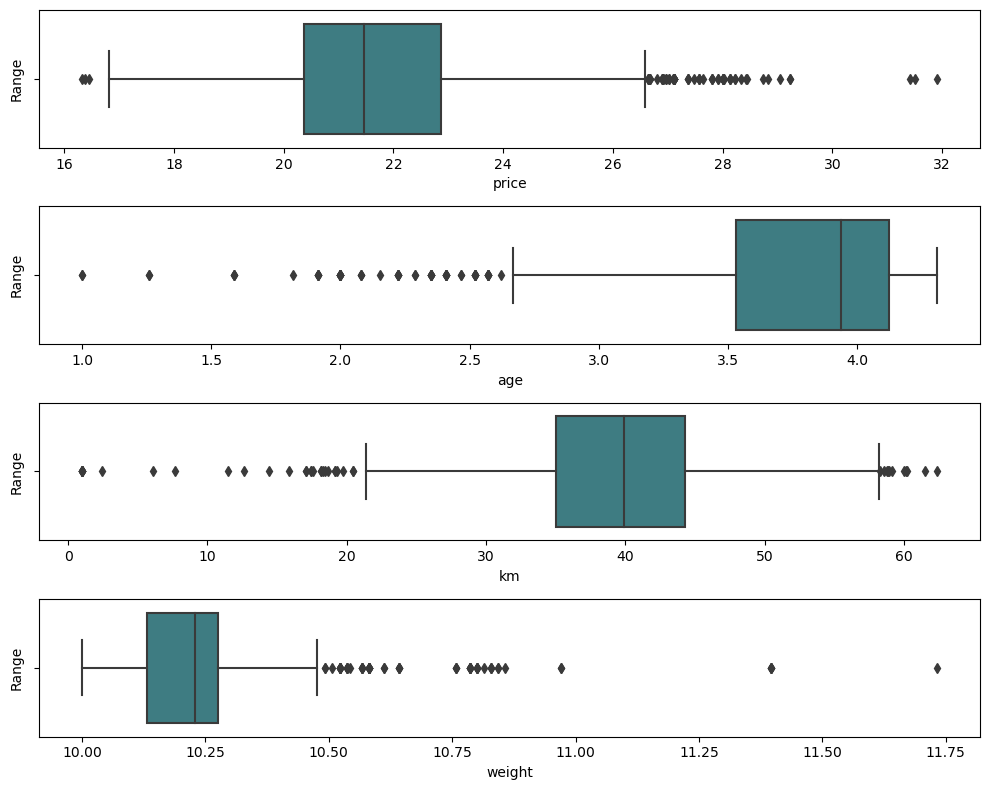

In [59]:
box_plot(cube_root_transformation[continuous_feature])

In [60]:
# squar root transformation model
square_root_transformation = data.copy() 
square_root_transformation[continuous_feature] = np.sqrt(square_root_transformation[continuous_feature])
square_root_transformation_model = smf.ols("price~age+km+weight",data = square_root_transformation).fit()
square_root_transformation_model.rsquared,square_root_transformation_model.rsquared_adj

(0.8422228684565507, 0.8418920987887447)

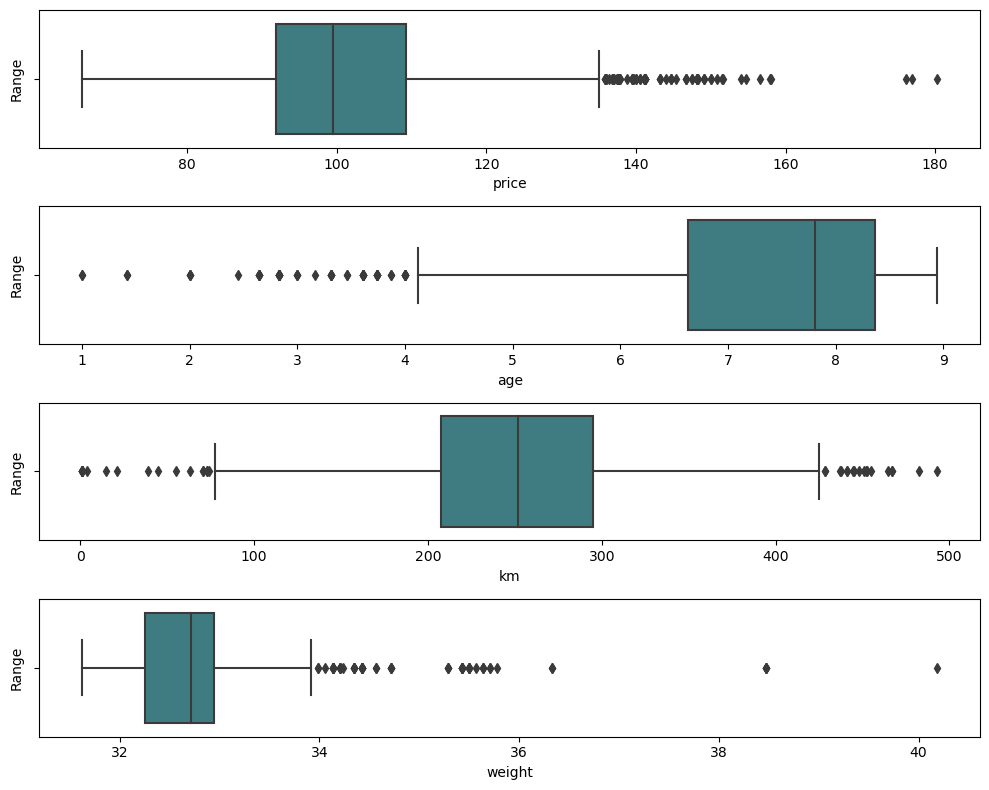

In [61]:
box_plot(square_root_transformation[continuous_feature])

#### ^Observation: The outliers are still present

#### ^Observation: After removing Outliers the model performed very poorly than the raw data model
+ Note: We will continue with different technique to deal with that

#### Raw Data Model:

In [62]:
print(data.columns)

Index(['price', 'age', 'km', 'hp', 'cc', 'door', 'cylinders', 'gears',
       'weight', 'fuel_type_CNG', 'fuel_type_Diesel', 'automatic'],
      dtype='object')


In [63]:
raw_data_model = smf.ols("price~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", data = data).fit()
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     902.9
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:13:18   Log-Likelihood:                -12360.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1424   BIC:                         2.480e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -506.4398     86.900     -5.828      0.000    -676.905    -335.974
age               -123.8404      2.629    -47.102      0.000    -128.998    -118.683
km                  -0.0174      0.001    -13.072      0.000      -0.020      -0.015
hp                  23.3146      3.574      6.524      0.000      16.304      30.325
cc                  -0.0520      0.092     -0.565      0.572      -0.232       0.128
door               -29.8840     40.875     -0.731      0.465    -110.066      50.298
cylinders        -2025.7592    347.600     -5.828      0.000   -2707.621   -1343.897
gears              627.0820    197.877      3.169      0.002     238.921    1015.243
weight              20.7066      1.219     16.992      0.000      18.316      23.097
fuel_type_CNG    -1144.7185    338.371     -3.383      0.001   -1808.478    -480.959
fuel_type_Diesel  -607.7196    235.374     -2.582      0.010   -1069.438    -146.002
automatic          303.2536    160.902      1.885      0.060     -12.377     618.884
==============================================================================
Omnibus:                      259.860   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2720.769
Skew:                          -0.512   Prob(JB):                         0.00
Kurtosis:                       9.668   Cond. No.                     5.22e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.22e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
np.sqrt(raw_data_model.mse_resid)

1336.653710578392

In [65]:
influence_points=raw_data_model.get_influence()
c, p_value=influence_points.cooks_distance

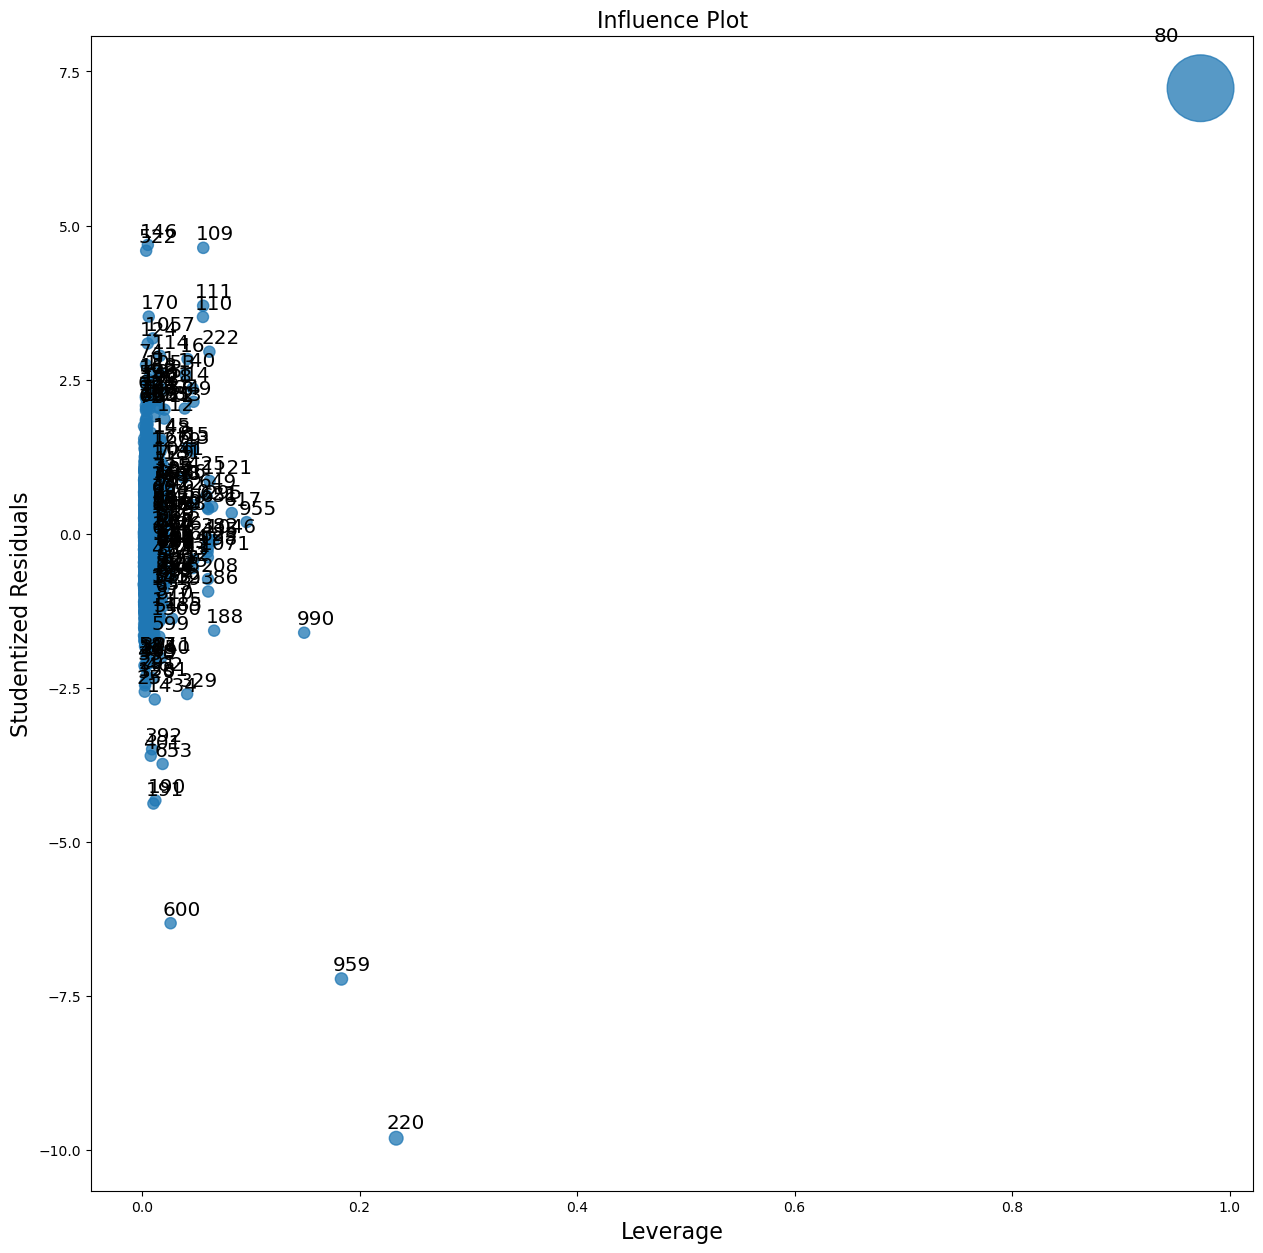

In [66]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(15,15))
fig=influence_plot(raw_data_model,ax = ax)
plt.show()

#### Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [67]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.03


#### Let's plot the influencers and also plot a cut off line using the stem plot

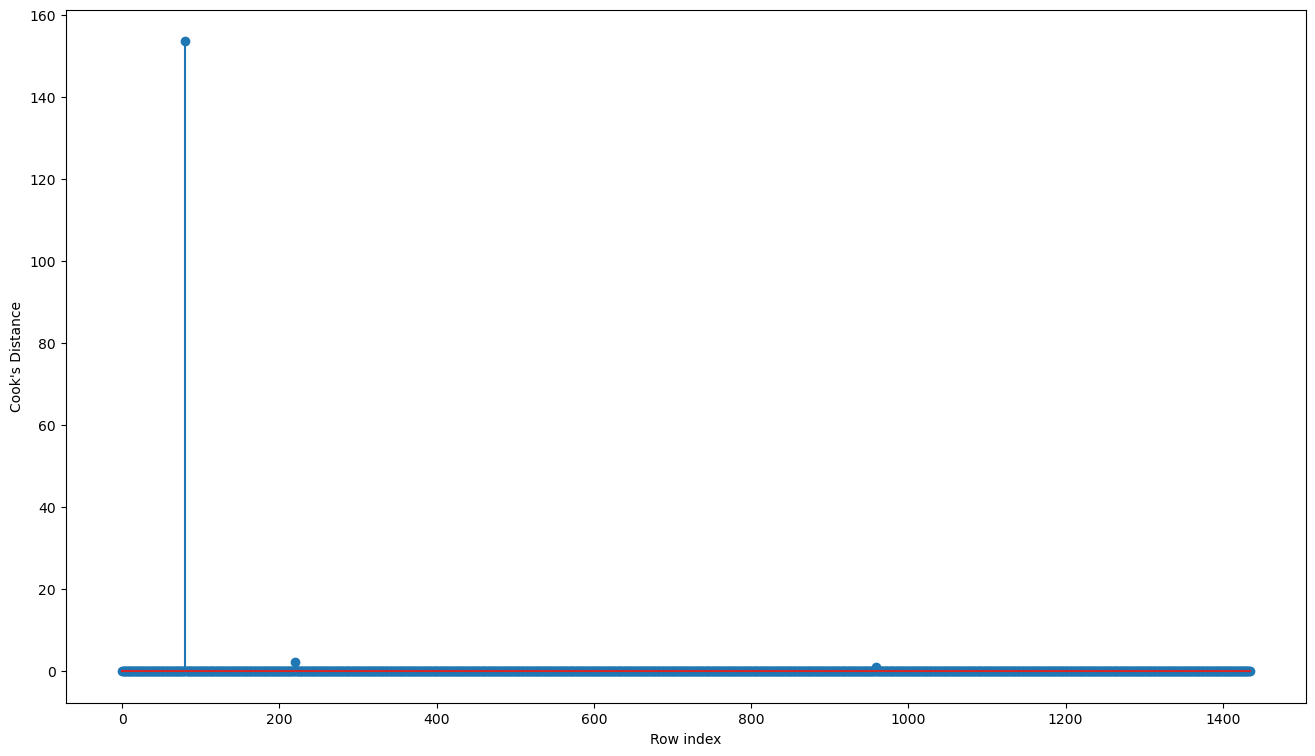

In [68]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [69]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 153.5889262478654)

In [70]:
data[data.index.isin([80])]

price  age     km   hp     cc  door  cylinders  gears  weight  \
80  18950   25  20019  110  16000     5          4      5    1180   

    fuel_type_CNG  fuel_type_Diesel  automatic  
80              0                 0          1

In [71]:
dataframe= data.copy()
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dataframe=dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

price  age     km  hp    cc  door  cylinders  gears  weight  fuel_type_CNG  \
0  13500   23  46986  90  2000     3          4      5    1165              0   
1  13750   23  72937  90  2000     3          4      5    1165              0   
2  13950   24  41711  90  2000     3          4      5    1165              0   
3  14950   26  48000  90  2000     3          4      5    1165              0   
4  13750   30  38500  90  2000     3          4      5    1170              0   

   fuel_type_Diesel  automatic  
0                 1          0  
1                 1          0  
2                 1          0  
3                 1          0  
4                 1          0

In [72]:
data.shape
print(dataframe.columns)

Index(['price', 'age', 'km', 'hp', 'cc', 'door', 'cylinders', 'gears',
       'weight', 'fuel_type_CNG', 'fuel_type_Diesel', 'automatic'],
      dtype='object')


In [73]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        raw_data_model=smf.ols("price~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic",data=dataframe).fit()
        (c,_)=raw_data_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataframe
    else:
        final_model=smf.ols("price~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic",data=dataframe).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8758982578276345
Thus model accuracy is improved to 0.8847649274166013
Thus model accuracy is improved to 0.8896173987082908
Thus model accuracy is improved to 0.890640450175684
Thus model accuracy is improved to 0.8931044432559762
Thus model accuracy is improved to 0.893296495449008
Thus model accuracy is improved to 0.892667387285717
Thus model accuracy is improved to 0.8922112283105681
Thus model accuracy is improved to 0.8917374377501621
Thus model accuracy is improved to 0.8913625604378413
Thus model accuracy is improved to 0.8909426689969627
Thus model accuracy is improved to 0.8903914750785082
Thus model accuracy is improved to 0.8899377406788334
Thus model accuracy is improved to 0.889493455454992
Thus model accuracy is improved to 0.8867207277653898
Thus model accuracy is improved to 0.8862052310397713
Thus model accuracy is improved to 0.8875969423271074
Thus model accuracy is improved to 0.889108736739898
Thus model accuracy is improved t

Thus model accuracy is improved to 0.8922600626783034
Thus model accuracy is improved to 0.8928136385047307
Thus model accuracy is improved to 0.893005331273444
Thus model accuracy is improved to 0.8932094085662116
Thus model accuracy is improved to 0.8934109244949607
Thus model accuracy is improved to 0.8937533246040726
Thus model accuracy is improved to 0.8939855352942737
Thus model accuracy is improved to 0.8943586791333272
Thus model accuracy is improved to 0.8944990893331807
Thus model accuracy is improved to 0.8945223703662082
Thus model accuracy is improved to 0.894695845392316
Thus model accuracy is improved to 0.8947625413627586
Thus model accuracy is improved to 0.8949687567839135
Thus model accuracy is improved to 0.8954159903193869
Thus model accuracy is improved to 0.8960876017337798
Thus model accuracy is improved to 0.8962470638583675
Thus model accuracy is improved to 0.8966276750016426
Thus model accuracy is improved to 0.8967642849444002
Thus model accuracy is improve

In [74]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

In [75]:
dataframe.shape

(1249, 12)

In [76]:
dataframe.head()

price  age     km   hp    cc  door  cylinders  gears  weight  \
0  12950   23  71138   69  1900     3          4      5    1105   
1  17950   24  21716  110  1600     3          4      5    1105   
2  16750   24  25563  110  1600     3          4      5    1065   
3  16950   30  64359  110  1600     3          4      5    1105   
4  15950   30  67660  110  1600     3          4      5    1105   

   fuel_type_CNG  fuel_type_Diesel  automatic  
0              0                 1          0  
1              0                 0          0  
2              0                 0          0  
3              0                 0          0  
4              0                 0          0

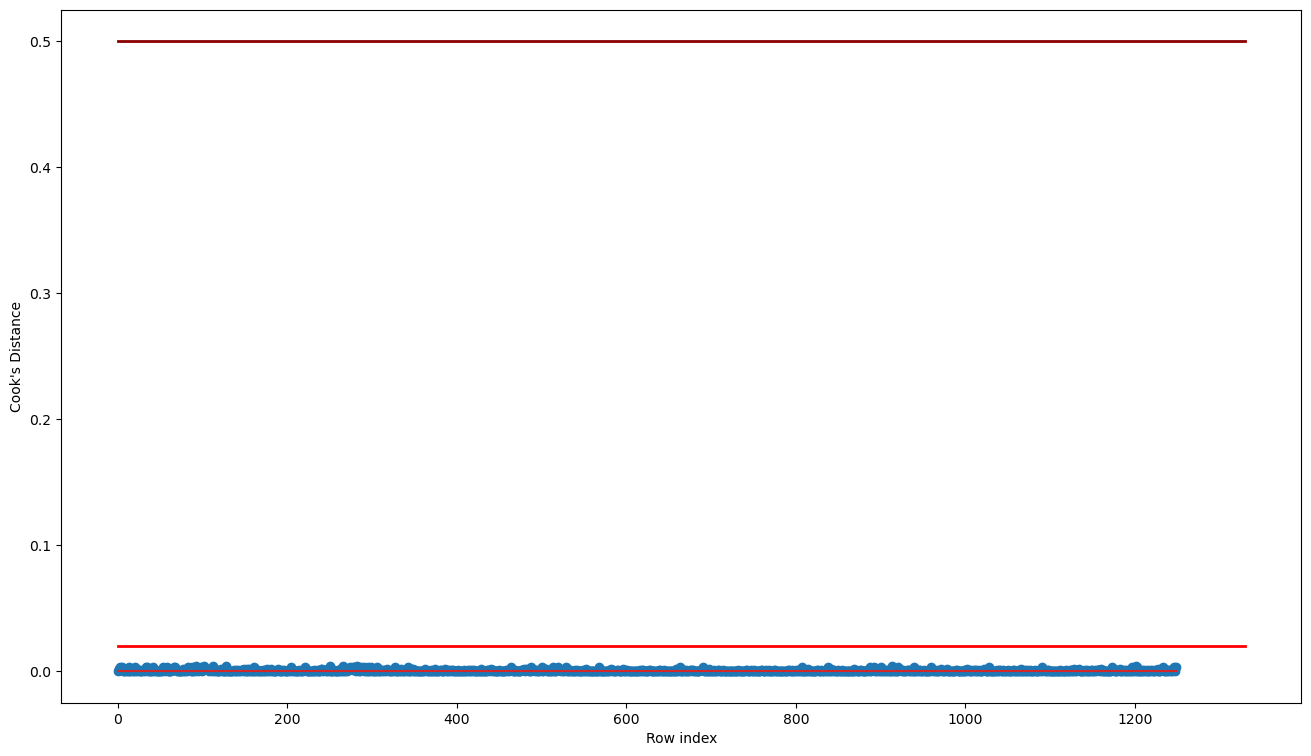

In [77]:
fig = plt.figure(figsize = (16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(dataframe)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

#### ^Observation: All the points are below our cut-off line 
+ Hence, we can say that there are no influncers present in our model we can proceed with the predictions

In [78]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1121.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:13:29   Log-Likelihood:                -10270.
No. Observations:                1249   AIC:                         2.056e+04
Df Residuals:                    1238   BIC:                         2.062e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1133.4608     96.359    -11.763      0.000   -1322.505    -944.417
age               -113.5254      2.268    -50.059      0.000    -117.975    -109.076
km                  -0.0149      0.001    -14.714      0.000      -0.017      -0.013
hp                -237.9419     27.402     -8.683      0.000    -291.701    -184.183
cc                  16.7589      2.105      7.963      0.000      12.630      20.888
door              -209.0456     33.777     -6.189      0.000    -275.313    -142.779
cylinders        -4533.8432    385.435    -11.763      0.000   -5290.020   -3777.666
gears              -45.9967    178.718     -0.257      0.797    -396.621     304.627
weight              35.4269      1.583     22.381      0.000      32.321      38.532
fuel_type_CNG    -1972.1410    382.212     -5.160      0.000   -2721.995   -1222.287
fuel_type_Diesel   -1.8e+04   1860.303     -9.675      0.000   -2.16e+04   -1.43e+04
automatic         -217.7622    137.558     -1.583      0.114    -487.634      52.110
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.653
Skew:                           0.046   Prob(JB):                        0.721
Kurtosis:                       2.936   Cond. No.                     1.86e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
np.sqrt(final_model.mse_resid)

905.1035884700543

### Feature Engineering

#### Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

In [80]:
dataframe.head()

price  age     km   hp    cc  door  cylinders  gears  weight  \
0  12950   23  71138   69  1900     3          4      5    1105   
1  17950   24  21716  110  1600     3          4      5    1105   
2  16750   24  25563  110  1600     3          4      5    1065   
3  16950   30  64359  110  1600     3          4      5    1105   
4  15950   30  67660  110  1600     3          4      5    1105   

   fuel_type_CNG  fuel_type_Diesel  automatic  
0              0                 1          0  
1              0                 0          0  
2              0                 0          0  
3              0                 0          0  
4              0                 0          0

#### Log-Transformation

In [81]:
df_log_scaled = pd.DataFrame()

In [82]:
df_log_scaled = pd.DataFrame()
df_log_scaled['age'] = np.log(dataframe.age)
df_log_scaled['price'] = np.log(dataframe.price)
df_log_scaled['km'] = np.log(dataframe.km)
df_log_scaled['weight'] = np.log(dataframe.weight)
df_log_scaled['cc'] = dataframe['cc']
df_log_scaled['door'] = dataframe['door']
df_log_scaled['hp'] = dataframe['hp']
df_log_scaled['cylinders'] = dataframe['cylinders']
df_log_scaled['gears'] = dataframe['gears']
df_log_scaled['fuel_type_CNG'] = dataframe['fuel_type_CNG']
df_log_scaled['fuel_type_Diesel'] = dataframe['fuel_type_Diesel']
df_log_scaled['automatic'] = dataframe['automatic']
df_log_scaled.head()


age     price         km    weight    cc  door   hp  cylinders  gears  \
0  3.135494  9.468851  11.172377  7.007601  1900     3   69          4      5   
1  3.178054  9.795345   9.985805  7.007601  1600     3  110          4      5   
2  3.178054  9.726154  10.148901  6.970730  1600     3  110          4      5   
3  3.401197  9.738023  11.072232  7.007601  1600     3  110          4      5   
4  3.401197  9.677214  11.122250  7.007601  1600     3  110          4      5   

   fuel_type_CNG  fuel_type_Diesel  automatic  
0              0                 1          0  
1              0                 0          0  
2              0                 0          0  
3              0                 0          0  
4              0                 0          0

In [83]:
log_transformed_model = smf.ols("price~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", data = df_log_scaled).fit()


In [84]:
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     370.0
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:13:30   Log-Likelihood:                 804.48
No. Observations:                1249   AIC:                            -1587.
Df Residuals:                    1238   BIC:                            -1531.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3351      0.101     -3.301      0.001      -0.534      -0.136
age                 -0.3966      0.015    -27.268      0.000      -0.425      -0.368
km                   0.0133      0.006      2.338      0.020       0.002       0.024
hp                   0.0116      0.004      3.122      0.002       0.004       0.019
cc                  -0.0009      0.000     -3.155      0.002      -0.001      -0.000
door                -0.0024      0.005     -0.489      0.625      -0.012       0.007
cylinders           -1.3403      0.406     -3.301      0.001      -2.137      -0.544
gears                0.0432      0.025      1.709      0.088      -0.006       0.093
weight               2.3399      0.253      9.243      0.000       1.843       2.836
fuel_type_CNG       -0.2758      0.053     -5.195      0.000      -0.380      -0.172
fuel_type_Diesel     0.5186      0.253      2.046      0.041       0.021       1.016
automatic            0.0495      0.020      2.533      0.011       0.011       0.088
==============================================================================
Omnibus:                      301.765   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1385.713
Skew:                          -1.060   Prob(JB):                    1.25e-301
Kurtosis:                       7.704   Cond. No.                     3.51e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['age'] = np.cbrt(dataframe.age)
df_cbrt_scaled['price'] = np.cbrt(dataframe.price)
df_cbrt_scaled['km'] = np.cbrt(dataframe.km)
df_cbrt_scaled['weight'] = np.cbrt(dataframe.weight)
df_cbrt_scaled['cc'] = dataframe['cc']
df_cbrt_scaled['door'] = dataframe['door']
df_cbrt_scaled['hp'] = dataframe['hp']
df_cbrt_scaled['cylinders'] = dataframe['cylinders']
df_cbrt_scaled['gears'] = dataframe['gears']
df_cbrt_scaled['fuel_type_CNG'] = dataframe['fuel_type_CNG']
df_cbrt_scaled['fuel_type_Diesel'] = dataframe['fuel_type_Diesel']
df_cbrt_scaled['automatic'] = dataframe['automatic']
df_cbrt_scaled.head()

age      price         km     weight    cc  door   hp  cylinders  \
0  2.843867  23.483163  41.434988  10.338418  1900     3   69          4   
1  2.884499  26.183125  27.899298  10.338418  1600     3  110          4   
2  2.884499  25.586150  29.458046  10.212135  1600     3  110          4   
3  3.107233  25.687583  40.074652  10.338418  1600     3  110          4   
4  3.107233  25.172145  40.748410  10.338418  1600     3  110          4   

   gears  fuel_type_CNG  fuel_type_Diesel  automatic  
0      5              0                 1          0  
1      5              0                 0          0  
2      5              0                 0          0  
3      5              0                 0          0  
4      5              0                 0          0

In [86]:
cube_root_transformed_model =  smf.ols("price~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", data = df_cbrt_scaled).fit()
cube_root_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     681.3
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:13:30   Log-Likelihood:                -1388.9
No. Observations:                1249   AIC:                             2800.
Df Residuals:                    1238   BIC:                             2856.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.9913      0.246     -4.037      0.000      -1.473      -0.510
age                 -2.5803      0.074    -34.682      0.000      -2.726      -2.434
km                  -0.0423      0.004    -10.433      0.000      -0.050      -0.034
hp                  -0.0267      0.022     -1.218      0.223      -0.070       0.016
cc                   0.0021      0.002      1.244      0.214      -0.001       0.005
door                -0.0196      0.028     -0.703      0.482      -0.074       0.035
cylinders           -3.9652      0.982     -4.037      0.000      -5.892      -2.038
gears                0.3001      0.146      2.052      0.040       0.013       0.587
weight               4.7226      0.425     11.115      0.000       3.889       5.556
fuel_type_CNG       -1.3437      0.310     -4.333      0.000      -1.952      -0.735
fuel_type_Diesel    -3.1909      1.488     -2.145      0.032      -6.110      -0.272
automatic            0.2170      0.113      1.922      0.055      -0.005       0.438
==============================================================================
Omnibus:                      160.871   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.188
Skew:                          -0.681   Prob(JB):                     7.06e-96
Kurtosis:                       5.562   Cond. No.                     3.61e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [87]:
df_sqrt_scaled = pd.DataFrame()

In [88]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['age'] = np.sqrt(dataframe.age)
df_sqrt_scaled['price'] = np.sqrt(dataframe.price)
df_sqrt_scaled['km'] = np.sqrt(dataframe.km)
df_sqrt_scaled['weight'] = np.sqrt(dataframe.weight)
df_sqrt_scaled['cc'] = dataframe['cc']
df_sqrt_scaled['door'] = dataframe['door']
df_sqrt_scaled['hp'] = dataframe['hp']
df_sqrt_scaled['cylinders'] = dataframe['cylinders']
df_sqrt_scaled['gears'] = dataframe['gears']
df_sqrt_scaled['fuel_type_CNG'] = dataframe['fuel_type_CNG']
df_sqrt_scaled['fuel_type_Diesel'] = dataframe['fuel_type_Diesel']
df_sqrt_scaled['automatic'] = dataframe['automatic']
df_sqrt_scaled.head()

age       price          km     weight    cc  door   hp  cylinders  \
0  4.795832  113.798067  266.717079  33.241540  1900     3   69          4   
1  4.898979  133.977610  147.363496  33.241540  1600     3  110          4   
2  4.898979  129.421791  159.884333  32.634338  1600     3  110          4   
3  5.477226  130.192166  253.690757  33.241540  1600     3  110          4   
4  5.477226  126.293309  260.115359  33.241540  1600     3  110          4   

   gears  fuel_type_CNG  fuel_type_Diesel  automatic  
0      5              0                 1          0  
1      5              0                 0          0  
2      5              0                 0          0  
3      5              0                 0          0  
4      5              0                 0          0

In [89]:
square_root_transformed_model = smf.ols("price~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", data = df_sqrt_scaled).fit()
square_root_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     867.0
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:13:30   Log-Likelihood:                -3706.0
No. Observations:                1249   AIC:                             7434.
Df Residuals:                    1238   BIC:                             7491.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.3855      1.018     -5.289      0.000      -7.383      -3.388
age                 -6.8525      0.167    -40.960      0.000      -7.181      -6.524
km                  -0.0368      0.003    -13.113      0.000      -0.042      -0.031
hp                  -0.5196      0.141     -3.685      0.000      -0.796      -0.243
cc                   0.0393      0.011      3.623      0.000       0.018       0.061
door                -0.2612      0.178     -1.468      0.142      -0.610       0.088
cylinders          -21.5419      4.073     -5.289      0.000     -29.532     -13.552
gears                1.7514      0.934      1.874      0.061      -0.082       3.585
weight               7.3585      0.562     13.104      0.000       6.257       8.460
fuel_type_CNG       -8.6608      1.987     -4.359      0.000     -12.559      -4.763
fuel_type_Diesel   -44.0809      9.575     -4.604      0.000     -62.866     -25.296
automatic            0.9948      0.721      1.380      0.168      -0.419       2.409
==============================================================================
Omnibus:                       33.396   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.863
Skew:                          -0.298   Prob(JB):                     2.99e-10
Kurtosis:                       3.698   Cond. No.                     3.58e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.42e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Let's try Robust transformation
The Robust Scaler, as the name suggests is not sensitive to outliers.

This scaler removes the median from the data
Scales the data by the InterQuartile Range(IQR)
The interquartile range can be defined as-

IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

In [90]:
df_robust_scaled = dataframe.copy()
columns= ['price','age','km','weight']
features = df_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

price       age        km   hp    cc  door  cylinders  gears  weight  \
0  1.0000 -1.772727  0.168083   69  1900     3          4      5   1.125   
1  2.5625 -1.727273 -0.982470  110  1600     3          4      5   1.125   
2  2.1875 -1.727273 -0.892911  110  1600     3          4      5   0.125   
3  2.2500 -1.454545  0.010267  110  1600     3          4      5   1.125   
4  1.9375 -1.454545  0.087114  110  1600     3          4      5   1.125   

   fuel_type_CNG  fuel_type_Diesel  automatic  
0              0                 1          0  
1              0                 0          0  
2              0                 0          0  
3              0                 0          0  
4              0                 0          0

In [91]:
robust_transformed_model = smf.ols("price~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", data = df_robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1121.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:13:30   Log-Likelihood:                -189.42
No. Observations:                1249   AIC:                             400.8
Df Residuals:                    1238   BIC:                             457.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0100      0.020      0.508      0.611      -0.029       0.049
age                 -0.7805      0.016    -50.059      0.000      -0.811      -0.750
km                  -0.1993      0.014    -14.714      0.000      -0.226      -0.173
hp                  -0.0744      0.009     -8.683      0.000      -0.091      -0.058
cc                   0.0052      0.001      7.963      0.000       0.004       0.007
door                -0.0653      0.011     -6.189      0.000      -0.086      -0.045
cylinders            0.0401      0.079      0.508      0.611      -0.115       0.195
gears               -0.0144      0.056     -0.257      0.797      -0.124       0.095
weight               0.4428      0.020     22.381      0.000       0.404       0.482
fuel_type_CNG       -0.6163      0.119     -5.160      0.000      -0.851      -0.382
fuel_type_Diesel    -5.6243      0.581     -9.675      0.000      -6.765      -4.484
automatic           -0.0681      0.043     -1.583      0.114      -0.152       0.016
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.653
Skew:                           0.046   Prob(JB):                        0.721
Kurtosis:                       2.936   Cond. No.                     3.61e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Applying Standard Scaler:
 - For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
 - x_scaled = x – mean/std_dev
 - However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [92]:
from sklearn.preprocessing import StandardScaler

col_names = dataframe.columns
features = dataframe[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
print(df_standard_scaled.head())

      price       age        km        hp        cc      door  cylinders  \
0  0.941075 -2.022055  0.078457 -2.697021  2.190649 -1.064175        0.0   
1  2.690741 -1.964143 -1.320573  0.697639  0.362074 -1.064175        0.0   
2  2.270822 -1.964143 -1.211673  0.697639  0.362074 -1.064175        0.0   
3  2.340808 -1.616670 -0.113442  0.697639  0.362074 -1.064175        0.0   
4  1.990875 -1.616670 -0.019998  0.697639  0.362074 -1.064175        0.0   

      gears    weight  fuel_type_CNG  fuel_type_Diesel  automatic  
0 -0.151433  1.335976      -0.069477          4.013675  -0.212575  
1 -0.151433  1.335976      -0.069477         -0.249148  -0.212575  
2 -0.151433  0.103306      -0.069477         -0.249148  -0.212575  
3 -0.151433  1.335976      -0.069477         -0.249148  -0.212575  
4 -0.151433  1.335976      -0.069477         -0.249148  -0.212575  


In [93]:
standard_scaler_transformed_model = smf.ols("price~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", data = df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1121.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:13:30   Log-Likelihood:                -330.73
No. Observations:                1249   AIC:                             683.5
Df Residuals:                    1238   BIC:                             739.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.561e-16      0.009  -1.74e-14      1.000      -0.018       0.018
age                 -0.6860      0.014    -50.059      0.000      -0.713      -0.659
km                  -0.1836      0.012    -14.714      0.000      -0.208      -0.159
hp                  -1.0056      0.116     -8.683      0.000      -1.233      -0.778
cc                   0.9621      0.121      7.963      0.000       0.725       1.199
door                -0.0698      0.011     -6.189      0.000      -0.092      -0.048
cylinders        -2.747e-16   1.52e-17    -18.102      0.000   -3.04e-16   -2.45e-16
gears               -0.0024      0.009     -0.257      0.797      -0.021       0.016
weight               0.4023      0.018     22.381      0.000       0.367       0.438
fuel_type_CNG       -0.0477      0.009     -5.160      0.000      -0.066      -0.030
fuel_type_Diesel    -1.4774      0.153     -9.675      0.000      -1.777      -1.178
automatic           -0.0155      0.010     -1.583      0.114      -0.035       0.004
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.653
Skew:                           0.046   Prob(JB):                        0.721
Kurtosis:                       2.936   Cond. No.                     2.37e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### For building Multi Linear Resgression there are assumption regarding the data set.

#### They are as follows:-
 - Feature should be independent of each other there should'nt be any dependency upon each other
 - There shouldn't any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)
 - Each Feature and Model Error (residuals) should be independent of each other
 - Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
 - There should be a linear relation between the dependent variable and Independent variables

We will Check the above one by one

#### Preparing a Model

In [94]:
model = smf.ols("price~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1121.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:13:30   Log-Likelihood:                -330.73
No. Observations:                1249   AIC:                             683.5
Df Residuals:                    1238   BIC:                             739.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.561e-16      0.009  -1.74e-14      1.000      -0.018       0.018
age                 -0.6860      0.014    -50.059      0.000      -0.713      -0.659
km                  -0.1836      0.012    -14.714      0.000      -0.208      -0.159
hp                  -1.0056      0.116     -8.683      0.000      -1.233      -0.778
cc                   0.9621      0.121      7.963      0.000       0.725       1.199
door                -0.0698      0.011     -6.189      0.000      -0.092      -0.048
cylinders        -2.747e-16   1.52e-17    -18.102      0.000   -3.04e-16   -2.45e-16
gears               -0.0024      0.009     -0.257      0.797      -0.021       0.016
weight               0.4023      0.018     22.381      0.000       0.367       0.438
fuel_type_CNG       -0.0477      0.009     -5.160      0.000      -0.066      -0.030
fuel_type_Diesel    -1.4774      0.153     -9.675      0.000      -1.777      -1.178
automatic           -0.0155      0.010     -1.583      0.114      -0.035       0.004
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.653
Skew:                           0.046   Prob(JB):                        0.721
Kurtosis:                       2.936   Cond. No.                     2.37e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### R-squared and Adjusted R-squared:

 - R-squared: 0.901 indicates that 90.1% of the variance in the dependent variable (price) is explained by the independent variables in the model.
 - Adjusted R-squared: 0.900 accounts for the number of predictors in the model and is slightly lower than R-squared, indicating a good model fit.
#### F-statistic: 1121 and Prob (F-statistic): 0.00

 - The F-statistic tests the overall significance of the model. A high F-statistic and a p-value of 0.00 indicate that the model is statistically significant.
 - Log-Likelihood, AIC, and BIC:

#### Log-Likelihood:
 - -330.73, AIC: 683.5, and BIC: 739.9 are used for model comparison. Lower AIC and BIC values generally indicate a better-fitting model.
#### Coefficients and Interpretation
 - Each coefficient represents the estimated change in the dependent variable (price) for a one-unit change in the predictor variable, holding all other variables constant.
     - automatic: -0.0155 (not significant, p-value 0.114)
          - Indicates that being an automatic vehicle has no significant effect on price.
     - gears: -0.0024 (not significant, p-value 0.797)
         - Indicates that the number of gears has no significant effect on price.
#### Multicollinearity
 - Condition Number: 2.37e+16
     - A very high condition number indicates severe multicollinearity or near-singularity in the design matrix. This is corroborated by the smallest eigenvalue being very close to zero.
#### Handling Multicollinearity
 - Multicollinearity can inflate the standard errors of the coefficients, making some variables appear insignificant when they are not. Here are steps to address it:

     - Check Variance Inflation Factor (VIF):

     - Calculate VIF for each predictor. Values above 10 indicate high multicollinearity.
 - Remove or Combine Variables:

     - If VIF is high for certain variables, consider removing them or combining them into a single predictor through techniques like PCA.
 - Regularization:

     - Use Ridge or Lasso regression to penalize large coefficients and mitigate multicollinearity.

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
y =df_standard_scaled.drop(['price'], axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
9   fuel_type_Diesel  290.36
3                 cc  181.76
2                 hp  166.99
7             weight    4.02
0                age    2.34
1                 km    1.94
4               door    1.58
10         automatic    1.19
6              gears    1.07
8      fuel_type_CNG    1.06
5          cylinders     NaN

In [96]:
# Assuming 'data' is your DataFrame with predictors
X = df_standard_scaled.drop(["price"],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending= False)
vif_data

feature         VIF
9   fuel_type_Diesel  290.361322
3                 cc  181.762538
2                 hp  166.993973
7             weight    4.022404
0                age    2.338065
1                 km    1.937962
4               door    1.583077
10         automatic    1.193364
6              gears    1.067216
8      fuel_type_CNG    1.064807
5          cylinders         NaN

In [97]:
r_sqr_fuel_type_Diesel = smf.ols("fuel_type_Diesel~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+automatic", dataframe).fit().rsquared
vif_fuel_type_Diesel = 1/(1-r_sqr_fuel_type_Diesel)
r_sqr_cc = smf.ols("cc~age+km+hp+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", dataframe).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = smf.ols("hp~age+km+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", dataframe).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_weight = smf.ols("weight~age+km+hp+cc+door+cylinders+gears+fuel_type_CNG+fuel_type_Diesel+automatic", dataframe).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_age = smf.ols("age~km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", dataframe).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_km = smf.ols("km~age+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", dataframe).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_door = smf.ols("door~age+km+hp+cc+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", dataframe).fit().rsquared
vif_door = 1/(1-r_sqr_door)
r_sqr_automatic = smf.ols("automatic~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel", dataframe).fit().rsquared
vif_automatic = 1/(1-r_sqr_automatic)
r_sqr_gears = smf.ols("gears~age+km+hp+cc+door+cylinders+weight+fuel_type_CNG+fuel_type_Diesel+automatic", dataframe).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_fuel_type_CNG = smf.ols("fuel_type_CNG~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_Diesel+automatic", dataframe).fit().rsquared
vif_fuel_type_CNG = 1/(1-r_sqr_fuel_type_CNG)

In [98]:
vif_frame = pd.DataFrame({'Variables':['fuel_type_Diesel','cc','hp','weight','age','km','door','automatic','gears','fuel_type_CNG'], 'VIF':[vif_fuel_type_Diesel,vif_cc,vif_hp,vif_weight,vif_age,vif_km,vif_door,vif_automatic,vif_gears,vif_fuel_type_CNG]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF',ascending= False)

VIF
Variables                   
fuel_type_Diesel  290.361322
cc                181.762538
hp                166.993973
weight              4.022404
age                 2.338065
km                  1.937962
door                1.583077
automatic           1.193364
gears               1.067216
fuel_type_CNG       1.064807

In [99]:
#Simple Linear Model using QT
fuel_type_Diesel_model = smf.ols('price~fuel_type_Diesel', data=df_standard_scaled).fit()
fuel_type_Diesel_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     30.14
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           4.86e-08
Time:                        11:13:30   Log-Likelihood:                -1757.3
No. Observations:                1249   AIC:                             3519.
Df Residuals:                    1247   BIC:                             3529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.561e-16      0.028  -5.58e-15      1.000      -0.055       0.055
fuel_type_Diesel    -0.1536      0.028     -5.490      0.000      -0.209      -0.099
==============================================================================
Omnibus:                      280.021   Durbin-Watson:                   0.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.352
Skew:                           1.330   Prob(JB):                    3.41e-117
Kurtosis:                       4.797   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
cc_model = smf.ols('price~cc', data = df_standard_scaled).fit()
cc_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01056
Date:                Mon, 10 Jun 2024   Prob (F-statistic):              0.918
Time:                        11:13:31   Log-Likelihood:                -1772.2
No. Observations:                1249   AIC:                             3548.
Df Residuals:                    1247   BIC:                             3559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.561e-16      0.028  -5.51e-15      1.000      -0.056       0.056
cc             0.0029      0.028      0.103      0.918      -0.053       0.058
==============================================================================
Omnibus:                      284.981   Durbin-Watson:                   0.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.049
Skew:                           1.349   Prob(JB):                    3.62e-120
Kurtosis:                       4.812   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
hp_model = smf.ols('price~cylinders', data=df_standard_scaled).fit()
hp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 10 Jun 2024   Prob (F-statistic):                nan
Time:                        11:13:31   Log-Likelihood:                -1772.3
No. Observations:                1249   AIC:                             3547.
Df Residuals:                    1248   BIC:                             3552.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.561e-16      0.028  -5.52e-15      1.000      -0.056       0.056
cylinders           0          0        nan        nan           0           0
==============================================================================
Omnibus:                      284.978   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.074
Skew:                           1.349   Prob(JB):                    3.57e-120
Kurtosis:                       4.813   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [102]:
age_model = smf.ols('price~gears', data=df_standard_scaled).fit()
age_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1925
Date:                Mon, 10 Jun 2024   Prob (F-statistic):              0.661
Time:                        11:13:31   Log-Likelihood:                -1772.2
No. Observations:                1249   AIC:                             3548.
Df Residuals:                    1247   BIC:                             3559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.561e-16      0.028  -5.51e-15      1.000      -0.056       0.056
gears         -0.0124      0.028     -0.439      0.661      -0.068       0.043
==============================================================================
Omnibus:                      283.530   Durbin-Watson:                   0.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.636
Skew:                           1.344   Prob(JB):                    3.29e-119
Kurtosis:                       4.804   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
x =df_standard_scaled.drop(["cylinders"], axis= 1)
x1 =df_standard_scaled.drop(["cc"], axis= 1)
y = df_standard_scaled.drop(["gears"], axis= 1)
y1 =df_standard_scaled.drop(["fuel_type_Diesel"], axis=1)
z = df_standard_scaled.drop(["cylinders","fuel_type_Diesel","cc","gears"], axis= 1)

In [104]:
x_model = smf.ols("price~age+km+hp+cc+door+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", data = df_standard_scaled).fit()
print(x_model.summary())
x1_model = smf.ols("price~age+km+hp+door+cylinders+gears+weight+fuel_type_CNG+fuel_type_Diesel+automatic", data = df_standard_scaled).fit()
print(x1_model.summary())
y_model = smf.ols("price~age+km+hp+cc+door+cylinders+weight+fuel_type_CNG+fuel_type_Diesel+automatic", data = df_standard_scaled).fit()
print(y_model.summary())
y1_model = smf.ols("price~age+km+hp+cc+door+cylinders+gears+weight+fuel_type_CNG+automatic", data = df_standard_scaled).fit()
print(y1_model.summary())
z_model = smf.ols("price~age+km+hp+door+weight+fuel_type_CNG+automatic", data = df_standard_scaled).fit()
print(z_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1121.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:13:31   Log-Likelihood:                -330.73
No. Observations:                1249   AIC:                             683.5
Df Residuals:                    1238   BIC:                             739.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.561e-16      0.009  

In [105]:
X = z.drop(["price"],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending= False)
vif_data

feature       VIF
0            age  1.890630
1             km  1.767675
4         weight  1.711741
3           door  1.311251
2             hp  1.149012
6      automatic  1.054418
5  fuel_type_CNG  1.036864

In [106]:
model1 = smf.ols("price~age+km+hp+door+weight+fuel_type_CNG+automatic", data = z).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1301.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:13:31   Log-Likelihood:                -447.84
No. Observations:                1249   AIC:                             911.7
Df Residuals:                    1241   BIC:                             952.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.561e-16      0.010  -1.59e-14      1.000      -0.019       0.019
age              -0.6855      0.014    -50.715      0.000      -0.712      -0.659
km               -0.2333      0.013    -17.850      0.000      -0.259      -0.208
hp                0.0633      0.011      6.003      0.000       0.043       0.084
door             -0.0136      0.011     -1.206      0.228      -0.036       0.009
weight            0.2201      0.013     17.110      0.000       0.195       0.245
fuel_type_CNG    -0.0273      0.010     -2.727      0.006      -0.047      -0.008
automatic         0.0364      0.010      3.607      0.000       0.017       0.056
==============================================================================
Omnibus:                        0.063   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.023
Skew:                           0.004   Prob(JB):                        0.988
Kurtosis:                       3.020   Cond. No.                         2.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
data.corr()

price       age        km        hp        cc      door  \
price             1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604   
age              -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929   
km               -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193   
hp                0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803   
cc                0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254   
door              0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000   
cylinders              NaN       NaN       NaN       NaN       NaN       NaN   
gears             0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101   
weight            0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734   
fuel_type_CNG    -0.039449  0.002198  0.144013  0.062203  0.006019  0.009761   
fuel_type_Diesel  0.046612 -0.093058  0.407497 -0.537116  0.326780  0.023538   
automatic         0.033928  0.031354 -0.082168  0.013313  0.066934 -0.027492   

                  cylinders     gears    weight  fuel_type_CNG  \
price                   NaN  0.063831  0.575869      -0.039449   
age                     NaN -0.005629 -0.466484       0.002198   
km                      NaN  0.014890 -0.023969       0.144013   
hp                      NaN  0.209642  0.087143       0.062203   
cc                      NaN  0.014732  0.335077       0.006019   
door                    NaN -0.160101  0.301734       0.009761   
cylinders               NaN       NaN       NaN            NaN   
gears                   NaN  1.000000  0.021238      -0.049548   
weight                  NaN  0.021238  1.000000       0.053530   
fuel_type_CNG           NaN -0.049548  0.053530       1.000000   
fuel_type_Diesel        NaN -0.048706  0.564649      -0.037964   
automatic               NaN -0.098582  0.058499       0.001467   

                  fuel_type_Diesel  automatic  
price                     0.046612   0.033928  
age                      -0.093058   0.031354  
km                        0.407497  -0.082168  
hp                       -0.537116   0.013313  
cc                        0.326780   0.066934  
door                      0.023538  -0.027492  
cylinders                      NaN        NaN  
gears                    -0.048706  -0.098582  
weight                    0.564649   0.058499  
fuel_type_CNG            -0.037964   0.001467  
fuel_type_Diesel          1.000000  -0.084248  
automatic                -0.084248   1.000000

<Axes: >

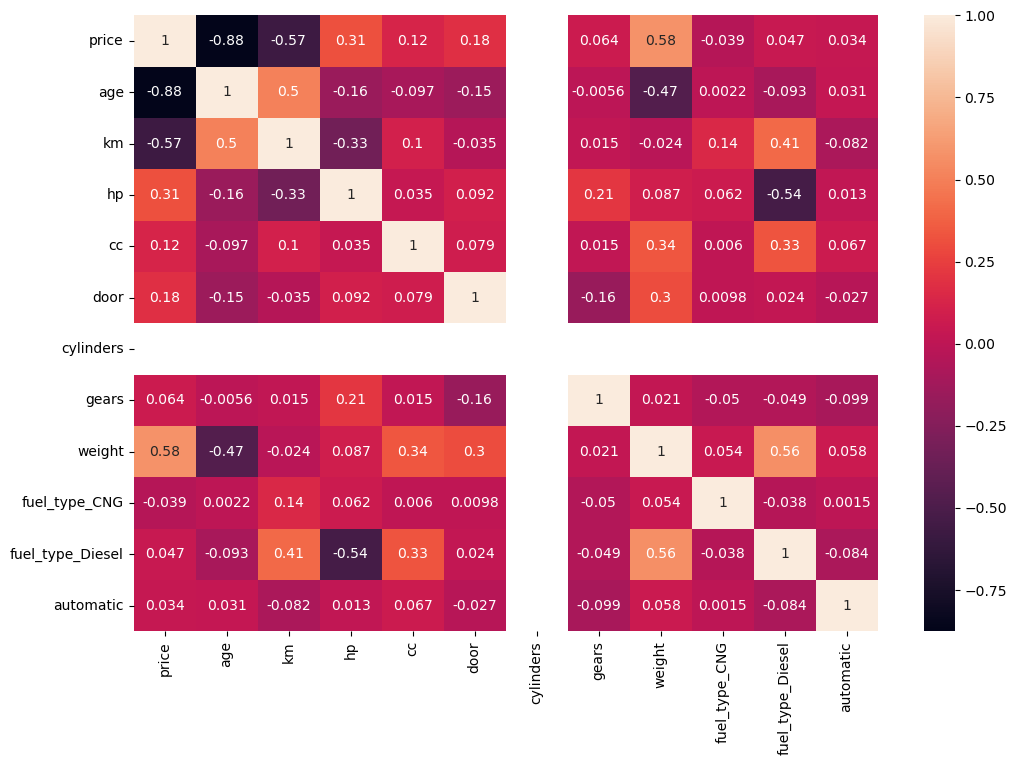

In [108]:
plt.figure(figsize=(12,8))
sns.heatmap(
    data.corr(),
    annot=True)

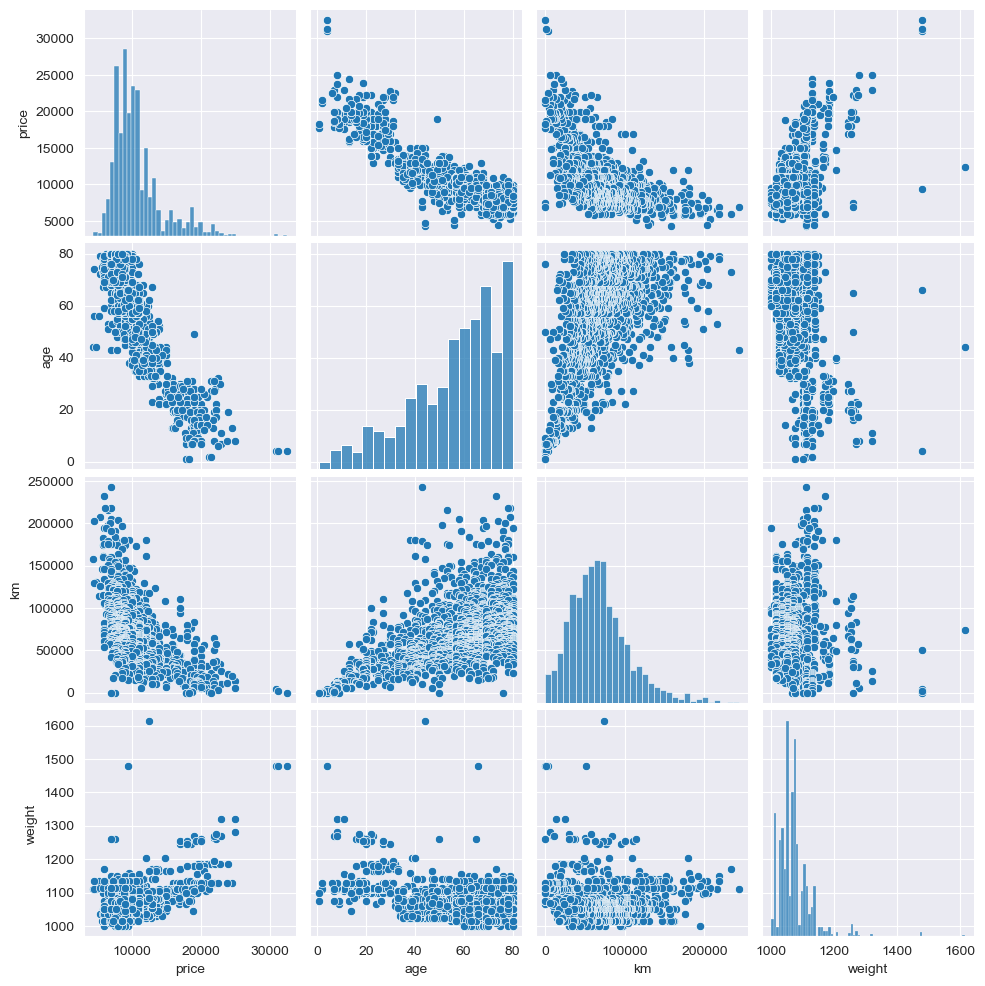

In [109]:
sns.set_style(style='darkgrid')
sns.pairplot(data[continuous_feature])

<Axes: >

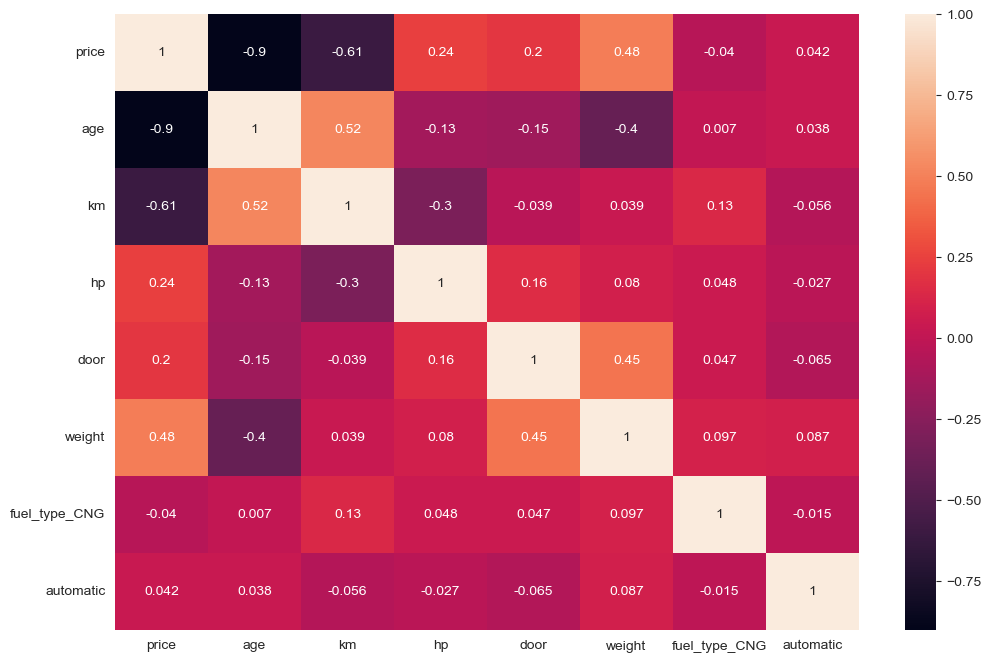

In [110]:
plt.figure(figsize=(12,8))
sns.heatmap(
   z.corr(),
    annot=True)

#### PCA
 - Principal Component Analysis (PCA) was the first dimensionality reduction technique discovered (by Karl Pearson - yes, the guy from Pearson's correlation coefficient) and dates back to as early as 1901. It is very popular because it is fast, easy to implement and easy to interpret.

 - PCA works by finding a low dimensional subspace that maximises the variance of the data in that subspace and performing a linear projection. This basically means the data will be as spread out as possible, without changing the relationship between the data points. This allows us to find patterns or indentify clusters if any exist.

 - Principal Component Analysis
  
    Let's discuss PCA! Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm.

#### PCA Review

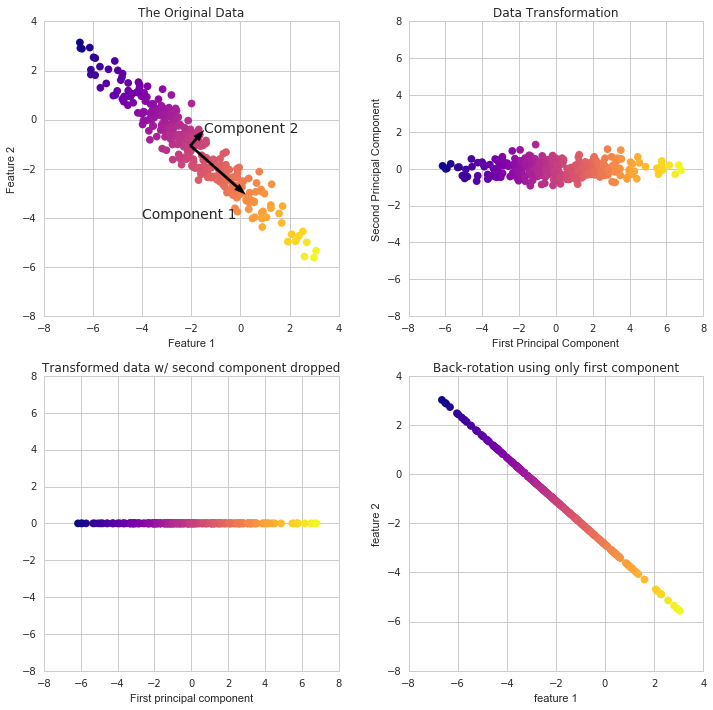

In [111]:
from PIL import Image
Image.open("C:/Users/hp/Desktop/Data science/PCA.png")

#### PCA on Standard Scaled Dataset
 - Explained variance
     - Explained variance shows how much of the variance/spread of the data is captured in each dimension, i.e. how important each additional principal component is to the original data representation.

#### Let's seperate the x and y values

In [112]:
df_standard_scaled.head()

price       age        km        hp        cc      door  cylinders  \
0  0.941075 -2.022055  0.078457 -2.697021  2.190649 -1.064175        0.0   
1  2.690741 -1.964143 -1.320573  0.697639  0.362074 -1.064175        0.0   
2  2.270822 -1.964143 -1.211673  0.697639  0.362074 -1.064175        0.0   
3  2.340808 -1.616670 -0.113442  0.697639  0.362074 -1.064175        0.0   
4  1.990875 -1.616670 -0.019998  0.697639  0.362074 -1.064175        0.0   

      gears    weight  fuel_type_CNG  fuel_type_Diesel  automatic  
0 -0.151433  1.335976      -0.069477          4.013675  -0.212575  
1 -0.151433  1.335976      -0.069477         -0.249148  -0.212575  
2 -0.151433  0.103306      -0.069477         -0.249148  -0.212575  
3 -0.151433  1.335976      -0.069477         -0.249148  -0.212575  
4 -0.151433  1.335976      -0.069477         -0.249148  -0.212575

In [113]:
array = df_standard_scaled.values
x = array[:,1:]
y = array[:,1]

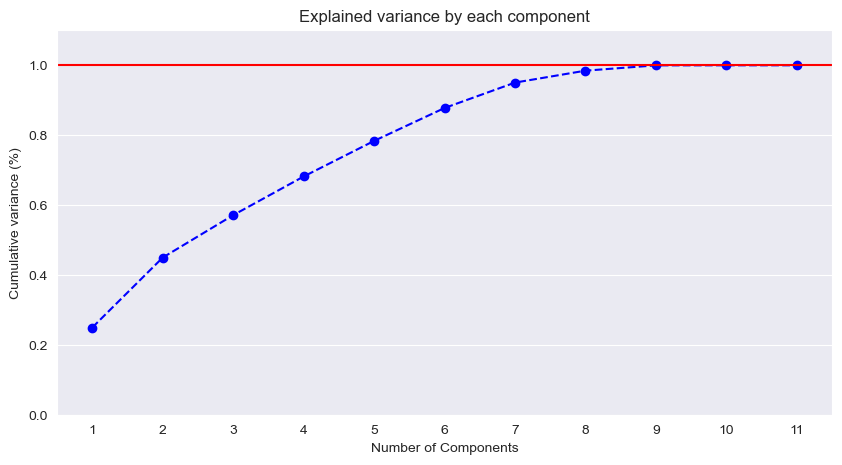

In [114]:
# PCA
pca_var = PCA()
pca_var.fit(x)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+x.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+x.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [115]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var 

array([2.50874427e-01, 1.99863553e-01, 1.21167838e-01, 1.10430116e-01,
       1.01687689e-01, 9.40625596e-02, 7.25776781e-02, 3.40565282e-02,
       1.51225576e-02, 1.57054503e-04, 8.81136767e-36])

Text(0.5, 1.0, 'Explained variance by each component')

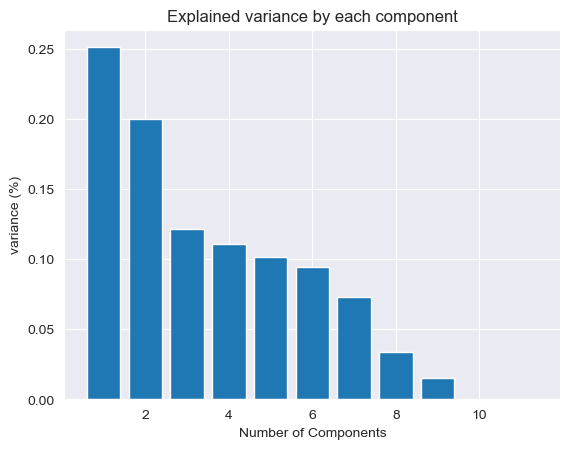

In [116]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [117]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 25.09,  45.08,  57.2 ,  68.24,  78.41,  87.82,  95.08,  98.49,
       100.  , 100.02, 100.02])

In [118]:
# PCA
pca = PCA()
pca_std = pca.fit_transform(x)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(1249, 11)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.400697 -0.158150 -2.743157 -1.743107 -0.539403  1.811131 -0.963152   
1 -0.237802  2.104082 -0.676522 -1.150227 -0.101906  0.870465 -1.326110   
2 -0.741036  1.512133 -0.599849 -1.061973 -0.271605  0.810750 -1.402593   
3  0.217864  1.442706 -0.210362 -0.853344 -0.027431  0.616564 -1.195230   
4  0.251905  1.405243 -0.184215 -0.835631 -0.024628  0.607025 -1.187357   

        PC8       PC9      PC10          PC11  
0 -0.286970  0.848338  0.110651 -1.280023e-17  
1  0.300437 -0.622575 -0.054335 -2.130043e-18  
2  0.315754  0.313138 -0.050760 -6.597596e-18  
3  1.028179 -0.725562 -0.047242 -3.322774e-18  
4  1.098962 -0.724507 -0.047272 -1.652785e-17

In [119]:
dataframe.price

0       12950
1       17950
2       16750
3       16950
4       15950
        ...  
1244     8950
1245     8450
1246     7500
1247     8500
1248     7250
Name: price, Length: 1249, dtype: int32

In [120]:
pca_std_df['price'] = y
pca_std_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.400697 -0.158150 -2.743157 -1.743107 -0.539403  1.811131 -0.963152   
1 -0.237802  2.104082 -0.676522 -1.150227 -0.101906  0.870465 -1.326110   
2 -0.741036  1.512133 -0.599849 -1.061973 -0.271605  0.810750 -1.402593   
3  0.217864  1.442706 -0.210362 -0.853344 -0.027431  0.616564 -1.195230   
4  0.251905  1.405243 -0.184215 -0.835631 -0.024628  0.607025 -1.187357   

        PC8       PC9      PC10          PC11     price  
0 -0.286970  0.848338  0.110651 -1.280023e-17 -2.022055  
1  0.300437 -0.622575 -0.054335 -2.130043e-18 -1.964143  
2  0.315754  0.313138 -0.050760 -6.597596e-18 -1.964143  
3  1.028179 -0.725562 -0.047242 -3.322774e-18 -1.616670  
4  1.098962 -0.724507 -0.047272 -1.652785e-17 -1.616670

In [121]:
import statsmodels.formula.api as sm
pca_model= sm.ols('price~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+PC11', data= pca_std_df).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.481e+31
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:13:39   Log-Likelihood:                 40963.
No. Observations:                1249   AIC:                        -8.190e+04
Df Residuals:                    1238   BIC:                        -8.185e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.01e-16   3.93e-17      2.572      0.010     2.4e-17    1.78e-16
PC1            0.0458   2.48e-17   1.85e+15      0.000       0.046       0.046
PC2           -0.5106   2.78e-17  -1.84e+16      0.000      -0.511      -0.511
PC3            0.3695   3.57e-17   1.04e+16      0.000       0.369       0.369
PC4            0.1959   3.74e-17   5.24e+15      0.000       0.196       0.196
PC5            0.1101    3.9e-17   2.83e+15      0.000       0.110       0.110
PC6           -0.3761   4.05e-17  -9.29e+15      0.000      -0.376      -0.376
PC7            0.0840   4.61e-17   1.82e+15      0.000       0.084       0.084
PC8           -0.5372   6.73e-17  -7.98e+15      0.000      -0.537      -0.537
PC9           -0.3356   1.01e-16  -3.32e+15      0.000      -0.336      -0.336
PC10           0.0215   9.91e-16   2.17e+13      0.000       0.022       0.022
PC11        5.608e-17   2.37e-32   2.36e+15      0.000    5.61e-17    5.61e-17
==============================================================================
Omnibus:                      908.904   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15657.337
Skew:                           3.235   Prob(JB):                         0.00
Kurtosis:                      19.094   Cond. No.                     1.69e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [122]:
transformer_y = StandardScaler().fit(dataframe['price'].to_numpy().reshape(-1,1))
# Scale the test dataset
y_train_scal = transformer_y.transform(dataframe['price'].to_numpy().reshape(-1,1))

# Predict with the trained model
predict = pd.DataFrame(pca_model.predict(pca_std_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(dataframe.price, predict_unscaled)))
print('R2_score : ', pca_model.rsquared)
print('R2_Adjusted_score : ', pca_model.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  1.0
R2_Adjusted_score :  1.0
RMSE :  5570.95578707657


In [123]:
pca_std_df['price'] = dataframe['price']
pca_std_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.400697 -0.158150 -2.743157 -1.743107 -0.539403  1.811131 -0.963152   
1 -0.237802  2.104082 -0.676522 -1.150227 -0.101906  0.870465 -1.326110   
2 -0.741036  1.512133 -0.599849 -1.061973 -0.271605  0.810750 -1.402593   
3  0.217864  1.442706 -0.210362 -0.853344 -0.027431  0.616564 -1.195230   
4  0.251905  1.405243 -0.184215 -0.835631 -0.024628  0.607025 -1.187357   

        PC8       PC9      PC10          PC11  price  
0 -0.286970  0.848338  0.110651 -1.280023e-17  12950  
1  0.300437 -0.622575 -0.054335 -2.130043e-18  17950  
2  0.315754  0.313138 -0.050760 -6.597596e-18  16750  
3  1.028179 -0.725562 -0.047242 -3.322774e-18  16950  
4  1.098962 -0.724507 -0.047272 -1.652785e-17  15950

In [124]:
x_train, x_test, y_train, y_test = train_test_split(pca_std_df.iloc[:,:-1], pca_std_df.iloc[:,-1],test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

((874, 11), (375, 11), (874,), (375,))

In [125]:
from sklearn.preprocessing import StandardScaler

#Scaling 
transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1)) 
y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train_scal)

LinearRegression()

In [126]:
# Predict with the trained model
prediction = regressor_linear.predict(x_test)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.9021867870084315
R2_score (train):  0.905039684058631
R2_score (test):  0.8868641203473931
RMSE using all features:  925.9065960962488


### Forward Selection
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

The procedure starts with an empty set of features [reduced set]. The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the set.

Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. In the second step, it evaluates all possible combinations of the selected feature and a second feature, and selects the pair that produce the best performing algorithm based on the same pre-set criteria.

The pre-set criteria can be the roc_auc for classification and the r squared for regression for example.

This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations. Therefore, it is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the step forward feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features.

I will demonstrate the Step Forward feature selection algorithm from mlxtend using the House Price dataset.

In [127]:
X = dataframe.drop('price', axis =1)
Y = dataframe[['price']]

In [128]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [129]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) < threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, -0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [130]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

((874, 11), (375, 11), (874, 1), (375, 1))

In [131]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(x_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.7s finished

[2024-06-10 11:13:45] Features: 1/4 -- score: 0.8328589477041533[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.2s finished

[2024-06-10 11:13:51] Features: 2/4 -- score: 0.8562576533657422[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.8s finished

[2024-06-10 11:14:00] Features: 3/4 -- score: 0.8912626402701688[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [132]:
sfs1.k_feature_idx_

(0, 1, 2, 7)

In [133]:
x_train.columns[list(sfs1.k_feature_idx_)]

Index(['age', 'km', 'hp', 'weight'], dtype='object')

### Observation: For the above case we can say these 4 features are enough to get a higher R-squared value
Regularization 
You have your model ready, you have predicted your output. So why do you need to study regularization? Is it necessary?

Suppose you have taken part in a competition, and in that problem you need to predict a continuous variable. So you applied linear regression and predicted your output. Voila! You are on the leaderboard. But wait what you see is still there are many people above you on the leaderboard. But you did everything right then how is it possible?

“Everything should be made simple as possible, but not simpler – Albert Einstein”

What we did was simpler, everybody else did that, now let us look at making it simple. That is why, we will try to optimize our code with the help of regularization.

In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j. How does reducing the coefficients will help us?

Let us take a look at the coefficients of feature in our above regression model.### 

In [134]:
# checking the magnitude of coefficients
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = 'price ~ age + km + hp + cc + door + cylinders + gears + weight + fuel_type_CNG + fuel_type_Diesel + automatic'
reg_results = sm.ols(f, data=dataframe).fit()

err_series = reg_results.params - reg_results.conf_int()[0]
err_series

coef_df = pd.DataFrame({'coef': reg_results.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
print(coef_df)

            coef          err           varname
0    -113.525397     4.449257               age
1      -0.014850     0.001980                km
2    -237.941853    53.759209                hp
3      16.758943     4.128892                cc
4    -209.045643    66.266989              door
5   -4533.843152   756.177145         cylinders
6     -45.996695   350.624060             gears
7      35.426852     3.105415            weight
8   -1972.141033   749.853908     fuel_type_CNG
9  -17997.902601  3649.695976  fuel_type_Diesel
10   -217.762214   269.872117         automatic


<Axes: title={'center': 'Modal Coefficients'}, xlabel='varname'>

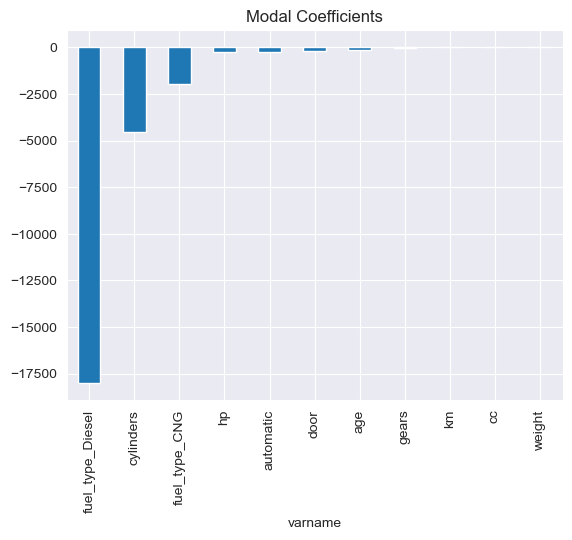

In [135]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

#### We can see that coefficients of Gears(last 1) is much higher as compared to rest of the coefficients. Therefore the total Price would be more driven by this feature.

How can we reduce the magnitude of coefficients in our model? For this purpose, we have different types of regression techniques which uses regularization to overcome this problem. So let us discuss them.

Ridge Regression 
Let us first implement it on our above problem and check our results that whether it performs better than our linear regression model

In [136]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05)
ridgeReg.fit(x_train, y_train)


Ridge(alpha=0.05)

In [137]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridgeReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_ridge_train = ridgeReg.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridgeReg.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.9019292783779891
R2_score (train):  0.9047080779448693
R2_score (test):  0.8852193098464377
RMSE:  932.6128925639331


In [138]:
ridgeReg.coef_.flatten()

array([-1.11800383e+02, -1.48268552e-02, -1.51319458e+02,  1.02465909e+01,
       -2.05586441e+02,  0.00000000e+00,  1.57448460e+01,  3.62189375e+01,
       -1.88691854e+03, -1.23300046e+04, -1.00914198e+02])

In [139]:
coef_df = pd.DataFrame({'coef': ridgeReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

            coef           varname
0    -111.800383               age
1      -0.014827                km
2    -151.319458                hp
3      10.246591                cc
4    -205.586441              door
5       0.000000         cylinders
6      15.744846             gears
7      36.218937            weight
8   -1886.918538     fuel_type_CNG
9  -12330.004632  fuel_type_Diesel
10   -100.914198         automatic


<Axes: title={'center': 'alpha = 0.01'}, xlabel='varname'>

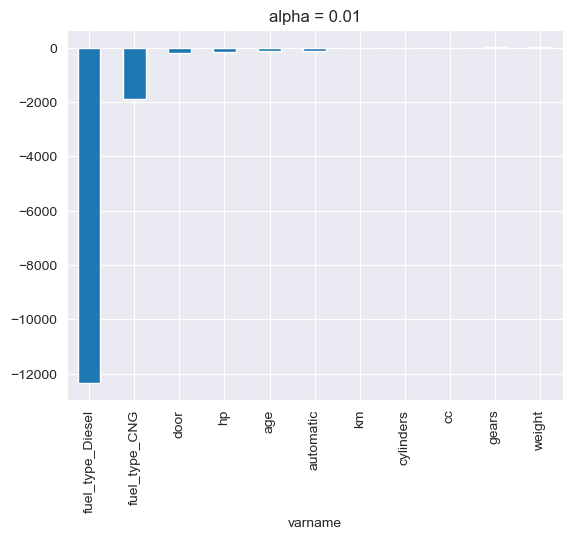

In [140]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.01')

<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

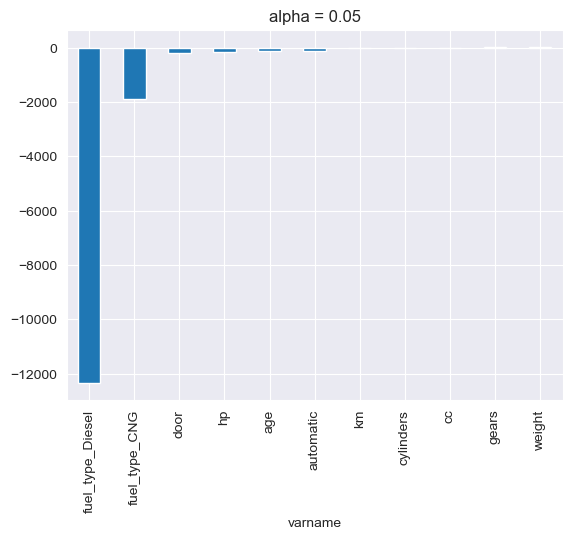

In [141]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

<Axes: title={'center': 'alpha = 0.5'}, xlabel='varname'>

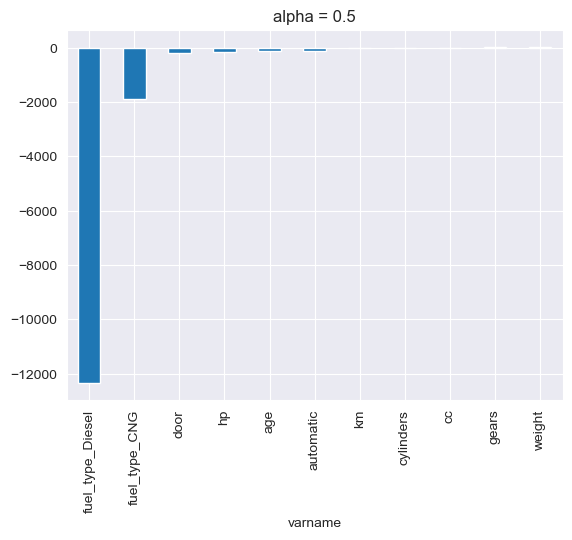

In [142]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')

<Axes: title={'center': 'alpha = 5'}, xlabel='varname'>

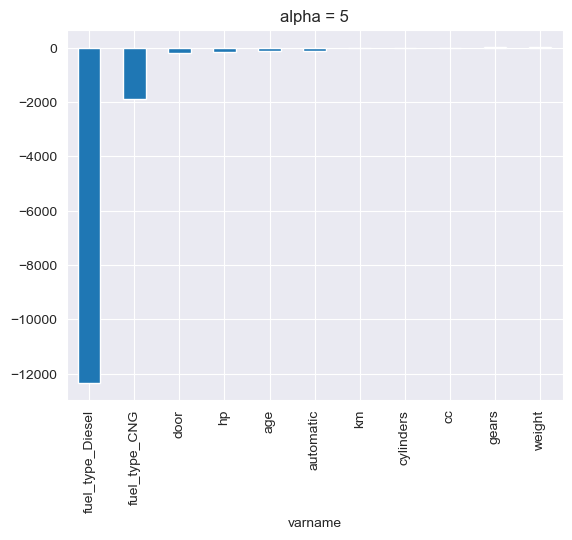

In [143]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 5')

<Axes: title={'center': 'alpha = 10'}, xlabel='varname'>

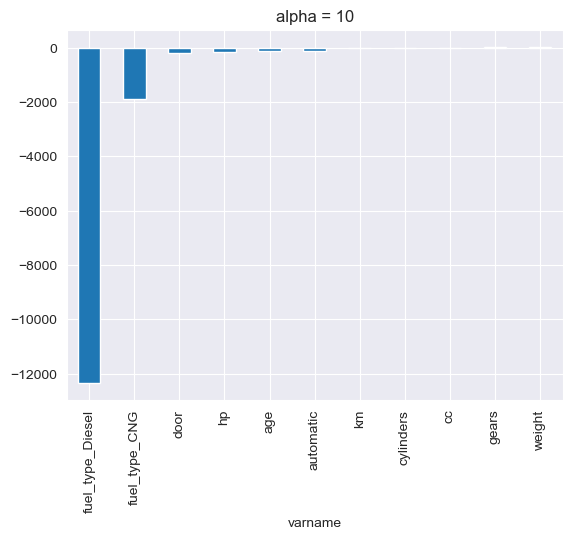

In [144]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 10')

#### You can see that, as we increase the value of alpha, the magnitude of the coefficients decreases.

But if you calculate R-square for each alpha, we will see that the value of R-square will be maximum at alpha=0.05. So we have to choose it wisely by iterating it through a range of values and using the one which gives us lowest error.

In [145]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.5, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.5))])

In [146]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator=ridge_pipe, X=x_train, y=y_train.values.ravel(), cv=10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(x_train)
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)

In [147]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge

# Assuming you have already defined your training data x_train and y_train
# x_train = ...
# y_train = ...

# Define and train your Ridge model
ridge_model = Ridge(alpha=0.05)
ridge_model.fit(x_train, y_train)

# Now you can use SelectFromModel with your trained Ridge model
sel_ridge = SelectFromModel(ridge_model)
sel_ridge.fit(x_train, y_train)

# Get the indices of the selected features
selected_features_indices = sel_ridge.get_support()

# Use the indices to get the names of the selected features
selected_features = x_train.columns[selected_features_indices]

# Print or use the selected features
print("Selected features:", selected_features)


Selected features: Index(['fuel_type_CNG', 'fuel_type_Diesel'], dtype='object')


#### Important Points:
It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.

It reduces the model complexity by coefficient shrinkage.

It uses L2 regularization technique. (which I will discussed later)

Now let us consider another type of regression technique which also makes use of regularization

LASSO Regression
Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.

Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularisation, Lasso or l1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

I will demonstrate how to select features using the Lasso regularisation on the House Price dataset from Kaggle.#### 

In [148]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.5)
lassoReg.fit(x_train, y_train)
pred = lassoReg.predict(x_test)


In [149]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = lassoReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lasso_train = lassoReg.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lassoReg.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_ridge)

CV:  0.9020418263725846
R2_score (train):  0.9048026194495878
R2_score (test):  0.8855360155572257
RMSE:  931.325359556432


#### Again lets change the value of alpha and see how does it affect the coefficients.

In [150]:
coef_df = pd.DataFrame({'coef': lassoReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

            coef           varname
0    -112.106913               age
1      -0.014836                km
2    -161.149231                hp
3      11.010373                cc
4    -205.234698              door
5       0.000000         cylinders
6       0.000000             gears
7      36.162201            weight
8   -1800.232399     fuel_type_CNG
9  -12997.090908  fuel_type_Diesel
10    -99.096619         automatic


<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

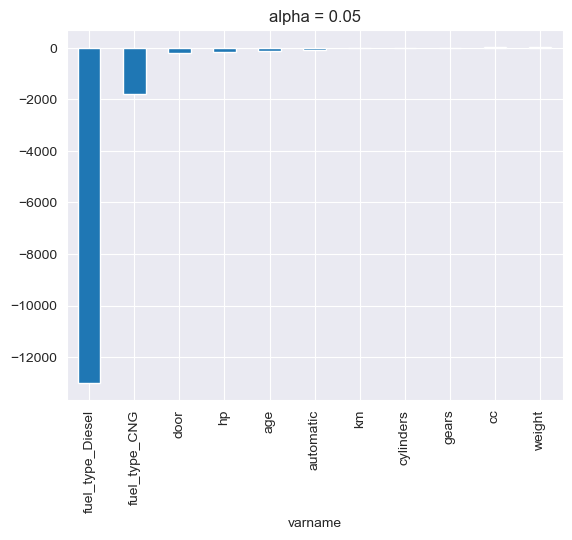

In [151]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

<Axes: title={'center': 'alpha = 0.5'}, xlabel='varname'>

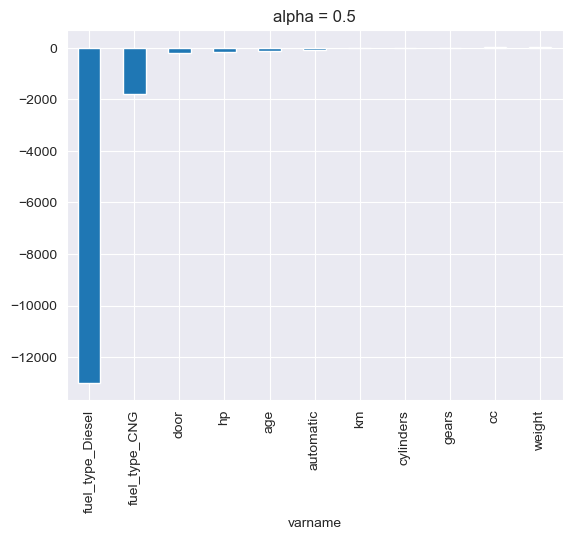

In [152]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')

#### So, we can see that even at small values of alpha, the magnitude of coefficients have reduced a lot. By looking at the plots, can you figure a difference between ridge and lasso?

We can see that as we increased the value of alpha, coefficients were approaching towards zero, but if you see in case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes. Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

In [153]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.5, fit_intercept=True, tol = 0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.5, max_iter=2000, tol=0.0199))])

In [154]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.9079301959890008
R2_score (train):  0.9173177353501336
R2_score (test):  0.8795375804061448
RMSE:  955.416616217915


In [155]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [156]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

sel_lasso = SelectFromModel(Lasso(alpha=100))
sel_lasso.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [157]:
sel_lasso.get_support()

array([ True,  True,  True,  True,  True, False, False,  True, False,
       False, False])

In [158]:
# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_lasso.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_lasso.estimator_.coef_ == 0)))

total features: 11
selected features: 6
features with coefficients shrank to zero: 5


#### Let's compare the residuals of all the models to come up with an conclusion
Model Validation
Comparing different models with respect to their Root Mean Squared Errors
We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value

In [159]:
dataframe.columns

Index(['price', 'age', 'km', 'hp', 'cc', 'door', 'cylinders', 'gears',
       'weight', 'fuel_type_CNG', 'fuel_type_Diesel', 'automatic'],
      dtype='object')

In [160]:
x = dataframe[['age', 'km', 'hp', 'cc', 'door', 'cylinders', 'gears',
       'weight', 'fuel_type_CNG', 'fuel_type_Diesel', 'automatic']]
y = dataframe[['price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['age', 'km', 'hp', 'cc', 'door', 'cylinders', 'gears',
       'weight', 'fuel_type_CNG', 'fuel_type_Diesel', 'automatic'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(model1.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(y, predict_unscaled)))
print('R2_score : ', model1.rsquared)
print('R2_Adjusted_score : ', model1.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  0.8800586913287531
R2_Adjusted_score :  0.8793821488946687
RMSE :  989.6901748421815


In [161]:
square_root_pred_y =np.square(square_root_transformed_model.predict(df_sqrt_scaled[['age', 'km', 'hp', 'cc', 'door', 'cylinders', 'gears',
       'weight', 'fuel_type_CNG', 'fuel_type_Diesel', 'automatic']]))
cube_root_pred_y =pow(cube_root_transformed_model.predict(df_cbrt_scaled[['age', 'km', 'hp', 'cc', 'door', 'cylinders', 'gears',
       'weight', 'fuel_type_CNG', 'fuel_type_Diesel', 'automatic']]),3)
log_model_pred_y =np.exp(log_transformed_model.predict(df_log_scaled[['age', 'km', 'hp', 'cc', 'door', 'cylinders', 'gears',
       'weight', 'fuel_type_CNG', 'fuel_type_Diesel', 'automatic']]))

In [162]:
square_root_both_rmse =np.sqrt(mean_squared_error(dataframe['price'], square_root_pred_y))
cube_root_both_rmse =np.sqrt(mean_squared_error(dataframe['price'], cube_root_pred_y))
log_both_rmse =np.sqrt(mean_squared_error(dataframe['price'], log_model_pred_y))

In [163]:
print('Raw Model=', np.sqrt(raw_data_model.mse_resid),
      '\n''After Removing Influencers=', np.sqrt(final_model.mse_resid),
      '\n''After Log Transformation on both Model=', log_both_rmse,
      '\n''After Cube-root Transformation on both Model=', cube_root_both_rmse,
     '\n''After Sqaure Root Transformation on both Model=', square_root_both_rmse,
      '\n''After Removing Influencers from model', np.sqrt(final_model.mse_resid),
     '\n''Final Model without Multicollinearity Model=', rmse_linear)

Raw Model= 905.156555179319 
After Removing Influencers= 905.1035884700543 
After Log Transformation on both Model= 1724.4466159731292 
After Cube-root Transformation on both Model= 1127.049179857436 
After Sqaure Root Transformation on both Model= 968.079493847933 
After Removing Influencers from model 905.1035884700543 
Final Model without Multicollinearity Model= 989.6901748421815


#### Let's compare the Root Mean Squared Error and check for the minimum value 

In [164]:
rmse_compare = {'Raw Model': np.sqrt(raw_data_model.mse_resid),
      'After Removing Influencers': np.sqrt(final_model.mse_resid),
      'After Log Transformation Model': log_both_rmse,
      'After Cube-root Transformation Model': cube_root_both_rmse,
     'After Sqaure Root Transformation Model': square_root_both_rmse,
                'After Removing Influencers from model': np.sqrt(final_model.mse_resid),
   'Final Model without Multicollinearity Model': rmse_linear}
min(rmse_compare, key=rmse_compare.get)

'After Removing Influencers'

#### ^Observation: The Model that was build without Multicollinearity Issue and using Standard Scaler Transformation performed very well.
+ Scoring minimumn Root mean squared error and a good R-squared and adjusted R-squared
+ <b> Note: We are going to rebuild the model by using that model

In [165]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'Price' is the correct name of the dependent variable in your dataset 'data'
# Fit OLS model
Final_model = smf.ols("price~age+km+hp+cc+door+cylinders+weight+fuel_type_CNG+fuel_type_Diesel+automatic", data=data).fit()

# Summary of the model
print(Final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     995.7
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:14:16   Log-Likelihood:                -12365.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1425   BIC:                         2.480e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -336.8120     68.675  

#### ^Observation: Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
Residual Plot for Homoscedasticity

In [166]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

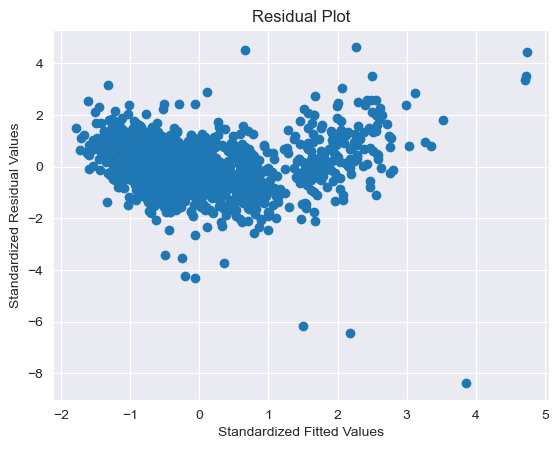

In [167]:
plt.scatter(get_standardized_values(Final_model.fittedvalues), get_standardized_values(Final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

#### ^Observation: Constant Variance (Homoscedasticity) in Error
Residual VS Regressors
Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors

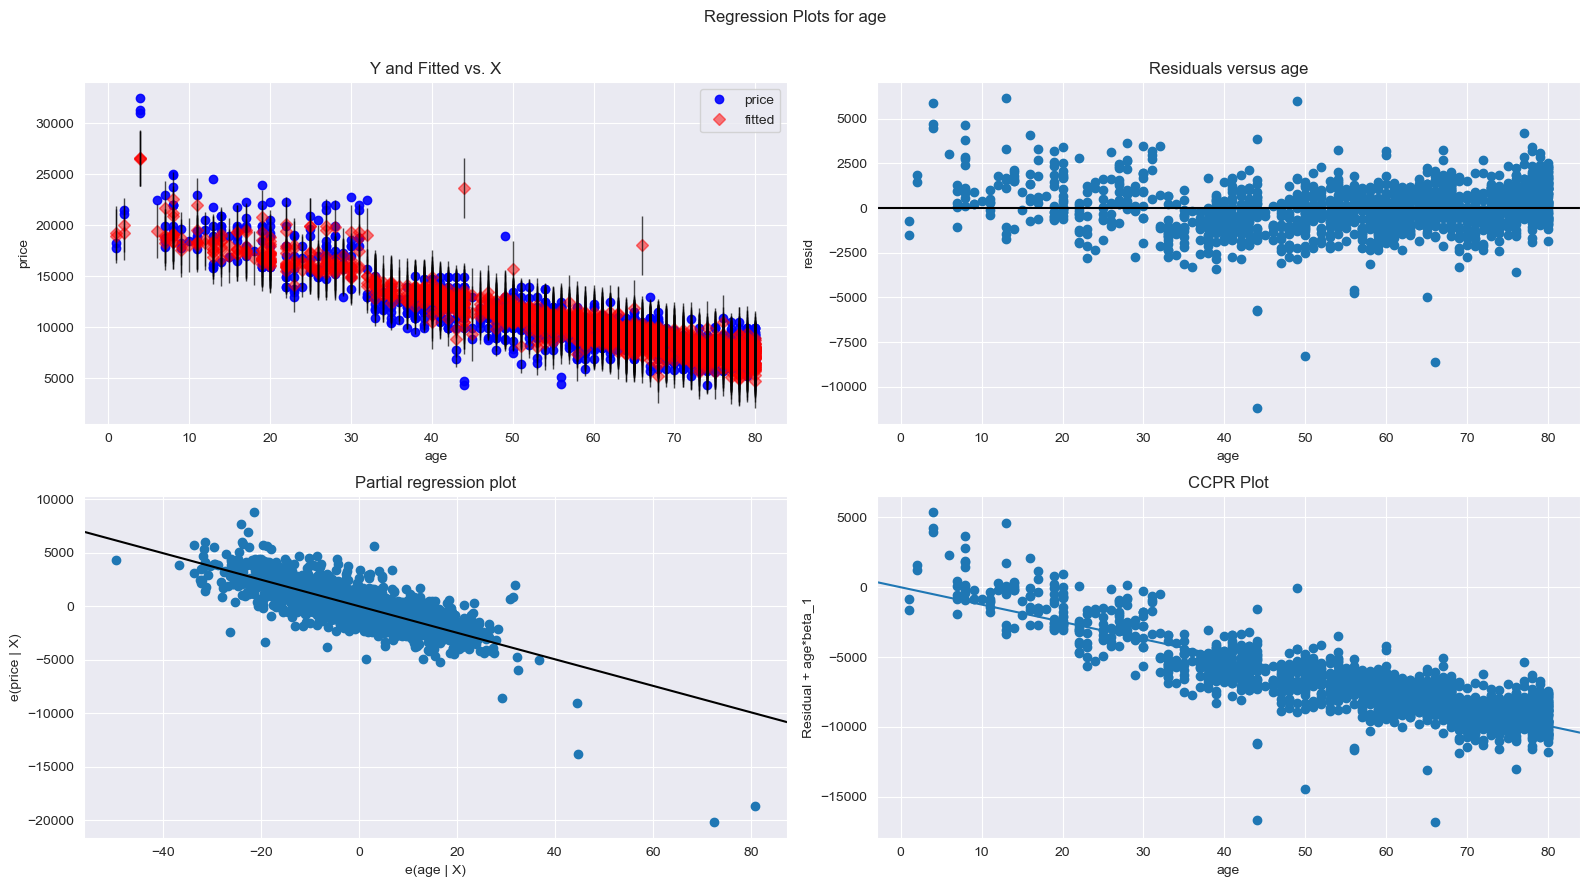

In [168]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'age', fig=fig)
plt.show()

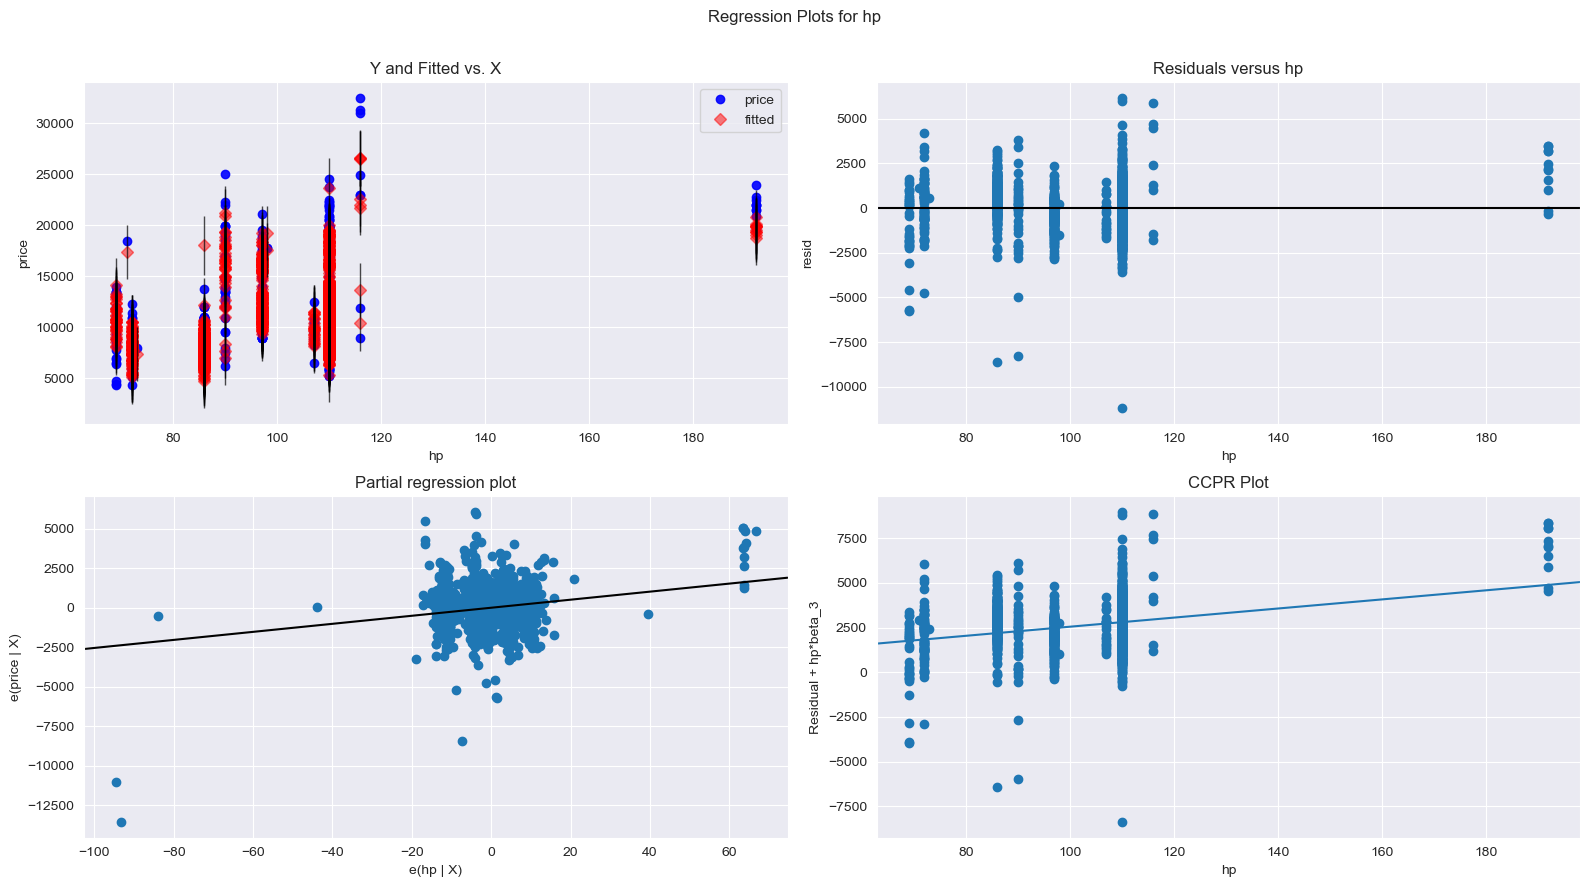

In [169]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'hp', fig=fig)
plt.show()

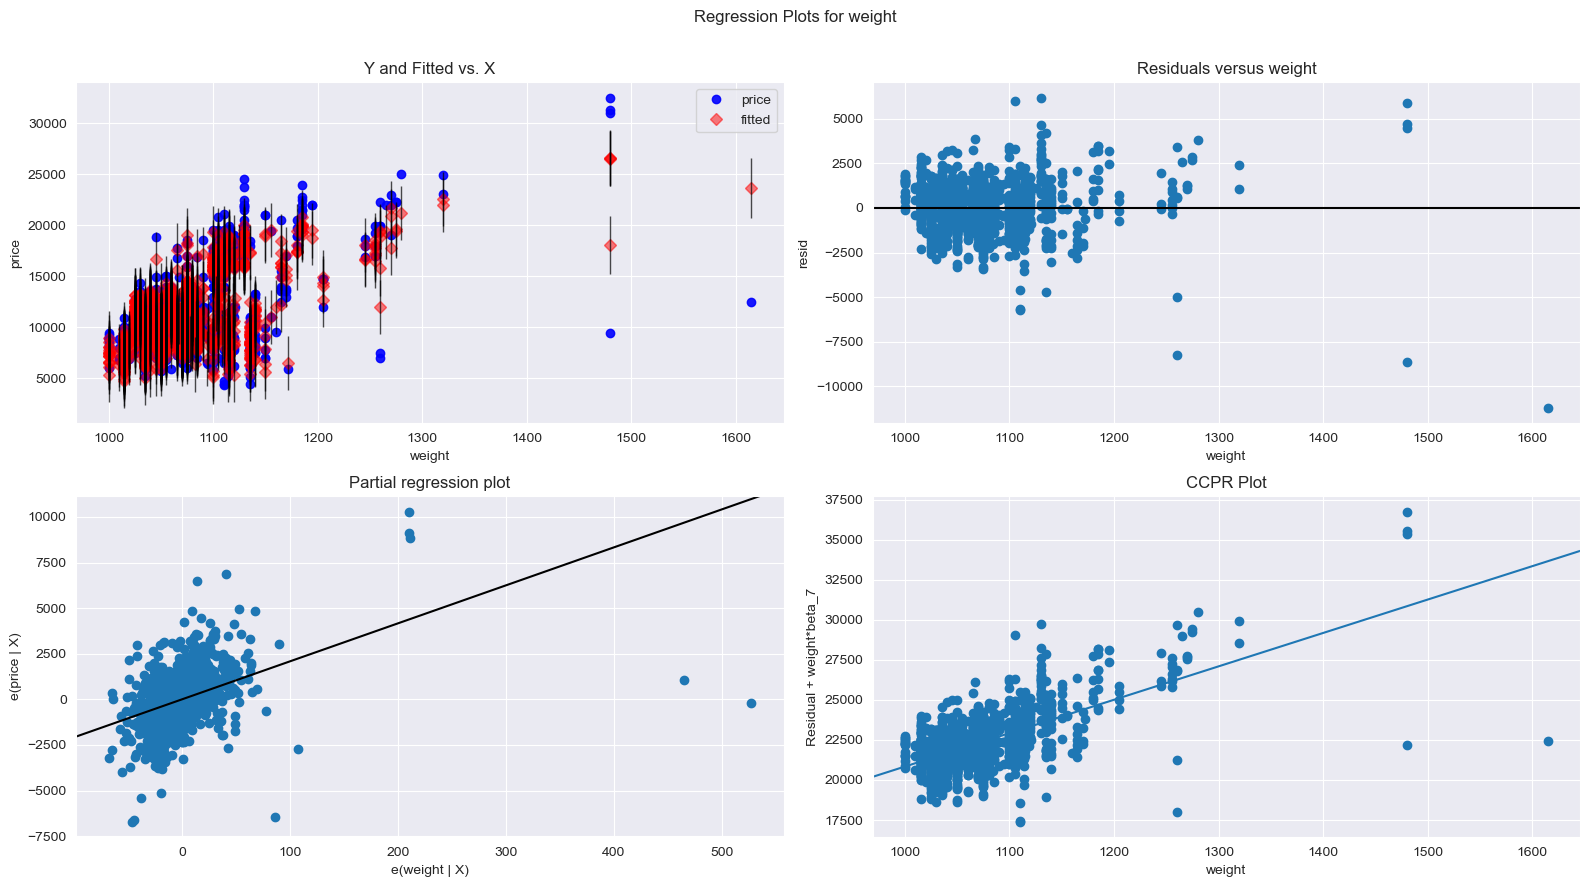

In [170]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'weight', fig=fig)
plt.show()

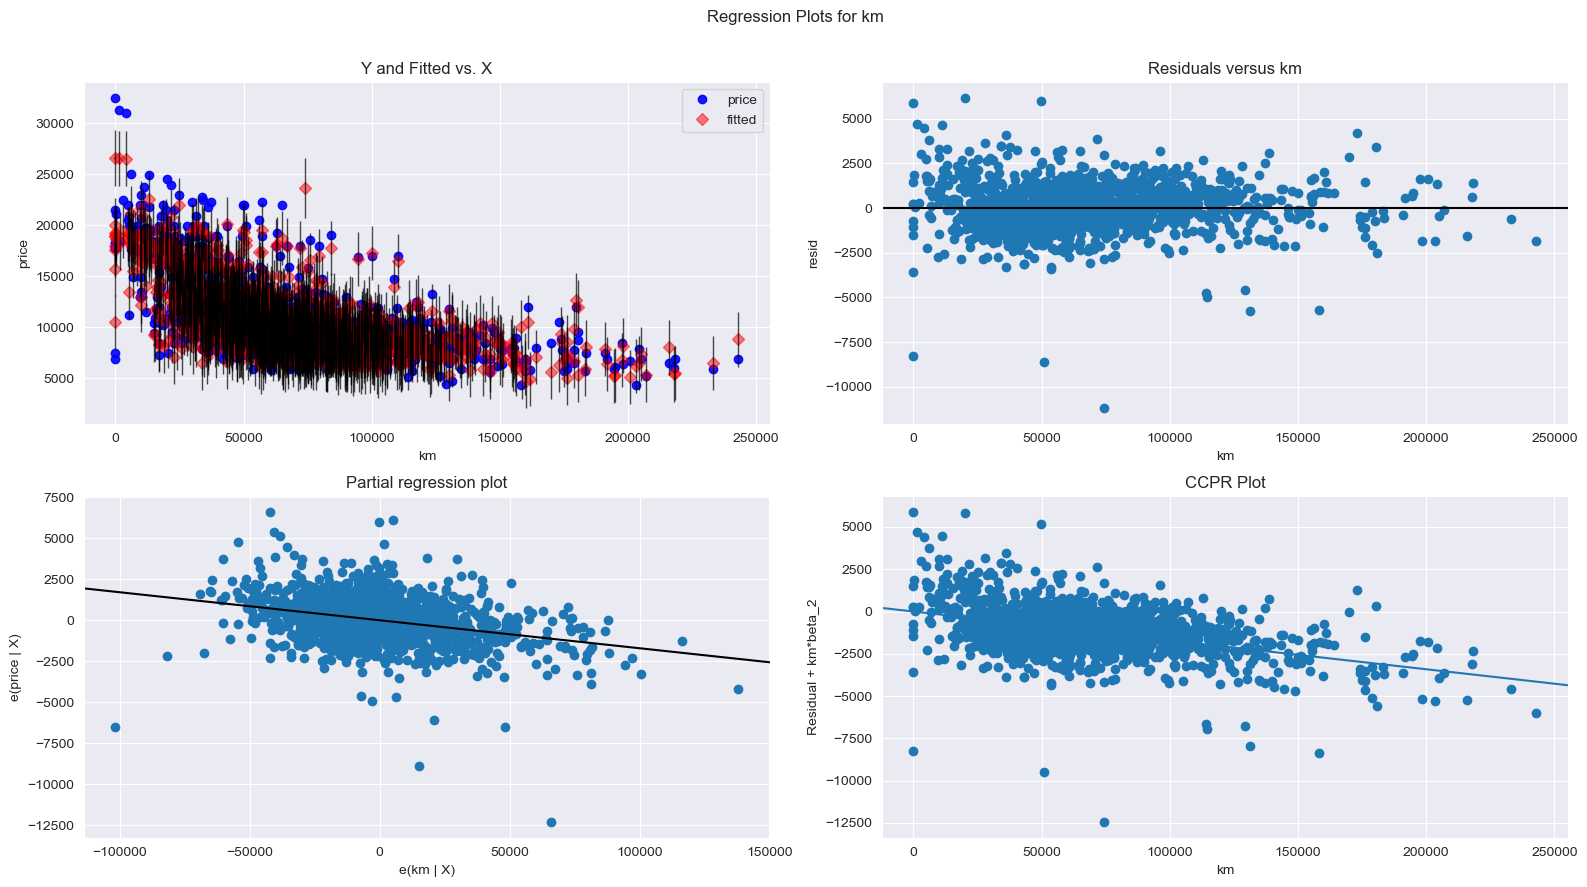

In [171]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'km', fig=fig)
plt.show()

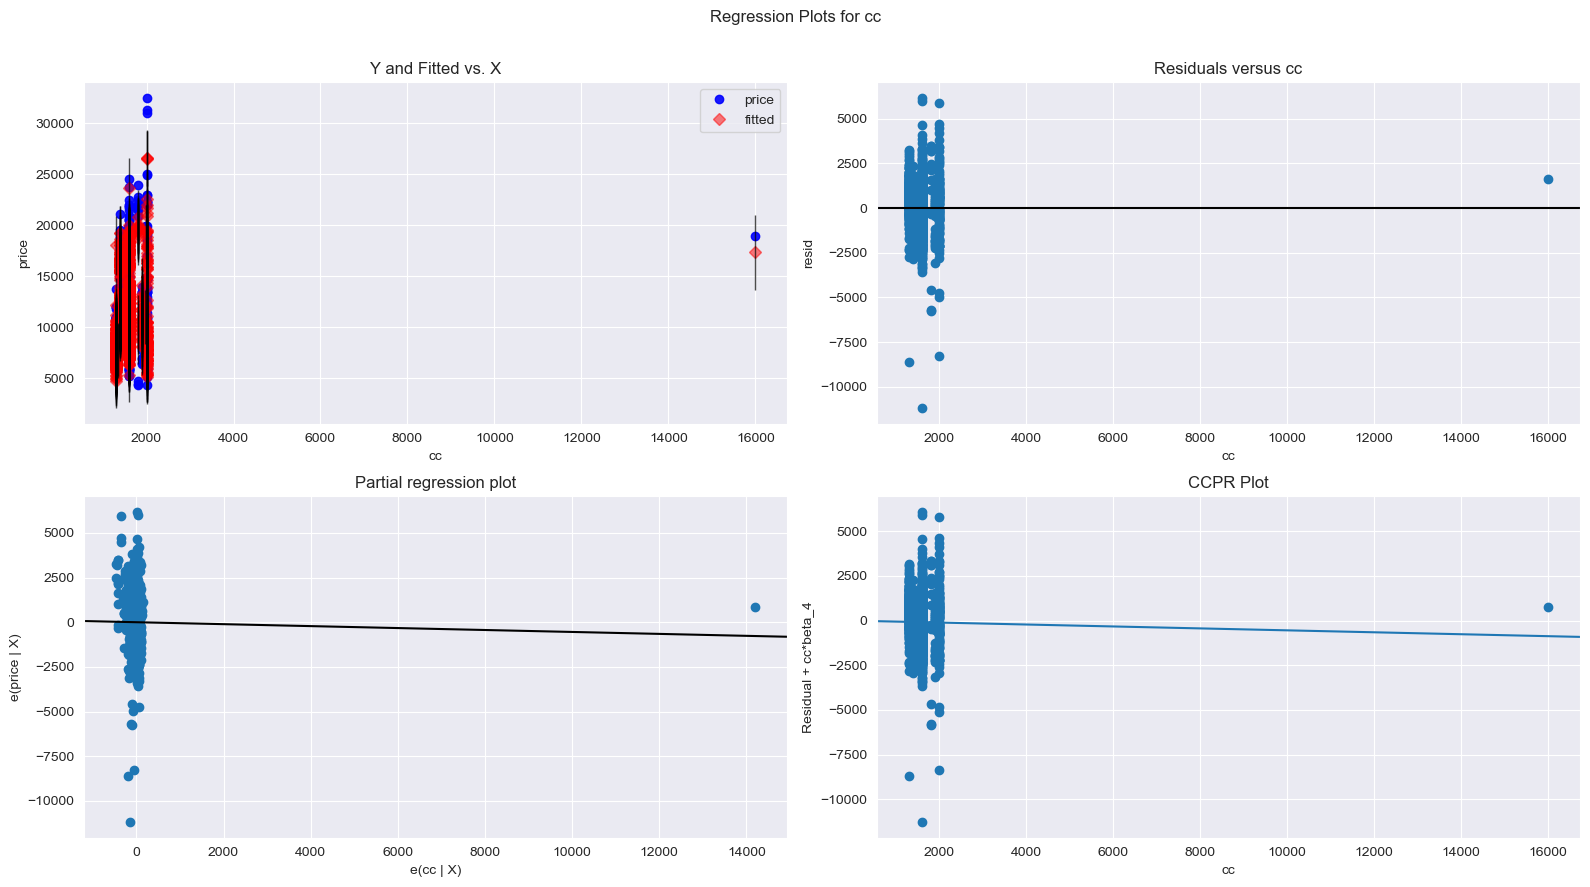

In [172]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'cc', fig=fig)
plt.show()

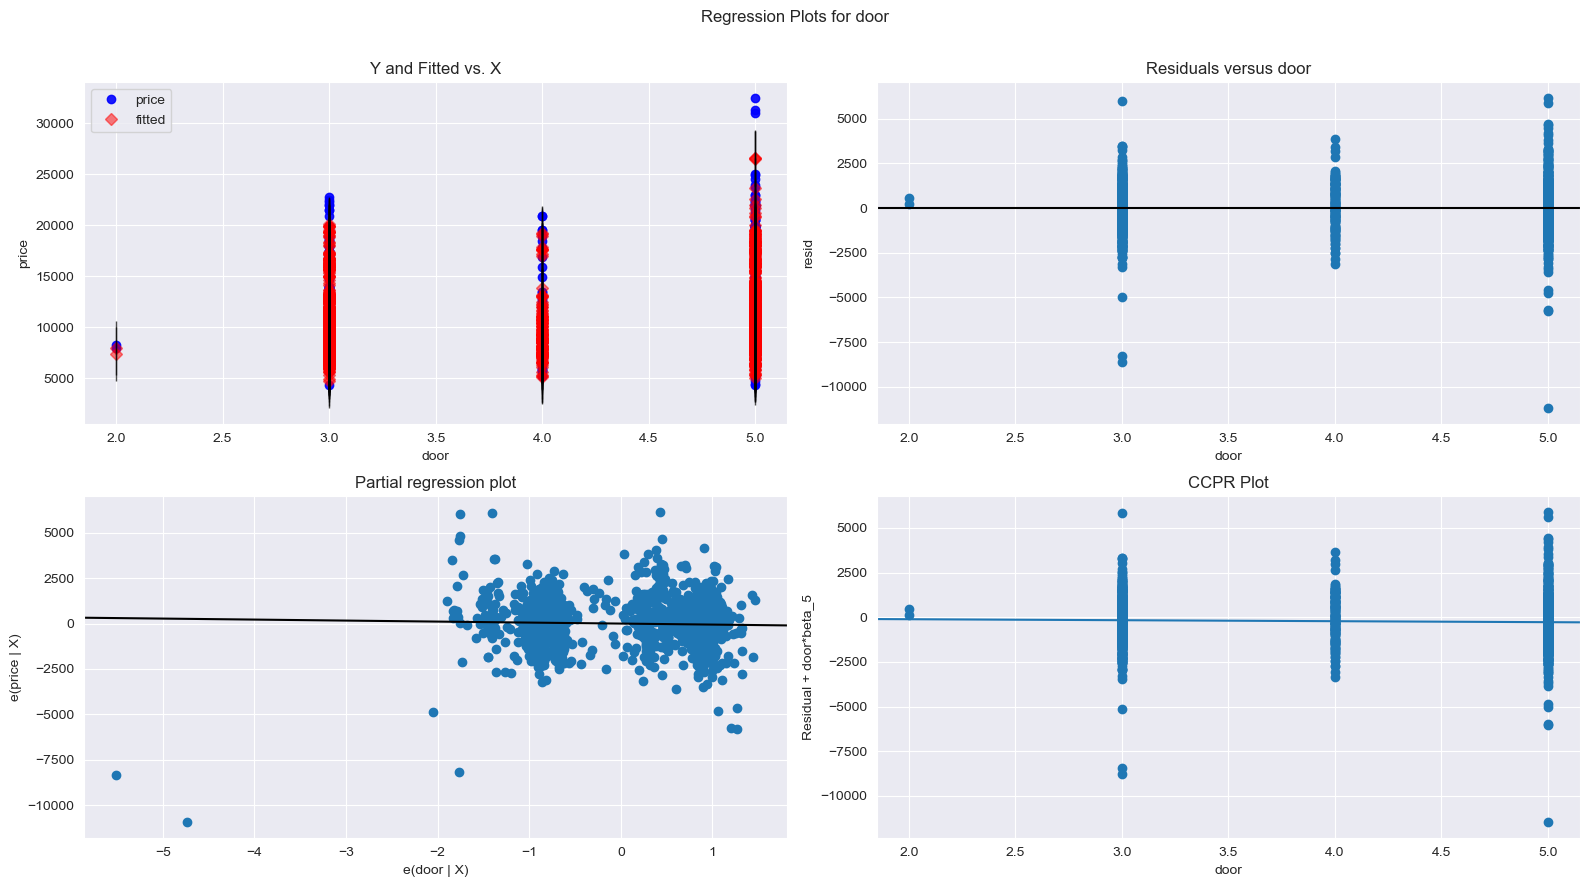

In [173]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'door', fig=fig)
plt.show()

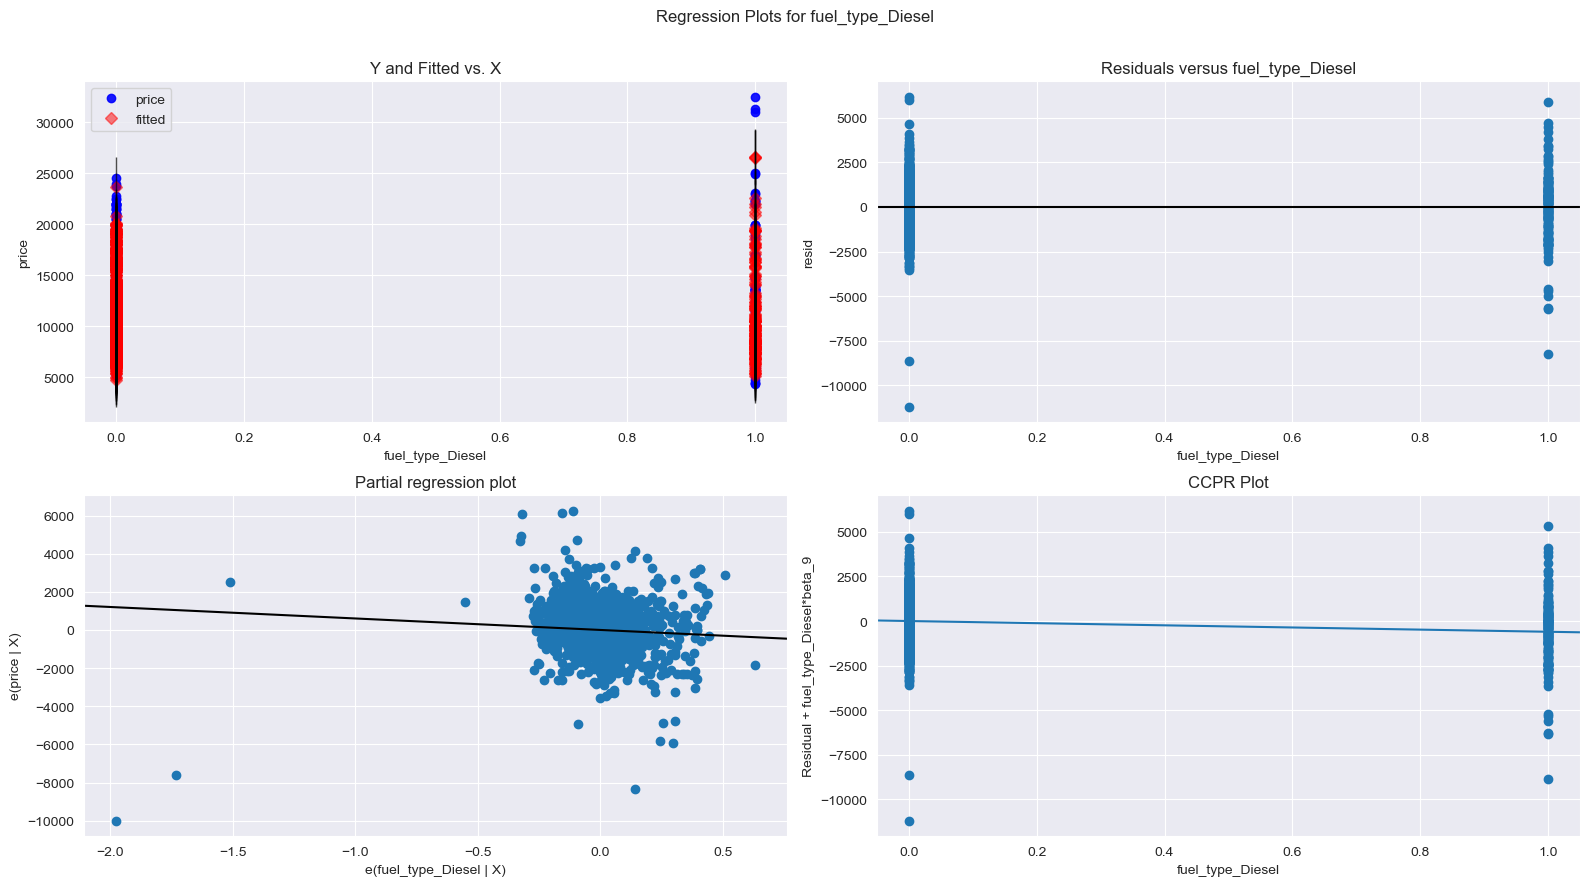

In [174]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, "fuel_type_Diesel", fig=fig)
plt.show()

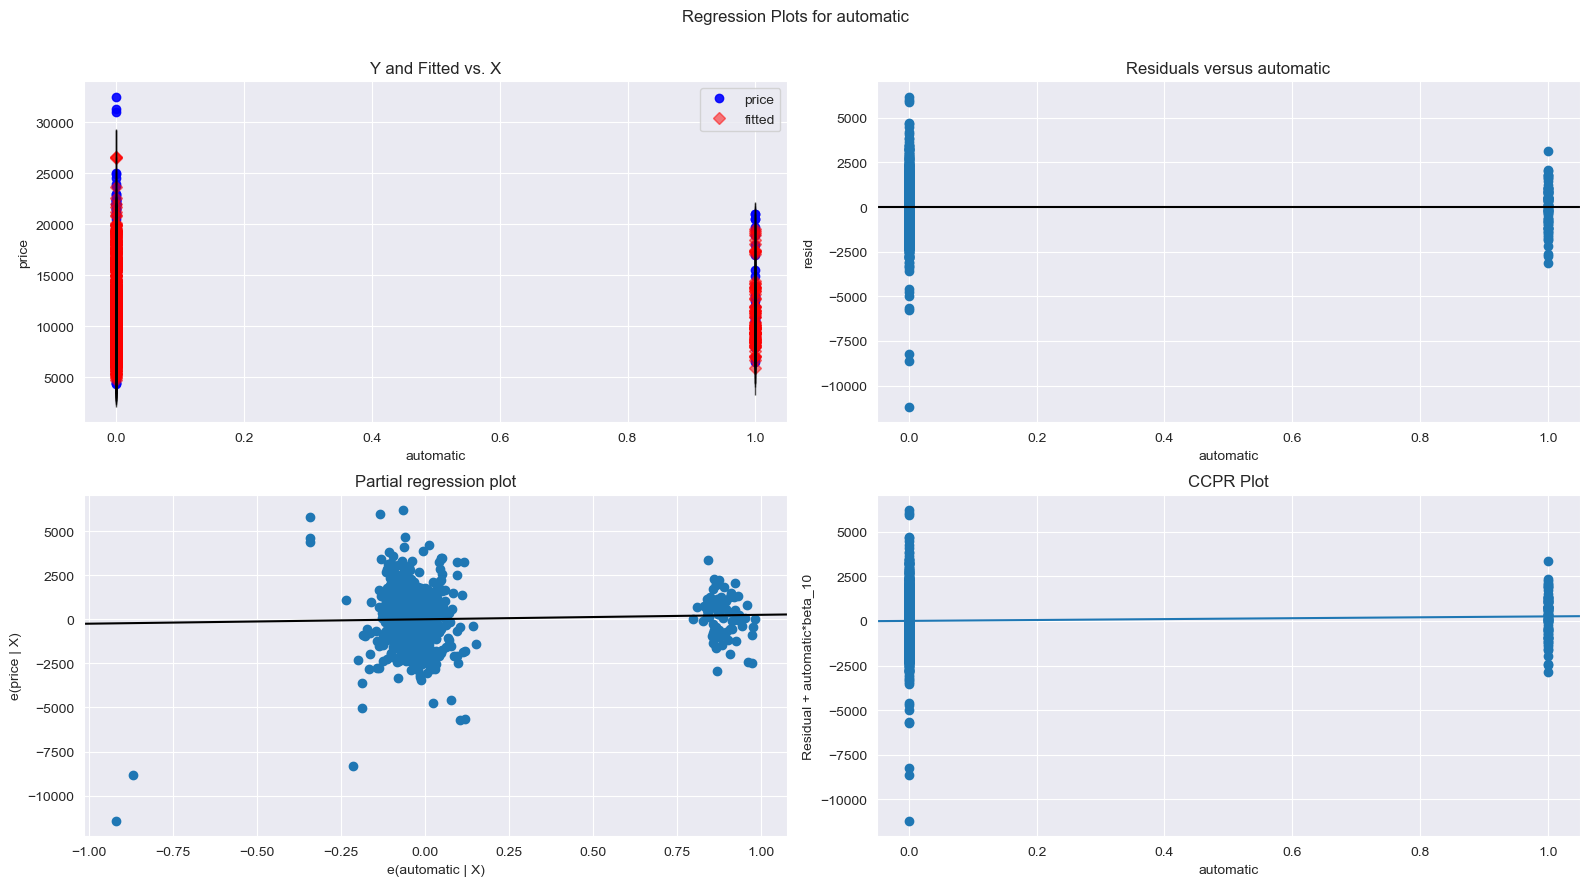

In [175]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, "automatic", fig=fig)
plt.show()

#### ^Observation:
Some of the feature doesn't suggest linear relationship with the Dependent feature

Only km,weight and age is having a linear relation with the Price Feature

#### Predicting values from Model using same dataset

In [176]:
x = dataframe[['age', 'km', 'hp', 'cc', 'door', 'cylinders', 'gears','weight', 'fuel_type_CNG', 'fuel_type_Diesel', 'automatic']]
y = dataframe[['price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['age', 'km', 'hp', 'cc', 'door', 'cylinders', 'gears','weight', 'fuel_type_CNG', 'fuel_type_Diesel', 'automatic'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(Final_model.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
predict_unscaled

array([[-6996805.47614192],
       [  561841.36884999],
       [  488426.39600434],
       ...,
       [ -652208.88512055],
       [ -711578.10834066],
       [ -691067.12762676]])

In [177]:
(np.sqrt(mean_squared_error(y, predict_unscaled)))

4139799.479263391

#### Preparing a table containing $R^2$ value for each prepared model

In [178]:
predicted = pd.DataFrame(predict_unscaled,columns=['Predicted_Price'])
predicted['price'] = dataframe.price
predicted['age'] = dataframe.age
predicted['km'] = dataframe.km
predicted['weight'] = dataframe.weight
predicted['hp'] = dataframe.hp
predicted['cc'] = dataframe.cc
predicted['automatic'] = dataframe.automatic
predicted['fuel_type_CNG'] = dataframe.fuel_type_CNG
predicted['fuel_type_Diesel'] = dataframe.fuel_type_Diesel
predicted['door'] = dataframe.door
predicted

Predicted_Price  price  age     km  weight   hp    cc  automatic  \
0       -6.996805e+06  12950   23  71138    1105   69  1900          0   
1        5.618414e+05  17950   24  21716    1105  110  1600          0   
2        4.884264e+05  16750   24  25563    1065  110  1600          0   
3        4.387174e+05  16950   30  64359    1105  110  1600          0   
4        4.387128e+05  15950   30  67660    1105  110  1600          0   
...               ...    ...  ...    ...     ...  ...   ...        ...   
1244     2.442940e+06   8950   78  24000    1065   86  1300          1   
1245    -8.961840e+05   8450   80  23000    1015   86  1300          0   
1246    -6.522089e+05   7500   69  20544    1025   86  1300          0   
1247    -7.115781e+05   8500   71  17016    1015   86  1300          0   
1248    -6.910671e+05   7250   70  16916    1015   86  1300          0   

      fuel_type_CNG  fuel_type_Diesel  door  
0                 0                 1     3  
1                 0                 0     3  
2                 0                 0     3  
3                 0                 0     3  
4                 0                 0     3  
...             ...               ...   ...  
1244              0                 0     5  
1245              0                 0     3  
1246              0                 0     3  
1247              0                 0     3  
1248              0                 0     3  

[1249 rows x 11 columns]

In [179]:
models={'Different_Models':['Raw_data_Model','After_Removing_Influencers','After_Log Transformation_Model','After_Cube-root_Transformation_Model','After_Sqaure_Root_Transformation_Model','Final_Model_without_Multicollinearity_Model'],
        'R_squared':[raw_data_model.rsquared,final_model.rsquared,log_transformed_model.rsquared,cube_root_transformed_model.rsquared,square_root_transformed_model.rsquared,model1.rsquared],
        'R_squared_adjusted':[raw_data_model.rsquared_adj,final_model.rsquared_adj,log_transformed_model.rsquared_adj,cube_root_transformed_model.rsquared_adj,square_root_transformed_model.rsquared_adj,model1.rsquared_adj],
       'RMSE':[np.sqrt(raw_data_model.mse_resid),np.sqrt(final_model.mse_resid),log_both_rmse,cube_root_both_rmse,square_root_both_rmse,rmse_linear]}
model_table=pd.DataFrame(models)
model_table

Different_Models  R_squared  R_squared_adjusted  \
0                               Raw_data_Model   0.900481            0.899678   
1                   After_Removing_Influencers   0.900568            0.899765   
2               After_Log Transformation_Model   0.749307            0.747282   
3         After_Cube-root_Transformation_Model   0.846227            0.844984   
4       After_Sqaure_Root_Transformation_Model   0.875047            0.874037   
5  Final_Model_without_Multicollinearity_Model   0.880059            0.879382   

          RMSE  
0   905.156555  
1   905.103588  
2  1724.446616  
3  1127.049180  
4   968.079494  
5   989.690175

#### Visualizing Models Performance

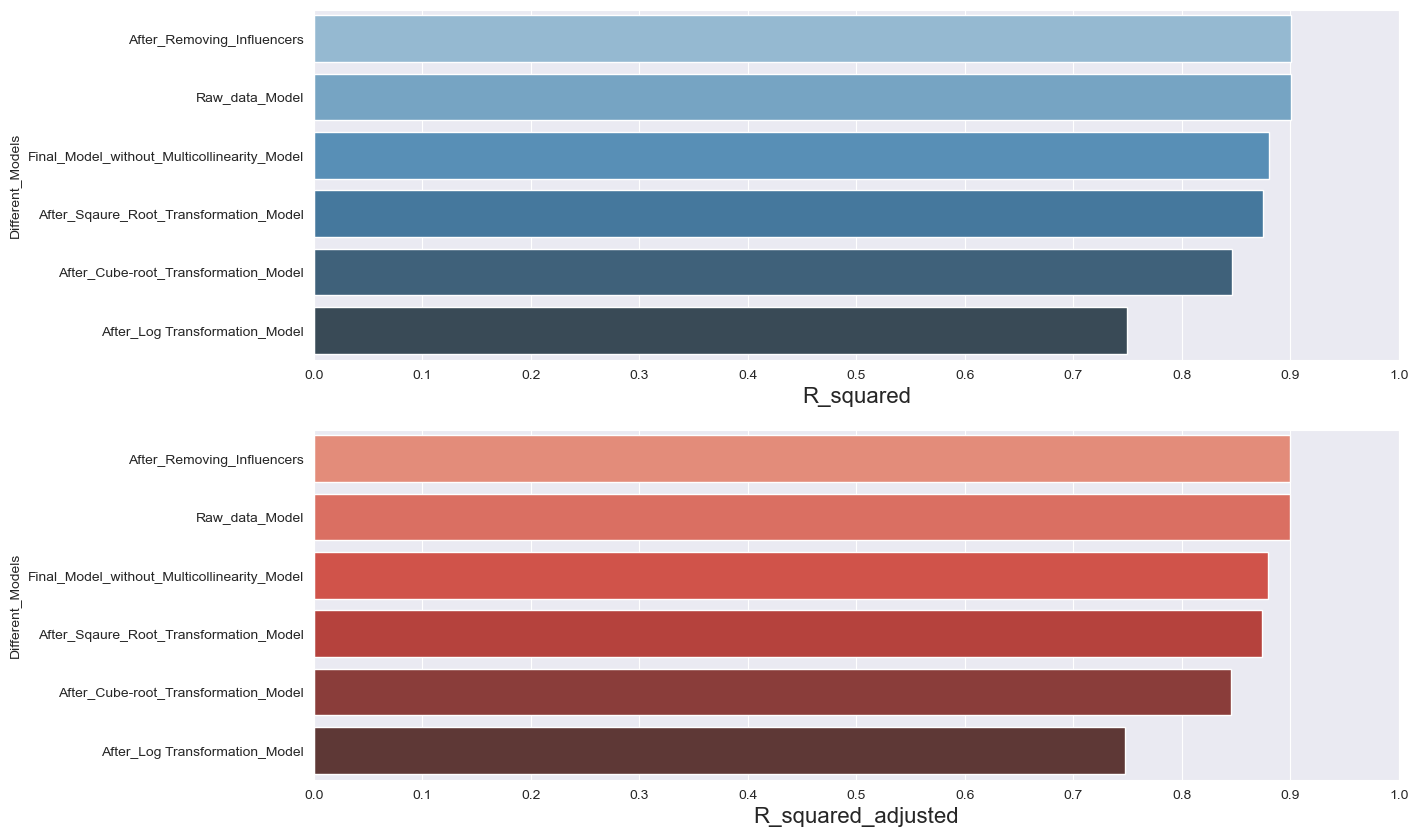

In [180]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

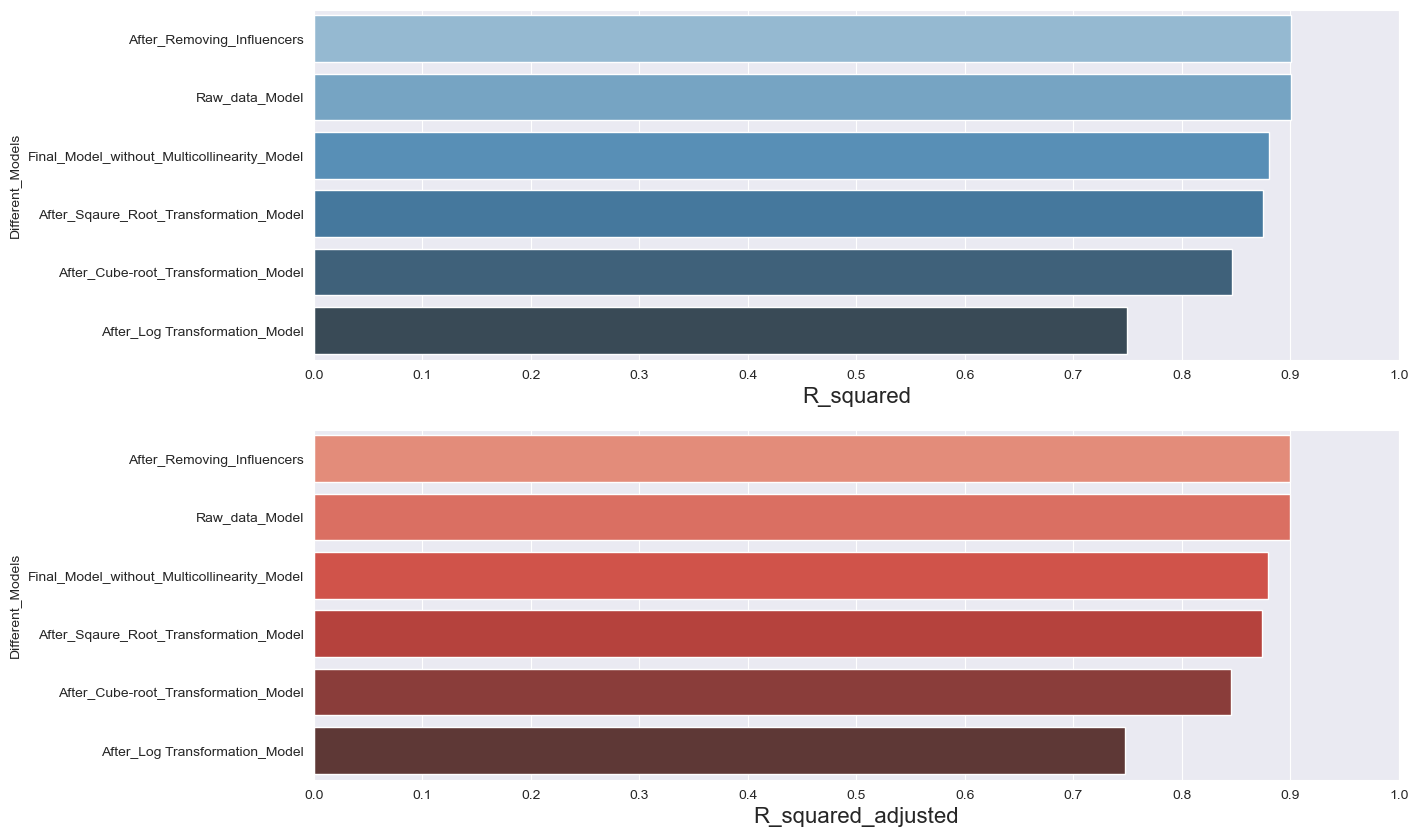

In [181]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

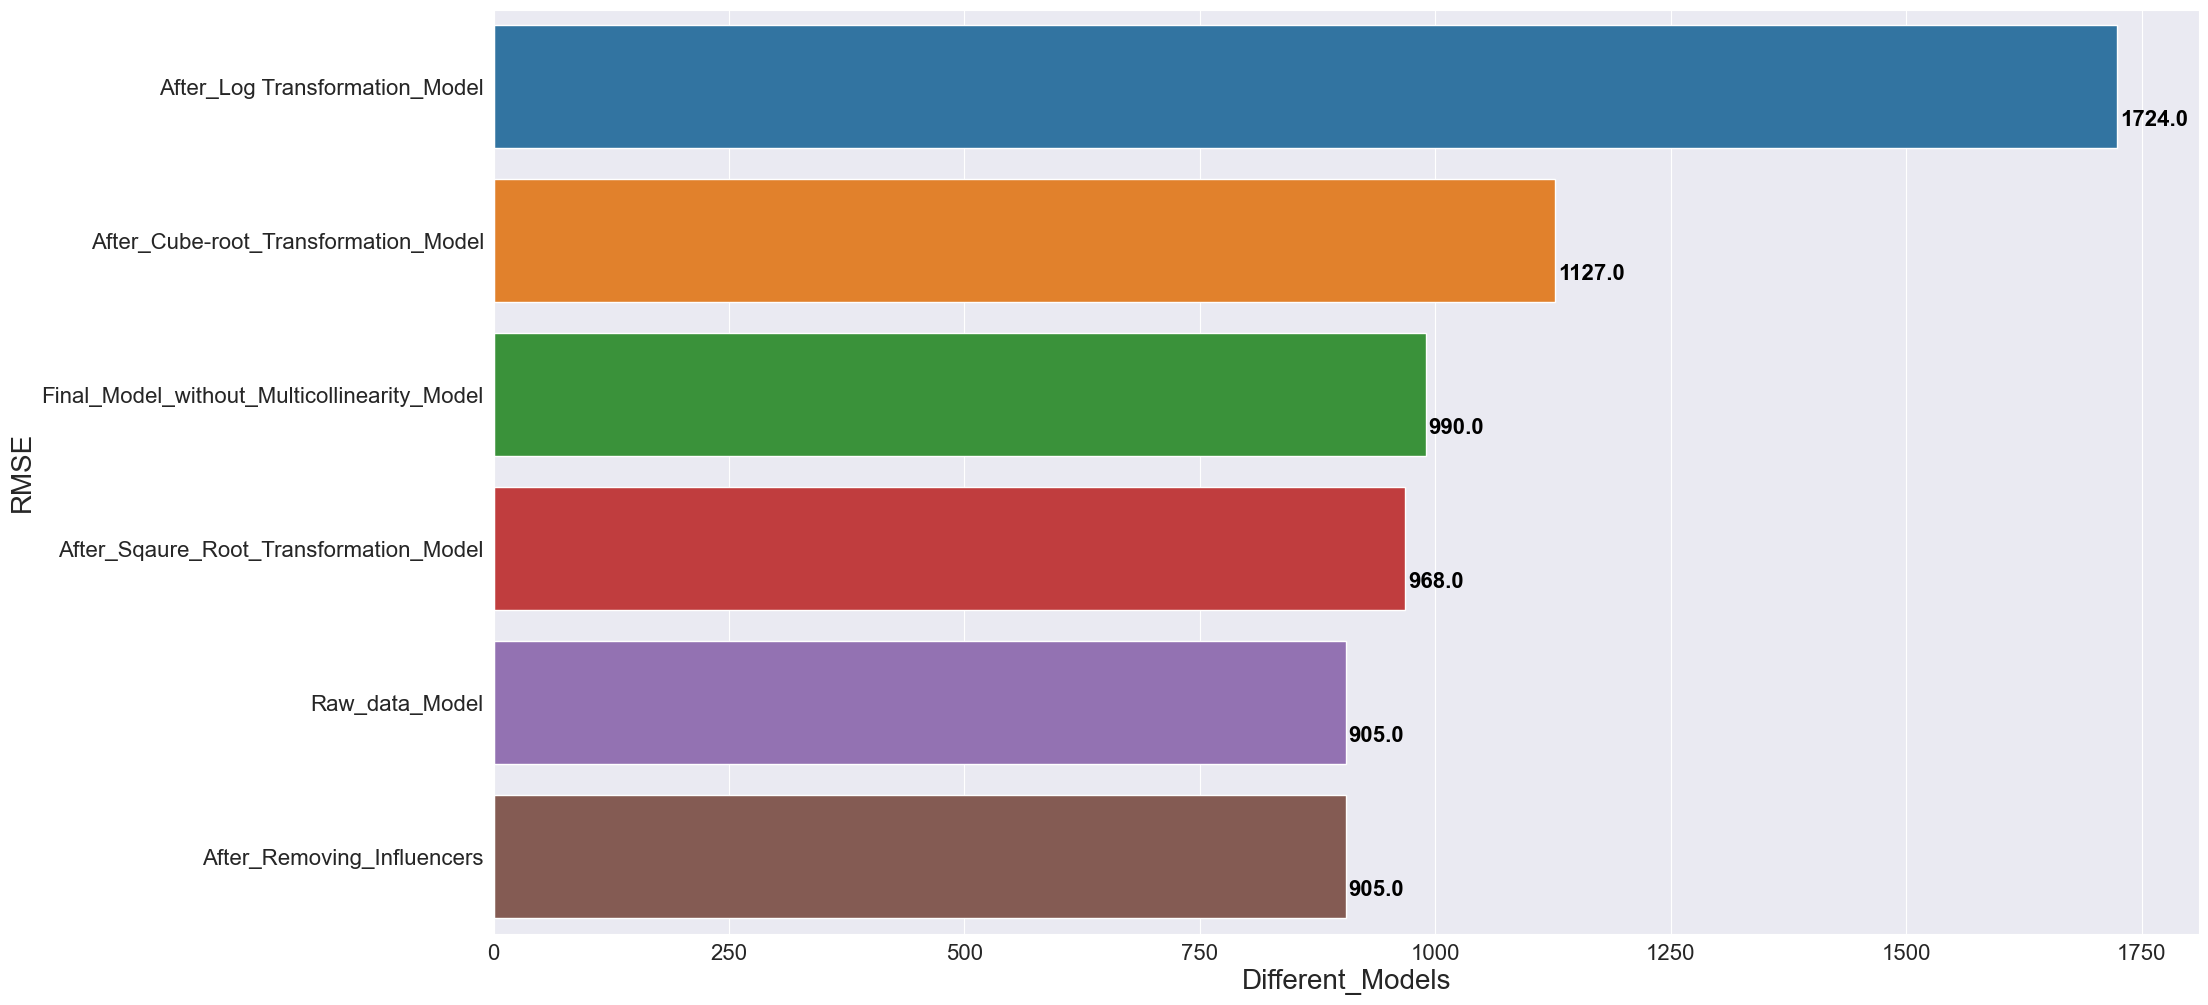

In [182]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(22,12))
sns.barplot(x='RMSE', y='Different_Models', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=20)
axe.set_ylabel('RMSE', size=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)



for i, v in enumerate(np.round(model_table.RMSE.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

In [183]:
x_train.shape

(874, 11)

In [184]:
#Linear Regression
reg_model = LinearRegression().fit(x_train, y_train)
print(reg_model.score(x_train, y_train),reg_model.score(x_test, y_test))

0.905039684058631 0.886864120347393


In [185]:
from sklearn.ensemble import GradientBoostingRegressor
gd_model = GradientBoostingRegressor(random_state=1).fit(x_train, y_train)
print(gd_model.score(x_train, y_train),gd_model.score(x_test, y_test))

0.9409117474825993 0.9062355042150674


In [186]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=1).fit(x_train, y_train)
print(rfr_model.score(x_train, y_train),rfr_model.score(x_test, y_test))

0.9852352280139898 0.8992479708612957


In [187]:
print('Linear Regression Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, reg_model.predict(x_test))))
print('Gradient Booster Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, gd_model.predict(x_test))))
print('Random Forest Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, rfr_model.predict(x_test))))

Linear Regression Root Mean Squared Error: 925.9065960962488
Gradient Booster Regressor Root Mean Squared Error: 842.9197124165804
Random Forest Regressor Root Mean Squared Error: 873.7635019735412
